# objective and Data Description

The main goal of this project is to analyze the various factors that affects the job outcomes, this involves identifying the relationships between various demographic, educational, and job-related variables and determining how these factors influence career outcomes for employees.

**Data Highlights

Personal Background: This includes their gender, date of birth, high school and college performance (like GPA and board exam scores), and the college they attended.

Career Info:
Job Details: Role or title (e.g., Software Engineer), the city of employment, date of joining (DOJ), and date of leaving (DOL).
Salary: The annual salary offered to each candidate, measured in INR.

Academic Details: The degree and specialization each person pursued, along with the tier of their college and the city where it’s located.

AMCAT Scores: Scores from AMCAT (Aspiring Minds Computer Adaptive Test) that assess English, logic, quantitative skills, and technical knowledge in various engineering domains.

Personality Scores: Ratings on traits like conscientiousness, agreeableness, openness to experience, extraversion, and neuroticism, offering a peek into their personal attributes.

# Data Analysis

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [59]:
df = pd.read_csv('/content/data.xlsx - Sheet1.csv')
df.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097  420000.00  6/1/12 0:00      present   
1      train  579905  500000.00  9/1/13 0:00      present   
2      train  810601  325000.00  6/1/14 0:00      present   
3      train  267447 1100000.00  7/1/11 0:00      present   
4      train  343523  200000.00  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00         84.30   
1         assistant manager     Indore      m  10/4/89 0:00         85.40   
2          systems engineer    Chennai      f   8/3/92 0:00         85.00   
3  senior software engineer    Gurgaon      m  12/5/89 0:00         85.60   
4                       get    Manesar      m  2/27/91 0:00         78.00   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007         95.80   
1                            cbse          2007         85.00   
2                            cbse          2010         68.20   
3                            cbse          2007         83.60   
4                            cbse          2008         76.80   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

   Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0    0.64                  445                     -1               -1   
1    0.96                   -1                    466               -1   
2    0.45                  395                     -1               -1   
3    0.97                  615                     -1               -1   
4    0.12                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1               0.97   
1              -1              -1           -1         -1              -0.73   
2              -1              -1           -1         -1               0.27   
3              -1              -1           -1         -1               0.05   
4              -1              -1           -1         -1              -0.88   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0           0.81          0.53         1.35                  -0.45  
1           0.38          1.24        -0.11                   0.86  
2           1.71          0.16        -0.87                   0.67  
3           0.34         -0.34        -0.41                  -0.92  
4          -0.28         -1.07         0.09                  -0.13

In [60]:
df.duplicated().sum()

0

In [61]:
df.drop(columns = ['Unnamed: 0', 'ID'], inplace =True)

In [62]:
df.shape

(3998, 37)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   float64
 1   DOJ                    3998 non-null   object 
 2   DOL                    3998 non-null   object 
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  CollegeID              3998 non-null   int64  
 13  CollegeTier            3998 non-null   int64  
 14  Degree                 3998 non-null   object 
 15  Spec

In [64]:
df.describe().T

count      mean       std      min       25%  \
Salary                3998.00 307699.85 212737.50 35000.00 180000.00   
10percentage          3998.00     77.93      9.85    43.00     71.68   
12graduation          3998.00   2008.09      1.65  1995.00   2007.00   
12percentage          3998.00     74.47     11.00    40.00     66.00   
CollegeID             3998.00   5156.85   4802.26     2.00    494.00   
CollegeTier           3998.00      1.93      0.26     1.00      2.00   
collegeGPA            3998.00     71.49      8.17     6.45     66.41   
CollegeCityID         3998.00   5156.85   4802.26     2.00    494.00   
CollegeCityTier       3998.00      0.30      0.46     0.00      0.00   
GraduationYear        3998.00   2012.11     31.86     0.00   2012.00   
English               3998.00    501.65    104.94   180.00    425.00   
Logical               3998.00    501.60     86.78   195.00    445.00   
Quant                 3998.00    513.38    122.30   120.00    430.00   
Domain                3998.00      0.51      0.47    -1.00      0.34   
ComputerProgramming   3998.00    353.10    205.36    -1.00    295.00   
ElectronicsAndSemicon 3998.00     95.33    158.24    -1.00     -1.00   
ComputerScience       3998.00     90.74    175.27    -1.00     -1.00   
MechanicalEngg        3998.00     22.97     98.12    -1.00     -1.00   
ElectricalEngg        3998.00     16.48     87.59    -1.00     -1.00   
TelecomEngg           3998.00     31.85    104.85    -1.00     -1.00   
CivilEngg             3998.00      2.68     36.66    -1.00     -1.00   
conscientiousness     3998.00     -0.04      1.03    -4.13     -0.71   
agreeableness         3998.00      0.15      0.94    -5.78     -0.29   
extraversion          3998.00      0.00      0.95    -4.60     -0.60   
nueroticism           3998.00     -0.17      1.01    -2.64     -0.87   
openess_to_experience 3998.00     -0.14      1.01    -7.38     -0.67   

                            50%       75%        max  
Salary                300000.00 370000.00 4000000.00  
10percentage              79.15     85.67      97.76  
12graduation            2008.00   2009.00    2013.00  
12percentage              74.40     82.60      98.70  
CollegeID               3879.00   8818.00   18409.00  
CollegeTier                2.00      2.00       2.00  
collegeGPA                71.72     76.33      99.93  
CollegeCityID           3879.00   8818.00   18409.00  
CollegeCityTier            0.00      1.00       1.00  
GraduationYear          2013.00   2014.00    2017.00  
English                  500.00    570.00     875.00  
Logical                  505.00    565.00     795.00  
Quant                    515.00    595.00     900.00  
Domain                     0.62      0.84       1.00  
ComputerProgramming      415.00    495.00     840.00  
ElectronicsAndSemicon     -1.00    233.00     612.00  
ComputerScience           -1.00     -1.00     715.00  
MechanicalEngg            -1.00     -1.00     623.00  
ElectricalEngg            -1.00     -1.00     676.00  
TelecomEngg               -1.00     -1.00     548.00  
CivilEngg                 -1.00     -1.00     516.00  
conscientiousness          0.05      0.70       2.00  
agreeableness              0.21      0.81       1.90  
extraversion               0.09      0.67       2.54  
nueroticism               -0.23      0.53       3.35  
openess_to_experience     -0.09      0.50       1.82

In [65]:
df.describe(include = 'O').T

count unique                                        top  freq
DOJ             3998     81                                7/1/14 0:00   199
DOL             3998     67                                    present  1875
Designation     3998    419                          software engineer   539
JobCity         3998    339                                  Bangalore   627
Gender          3998      2                                          m  3041
DOB             3998   1872                                1/1/91 0:00    11
10board         3998    275                                       cbse  1395
12board         3998    340                                       cbse  1400
Degree          3998      4                                B.Tech/B.E.  3700
Specialization  3998     46  electronics and communication engineering   880
CollegeState    3998     26                              Uttar Pradesh   915

In [66]:
num_columns = df.select_dtypes(include = ['int', 'float']).drop(columns = 'Salary')
cat_columns = df.select_dtypes(include = 'object')

In [67]:
for col in cat_columns.iloc[:, [2, 3, 4, 6, 7, 8, 9, 10]].columns:
  print(df[col].value_counts())
  print('--------------------------------')

Designation
software engineer                         539
software developer                        265
system engineer                           205
programmer analyst                        139
systems engineer                          118
java software engineer                    111
software test engineer                    100
project engineer                           77
technical support engineer                 76
senior software engineer                   72
java developer                             67
test engineer                              57
web developer                              54
application developer                      52
assistant manager                          52
network engineer                           51
data analyst                               49
business analyst                           49
engineer                                   47
android developer                          46
associate software engineer                46
programmer            

In [68]:
def designation_category(designation):
  if 'engineer' in designation.lower():
    return 'Engineering'
  elif 'manager' in designation.lower():
    return 'Software Development'
  elif 'analyst' in designation.lower():
    return 'Data Analytics'
  elif 'manager' in designation.lower():
    return 'Management'
  elif 'support' in designation.lower():
    return 'Support & Maintenance'
  elif 'developer' in designation.lower():
    return 'Software Development'
  elif 'quality' in designation.lower() or 'qa' in designation.lower() or 'test' in designation.lower():
    return 'Quality Assurance'
  else:
    return 'Other'

df['Designation'] = df['Designation'].apply(designation_category)

In [69]:
df['Designation'].value_counts()

Designation
Engineering              2137
Software Development      834
Other                     538
Data Analytics            411
Quality Assurance          44
Support & Maintenance      34
Name: count, dtype: int64

In [70]:
df['JobCity'].unique().tolist()

['Bangalore',
 'Indore',
 'Chennai',
 'Gurgaon',
 'Manesar',
 'Hyderabad',
 'Banglore',
 'Noida',
 'Kolkata',
 'Pune',
 '-1',
 'mohali',
 'Jhansi',
 'Delhi',
 'Hyderabad ',
 'Bangalore ',
 'noida',
 'delhi',
 'Bhubaneswar',
 'Navi Mumbai',
 'Mumbai',
 'New Delhi',
 'Mangalore',
 'Rewari',
 'Gaziabaad',
 'Bhiwadi',
 'Mysore',
 'Rajkot',
 'Greater Noida',
 'Jaipur',
 'noida ',
 'HYDERABAD',
 'mysore',
 'THANE',
 'Maharajganj',
 'Thiruvananthapuram',
 'Punchkula',
 'Bhubaneshwar',
 'Pune ',
 'coimbatore',
 'Dhanbad',
 'Lucknow',
 'Trivandrum',
 'kolkata',
 'mumbai',
 'Gandhi Nagar',
 'Una',
 'Daman and Diu',
 'chennai',
 'GURGOAN',
 'vsakhapttnam',
 'pune',
 'Nagpur',
 'Bhagalpur',
 'new delhi - jaisalmer',
 'Coimbatore',
 'Ahmedabad',
 'Kochi/Cochin',
 'Bankura',
 'Bengaluru',
 'Mysore ',
 'Kanpur ',
 'jaipur',
 'Gurgaon ',
 'bangalore',
 'CHENNAI',
 'Vijayawada',
 'Kochi',
 'Beawar',
 'Alwar',
 'NOIDA',
 'Greater noida',
 'Siliguri ',
 'raipur',
 'gurgaon',
 'Bhopal',
 'Faridabad',
 'Jo

In [71]:
df['JobCity'] = df['JobCity'].replace(['Banglore', 'Bangalore ', 'Bengaluru', 'Banagalore', 'bengaluru', 'BAngalore',
                                       'banglore', 'Banglore ', ' bangalore', 'BANGLORE', 'BANGALORE ', 'bangalore',
                                       'Mangalore', 'BANGALORE', 'bangalore', 'bangalore', 'Banaglore',
                                       'bangalore', 'Chennai, Bangalore', 'bangalore', 'bangalore '], 'Bangalore')
df['JobCity'] = df['JobCity'].replace(['Navi Mumbai', 'mumbai', 'Mumbai', 'Mumbai', 'NAVI MUMBAI', 'mumbai', 'Mumbai',
                                       'Mumbai', 'mumbai', 'Navi Mumbai ', 'MUMBAI',
                                       'mumbai', 'Navi mumbai	', 'Mumbai', 'Mumbai', ' Mumbai','Mumbai',' Mumbai', 'Navi mumbai'], 'Mumbai')
df['JobCity'] = df['JobCity'].replace(['noida', 'Nouda', 'Greater NOIDA', 'GREATER NOIDA', 'Noida', 'NOIDA',
                                       'noida', 'Greater Noida', 'noida', 'NOIDA', 'Noida', 'Nouda',
                                       'Noida', 'noida', 'Noida', 'noida ', 'noida '], 'Noida')
df['JobCity'] = df['JobCity'].replace(['hyderabad(bhadurpally)', 'hyderabad', 'hderabad', 'Secunderabad', 'HYDERABAD',
                                       'Hyderabad', 'hyderabad', 'Hyderabad',
                                       'Hyderabad', 'hyderabad', 'Hyderabad', 'hyderabad', 'Hyderabad ', 'hyderabad ', 'Navi Mumbai , Hyderabad'], 'Hyderabad')
df['JobCity'] = df['JobCity'].replace(['pune', 'Pune', 'PUNE', 'Pune', 'pune',
                                       'Pune', 'Pune', 'punr', 'pune','Pune', 'Pune ', ' Pune'], 'Pune')
df['JobCity'] = df['JobCity'].replace(['vsakhapttnam', 'VIZAG', 'vizag', 'Vizag'], 'Visakhapatnam')
df['JobCity'] = df['JobCity'].replace(['chennai', 'Chennai', 'CHENNAI', 'chennai', 'Chennai', 'chennai', 'Chennai', ' Chennai', 'chennai '], 'Chennai')
df['JobCity'] = df['JobCity'].replace(['gurgaon', 'Gurgaon', 'GURGAON', 'Gurgoan', 'GURAGAON',
                                       'Gurga', 'GURGOAN', 'Gurgaon', 'gurgoan', 'Gurgaon', 'Gurgaon '], 'Gurgaon')
df['JobCity'] = df['JobCity'].replace(['Delhi', 'delhi', 'new delhi', 'New Delhi', 'DELHI', 'NEW DELHI', 'new dehli',
                                       'Delhi/NCR', 'Delhi', 'new delhi - jaisalmer	','new delhi - jaisalmer', 'delhi',
                                       'New Delhi', 'Delhi', 'New delhi', 'New Delhi\t', ' Delhi'], 'New Delhi	')
df['JobCity'] = df['JobCity'].replace(['kolkata', 'Kolkata`','Kolkata '], 'Kolkata')
df['JobCity'].value_counts()

JobCity
Bangalore                                 698
-1                                        461
Noida                                     416
Hyderabad                                 374
Pune                                      327
Chennai                                   306
New Delhi\t                               226
Gurgaon                                   223
Mumbai                                    149
Kolkata                                   113
Jaipur                                     46
Lucknow                                    36
Mysore                                     36
Chandigarh                                 26
Indore                                     24
Bhubaneswar                                22
Coimbatore                                 20
Faridabad                                  18
Ahmedabad                                  17
Bhopal                                     17
Ghaziabad                                  15
Kochi/Cochin                               13
mohali                                     12
Visakhapatnam                              11
Dehradun                                    9
Bhubaneshwar                                9
Nagpur                                      9
Chennai                                     7
KOLKATA                                     7
Jabalpur                                    7
Thiruvananthapuram                          7
Trivandrum                                  6
Pondicherry                                 6
Kanpur                                      6
Jodhpur                                     5
Trichy                                      5
Thane                                       5
jaipur                                      5
Nasikcity                                   4
Bhubneshwar                                 4
Raipur                                      4
Patna                                       4
Aurangabad                                  3
Haridwar                                    3
Bilaspur                                    3
Rudrapur                                    3
Madurai                                     3
Tirupathi                                   3
Dubai                                       3
Ludhiana                                    3
Nashik                                      3
bhubaneswar                                 3
Gandhi Nagar                                2
New Delhi                                   2
Neemrana                                    2
Ongole                                      2
Dhanbad                                     2
Noida                                       2
Udaipur                                     2
Nagpur                                      2
Gandhinagar                                 2
LUCKNOW                                     2
trivandrum                                  2
Ahmednagar                                  2
Chandrapur                                  2
Pantnagar                                   2
Ambala                                      2
Sonipat                                     2
Vadodara                                    2
Meerut                                      2
lucknow                                     2
patna                                       2
dehradun                                    2
Rajkot                                      2
Hubli                                       2
Agra                                        2
Panchkula                                   2
mysore                                      2
Jamshedpur                                  2
Vijayawada                                  2
Beawar                                      2
Ranchi                                      2
Belgaum                                     2
Hissar                                      2
Mumbai                                      2
Unnao                                       2
Kochi                               

In [72]:
df['JobCity'] = df['JobCity'].apply(lambda x: x if df['JobCity'].value_counts()[x] > 120 else 'Other')
df['JobCity'].value_counts()

JobCity
Other          818
Bangalore      698
-1             461
Noida          416
Hyderabad      374
Pune           327
Chennai        306
New Delhi\t    226
Gurgaon        223
Mumbai         149
Name: count, dtype: int64

In [73]:
df['JobCity'] = df['JobCity'].replace('-1', 'Other')
df['JobCity'] = df['JobCity'].replace('New Delhi\t', 'Delhi')
df['JobCity'].value_counts()

JobCity
Other        1279
Bangalore     698
Noida         416
Hyderabad     374
Pune          327
Chennai       306
Delhi         226
Gurgaon       223
Mumbai        149
Name: count, dtype: int64

In [74]:
df['JobCity'].unique()

array(['Bangalore', 'Other', 'Chennai', 'Gurgaon', 'Hyderabad', 'Noida',
       'Pune', 'Delhi', 'Mumbai'], dtype=object)

In [75]:
def change_board(category):
  category = category.lower()

  if 'cbse' in category:
    return 'CBSE'
  elif 'icse' in category or 'cicse' in category or 'isc' in category:
    return 'ICSE'
  elif 'state' in category or 'up' in category or 'mp' in category or 'maharashtra' in category \
       or 'karnataka' in category or 'rajasthan' in category or 'uttar pradesh' in category \
       or 'wb' in category or 'kerala' in category or 'jharkhand' in category:
    return 'State Board'
  elif 'matriculation' in category or 'sslc' in category:
    return 'Matriculation'
  elif 'ssc' in category:
    return 'SSC'
  elif 'bseb' in category or 'bihar' in category:
    return 'BSEB'
  elif 'pseb' in category:
    return 'PSEB'
  elif 'rbse' in category or 'board of secondary education' in category:
    return 'RBSE'
  else:
    return 'Other'

df['10board'] = df['10board'].apply(change_board)

In [76]:
df['10board'].value_counts()

10board
State Board      1497
CBSE             1399
Other             511
ICSE              284
SSC               129
RBSE               79
Matriculation      64
BSEB               27
PSEB                8
Name: count, dtype: int64

In [77]:
def change_board_name(board_name):
  board_name = board_name.lower()

  if 'cbse' in board_name or 'cbsc' in board_name:
    return 'CBSE'
  elif 'state' in board_name or 'bord' in board_name or 'boar' in board_name:
    return 'State Board'
  elif any(state in board_name for state in ["karnataka", "gujarat", "maharashtra", "up", "bihar", "west bengal", "punjab", "jharkhand"
                                              'ap','kerala', 'andhra pradesh', 'west bengal', 'uttar pradesh'
                                              'mp', 'j & k', 'mumbai', 'andhra', 'tamilnadu', 'new delhi', 'nagpur', 'maharashtra', 'himachal pradesh',
                                               'uttarakhand', 'odisha', 'rajasthan', 'hyderabad']):
    return "State Board"
  else:
    return 'Other'

df['12board'] = df['12board'].apply(change_board_name)
df['12board'].value_counts()

12board
State Board    1758
CBSE           1403
Other           837
Name: count, dtype: int64

In [78]:
df.head()

Salary          DOJ          DOL           Designation    JobCity  \
0  420000.00  6/1/12 0:00      present           Engineering  Bangalore   
1  500000.00  9/1/13 0:00      present  Software Development      Other   
2  325000.00  6/1/14 0:00      present           Engineering    Chennai   
3 1100000.00  7/1/11 0:00      present           Engineering    Gurgaon   
4  200000.00  3/1/14 0:00  3/1/15 0:00                 Other      Other   

  Gender           DOB  10percentage 10board  12graduation  12percentage  \
0      f  2/19/90 0:00         84.30   Other          2007         95.80   
1      m  10/4/89 0:00         85.40    CBSE          2007         85.00   
2      f   8/3/92 0:00         85.00    CBSE          2010         68.20   
3      m  12/5/89 0:00         85.60    CBSE          2007         83.60   
4      m  2/27/91 0:00         78.00    CBSE          2008         76.80   

       12board  CollegeID  CollegeTier       Degree  \
0  State Board       1141            2  B.Tech/B.E.   
1         CBSE       5807            2  B.Tech/B.E.   
2         CBSE         64            2  B.Tech/B.E.   
3         CBSE       6920            1  B.Tech/B.E.   
4         CBSE      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

   Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0    0.64                  445                     -1               -1   
1    0.96                   -1                    466               -1   
2    0.45                  395                     -1               -1   
3    0.97                  615                     -1               -1   
4    0.12                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1               0.97   
1              -1              -1           -1         -1              -0.73   
2              -1              -1           -1         -1               0.27   
3              -1              -1           -1         -1               0.05   
4              -1              -1           -1         -1              -0.88   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0           0.81          0.53         1.35                  -0.45  
1           0.38          1.24        -0.11                   0.86  
2           1.71          0.16        -0.87                   0.67  
3           0.34         -0.34        -0.41                  -0.92  
4          -0.28         -1.07         0.09                  -0.13

In [79]:
df['DOB'] = pd.to_datetime(df['DOB'])
current_year = 2016

df['Age'] = current_year - df['DOB'].dt.year

In [80]:
df['DOL'].unique()

array(['present', '3/1/15 0:00', '5/1/15 0:00', '7/1/15 0:00',
       '4/1/15 0:00', '10/1/14 0:00', '9/1/14 0:00', '6/1/14 0:00',
       '9/1/12 0:00', '12/1/13 0:00', '6/1/15 0:00', '10/1/13 0:00',
       '1/1/15 0:00', '4/1/14 0:00', '6/1/13 0:00', '3/1/12 0:00',
       '7/1/14 0:00', '2/1/13 0:00', '1/1/14 0:00', '4/1/13 0:00',
       '7/1/12 0:00', '5/1/14 0:00', '9/1/13 0:00', '2/1/15 0:00',
       '1/1/12 0:00', '8/1/15 0:00', '8/1/14 0:00', '12/1/15 0:00',
       '12/1/14 0:00', '5/1/12 0:00', '3/1/11 0:00', '7/1/11 0:00',
       '2/1/14 0:00', '12/1/11 0:00', '10/1/15 0:00', '11/1/14 0:00',
       '3/1/14 0:00', '11/1/11 0:00', '5/1/13 0:00', '7/1/13 0:00',
       '11/1/13 0:00', '1/1/11 0:00', '5/1/11 0:00', '2/1/12 0:00',
       '11/1/12 0:00', '6/1/12 0:00', '8/1/13 0:00', '3/1/05 0:00',
       '3/1/13 0:00', '10/1/12 0:00', '2/1/11 0:00', '2/1/10 0:00',
       '1/1/13 0:00', '6/1/11 0:00', '9/1/15 0:00', '4/1/12 0:00',
       '8/1/12 0:00', '4/1/11 0:00', '10/1/11 0:00', '

In [81]:
df['DOL'] = df['DOL'].str.replace(' 0:00', '', regex=False)
df['DOL'].unique()

array(['present', '3/1/15', '5/1/15', '7/1/15', '4/1/15', '10/1/14',
       '9/1/14', '6/1/14', '9/1/12', '12/1/13', '6/1/15', '10/1/13',
       '1/1/15', '4/1/14', '6/1/13', '3/1/12', '7/1/14', '2/1/13',
       '1/1/14', '4/1/13', '7/1/12', '5/1/14', '9/1/13', '2/1/15',
       '1/1/12', '8/1/15', '8/1/14', '12/1/15', '12/1/14', '5/1/12',
       '3/1/11', '7/1/11', '2/1/14', '12/1/11', '10/1/15', '11/1/14',
       '3/1/14', '11/1/11', '5/1/13', '7/1/13', '11/1/13', '1/1/11',
       '5/1/11', '2/1/12', '11/1/12', '6/1/12', '8/1/13', '3/1/05',
       '3/1/13', '10/1/12', '2/1/11', '2/1/10', '1/1/13', '6/1/11',
       '9/1/15', '4/1/12', '8/1/12', '4/1/11', '10/1/11', '11/1/15',
       '12/1/12', '9/1/11', '8/1/10', '8/1/11', '6/1/09', '3/1/08',
       '10/1/10'], dtype=object)

In [82]:
df['DOL'] =  df['DOL'].replace('present', '1/1/16')
df['DOL'].unique()

array(['1/1/16', '3/1/15', '5/1/15', '7/1/15', '4/1/15', '10/1/14',
       '9/1/14', '6/1/14', '9/1/12', '12/1/13', '6/1/15', '10/1/13',
       '1/1/15', '4/1/14', '6/1/13', '3/1/12', '7/1/14', '2/1/13',
       '1/1/14', '4/1/13', '7/1/12', '5/1/14', '9/1/13', '2/1/15',
       '1/1/12', '8/1/15', '8/1/14', '12/1/15', '12/1/14', '5/1/12',
       '3/1/11', '7/1/11', '2/1/14', '12/1/11', '10/1/15', '11/1/14',
       '3/1/14', '11/1/11', '5/1/13', '7/1/13', '11/1/13', '1/1/11',
       '5/1/11', '2/1/12', '11/1/12', '6/1/12', '8/1/13', '3/1/05',
       '3/1/13', '10/1/12', '2/1/11', '2/1/10', '1/1/13', '6/1/11',
       '9/1/15', '4/1/12', '8/1/12', '4/1/11', '10/1/11', '11/1/15',
       '12/1/12', '9/1/11', '8/1/10', '8/1/11', '6/1/09', '3/1/08',
       '10/1/10'], dtype=object)

In [83]:
df['DOL'] = pd.to_datetime(df['DOL'])
df['DOL'].value_counts()

DOL
2016-01-01    1875
2015-04-01     573
2015-03-01     124
2015-05-01     112
2015-01-01      99
2014-04-01      82
2015-02-01      69
2014-06-01      67
2014-09-01      64
2014-08-01      63
2014-12-01      53
2014-07-01      52
2014-05-01      52
2014-02-01      49
2014-01-01      46
2014-10-01      44
2014-03-01      39
2014-11-01      35
2013-07-01      31
2013-05-01      29
2015-07-01      26
2015-06-01      26
2013-12-01      25
2013-08-01      24
2013-09-01      23
2013-02-01      21
2013-01-01      20
2013-03-01      18
2013-10-01      18
2013-06-01      17
2012-06-01      17
2013-04-01      16
2012-07-01      14
2012-08-01      14
2013-11-01      13
2015-12-01      11
2012-01-01      10
2012-09-01      10
2012-12-01       9
2012-11-01       9
2012-10-01       8
2015-08-01       8
2015-09-01       7
2012-04-01       7
2011-12-01       7
2012-02-01       7
2012-05-01       6
2011-11-01       5
2011-06-01       5
2011-07-01       5
2012-03-01       5
2011-01-01       4
2011-10-01       3
2015-11-01       3
2011-09-01       3
2011-04-01       2
2010-08-01       2
2011-03-01       2
2011-05-01       2
2008-03-01       1
2009-06-01       1
2011-08-01       1
2005-03-01       1
2015-10-01       1
2010-02-01       1
2011-02-01       1
2010-10-01       1
Name: count, dtype: int64

In [84]:
df['DOJ'] = df['DOJ'].str.replace(' 0:00', '', regex=False)
df['DOJ'].unique()

array(['6/1/12', '9/1/13', '6/1/14', '7/1/11', '3/1/14', '8/1/14',
       '7/1/14', '7/1/13', '4/1/11', '8/1/11', '12/1/13', '1/1/14',
       '8/1/13', '9/1/14', '11/1/10', '8/1/12', '10/1/13', '9/1/12',
       '1/1/11', '2/1/15', '11/1/14', '12/1/11', '10/1/14', '1/1/15',
       '3/1/13', '10/1/10', '1/1/13', '6/1/11', '4/1/14', '5/1/12',
       '10/1/12', '4/1/15', '3/1/12', '6/1/13', '9/1/09', '11/1/13',
       '7/1/10', '2/1/14', '6/1/15', '5/1/14', '12/1/14', '11/1/11',
       '7/1/15', '5/1/13', '3/1/11', '3/1/15', '7/1/12', '10/1/11',
       '4/1/10', '4/1/13', '12/1/10', '2/1/13', '9/1/11', '2/1/12',
       '1/1/12', '12/1/12', '9/1/10', '4/1/12', '11/1/12', '5/1/15',
       '6/1/10', '2/1/11', '8/1/10', '5/1/10', '5/1/11', '8/1/04',
       '11/1/08', '6/1/09', '2/1/10', '11/1/09', '3/1/10', '11/1/15',
       '1/1/06', '8/1/15', '1/1/10', '12/1/15', '9/1/07', '6/1/91',
       '7/1/07', '6/1/07', '2/1/07'], dtype=object)

In [85]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOJ'].unique()

<DatetimeArray>
['2012-06-01 00:00:00', '2013-09-01 00:00:00', '2014-06-01 00:00:00',
 '2011-07-01 00:00:00', '2014-03-01 00:00:00', '2014-08-01 00:00:00',
 '2014-07-01 00:00:00', '2013-07-01 00:00:00', '2011-04-01 00:00:00',
 '2011-08-01 00:00:00', '2013-12-01 00:00:00', '2014-01-01 00:00:00',
 '2013-08-01 00:00:00', '2014-09-01 00:00:00', '2010-11-01 00:00:00',
 '2012-08-01 00:00:00', '2013-10-01 00:00:00', '2012-09-01 00:00:00',
 '2011-01-01 00:00:00', '2015-02-01 00:00:00', '2014-11-01 00:00:00',
 '2011-12-01 00:00:00', '2014-10-01 00:00:00', '2015-01-01 00:00:00',
 '2013-03-01 00:00:00', '2010-10-01 00:00:00', '2013-01-01 00:00:00',
 '2011-06-01 00:00:00', '2014-04-01 00:00:00', '2012-05-01 00:00:00',
 '2012-10-01 00:00:00', '2015-04-01 00:00:00', '2012-03-01 00:00:00',
 '2013-06-01 00:00:00', '2009-09-01 00:00:00', '2013-11-01 00:00:00',
 '2010-07-01 00:00:00', '2014-02-01 00:00:00', '2015-06-01 00:00:00',
 '2014-05-01 00:00:00', '2014-12-01 00:00:00', '2011-11-01 00:00:00',
 '20

In [86]:
df['tenure'] = (df['DOL'] - df['DOJ']).dt.days / 12
df['tenure'] = df['tenure'].abs()
df['tenure'] = df['tenure'].astype(int)

df['tenure'].value_counts()

tenure
30     194
45     168
43     147
48     135
40     132
12     130
22     123
35     120
25     118
15     117
17     117
60     113
27     111
58     110
20     102
33     100
55      91
53      89
63      88
50      87
38      86
10      85
7       79
73      79
76      73
68      63
86      57
83      56
78      53
65      51
71      49
106     45
91      45
81      44
5       39
101     39
2       38
88      36
98      34
96      33
93      33
37      30
104     29
32      29
109     27
4       25
116     23
124     22
121     21
111     19
131     19
126     16
114     16
119     16
134     15
0       15
139     14
147     13
129     12
137     11
164     11
144     10
157      8
152      8
66       7
162      7
142      7
28       7
167      6
154      6
70       6
149      5
99       4
103      4
170      3
175      3
23       3
136      2
159      2
748      1
42       1
258      1
132      1
182      1
304      1
177      1
75       1
Name: count, dtype: int64

In [87]:
df.drop(columns = ['DOJ', 'DOL', 'DOB'], inplace=True)

# Univariate Analysis

In [88]:
num_columns = df.select_dtypes(include = ['int', 'float']).drop(columns = 'Salary')
cat_columns = df.select_dtypes(include = 'object')

In [89]:
num_columns.head()

10percentage  12graduation  12percentage  CollegeID  CollegeTier  \
0         84.30          2007         95.80       1141            2   
1         85.40          2007         85.00       5807            2   
2         85.00          2010         68.20         64            2   
3         85.60          2007         83.60       6920            1   
4         78.00          2008         76.80      11368            2   

   collegeGPA  CollegeCityID  CollegeCityTier  GraduationYear  English  \
0       78.00           1141                0            2011      515   
1       70.06           5807                0            2012      695   
2       70.00             64                0            2014      615   
3       74.64           6920                1            2011      635   
4       73.90          11368                0            2012      545   

   Logical  Quant  Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525    0.64                  445                     -1   
1      610    780    0.96                   -1                    466   
2      545    370    0.45                  395                     -1   
3      585    625    0.97                  615                     -1   
4      625    465    0.12                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0               0.97           0.81          0.53         1.35   
1              -0.73           0.38          1.24        -0.11   
2               0.27           1.71          0.16        -0.87   
3               0.05           0.34         -0.34        -0.41   
4              -0.88          -0.28         -1.07         0.09   

   openess_to_experience  Age  tenure  
0                  -0.45   26     109  
1                   0.86   27      71  
2                   0.67   24      48  
3                  -0.92   27     137  
4                  -0.13   25      30

In [90]:
num_columns.describe().T

count    mean     std     min     25%     50%     75%  \
10percentage          3998.00   77.93    9.85   43.00   71.68   79.15   85.67   
12graduation          3998.00 2008.09    1.65 1995.00 2007.00 2008.00 2009.00   
12percentage          3998.00   74.47   11.00   40.00   66.00   74.40   82.60   
CollegeID             3998.00 5156.85 4802.26    2.00  494.00 3879.00 8818.00   
CollegeTier           3998.00    1.93    0.26    1.00    2.00    2.00    2.00   
collegeGPA            3998.00   71.49    8.17    6.45   66.41   71.72   76.33   
CollegeCityID         3998.00 5156.85 4802.26    2.00  494.00 3879.00 8818.00   
CollegeCityTier       3998.00    0.30    0.46    0.00    0.00    0.00    1.00   
GraduationYear        3998.00 2012.11   31.86    0.00 2012.00 2013.00 2014.00   
English               3998.00  501.65  104.94  180.00  425.00  500.00  570.00   
Logical               3998.00  501.60   86.78  195.00  445.00  505.00  565.00   
Quant                 3998.00  513.38  122.30  120.00  430.00  515.00  595.00   
Domain                3998.00    0.51    0.47   -1.00    0.34    0.62    0.84   
ComputerProgramming   3998.00  353.10  205.36   -1.00  295.00  415.00  495.00   
ElectronicsAndSemicon 3998.00   95.33  158.24   -1.00   -1.00   -1.00  233.00   
ComputerScience       3998.00   90.74  175.27   -1.00   -1.00   -1.00   -1.00   
MechanicalEngg        3998.00   22.97   98.12   -1.00   -1.00   -1.00   -1.00   
ElectricalEngg        3998.00   16.48   87.59   -1.00   -1.00   -1.00   -1.00   
TelecomEngg           3998.00   31.85  104.85   -1.00   -1.00   -1.00   -1.00   
CivilEngg             3998.00    2.68   36.66   -1.00   -1.00   -1.00   -1.00   
conscientiousness     3998.00   -0.04    1.03   -4.13   -0.71    0.05    0.70   
agreeableness         3998.00    0.15    0.94   -5.78   -0.29    0.21    0.81   
extraversion          3998.00    0.00    0.95   -4.60   -0.60    0.09    0.67   
nueroticism           3998.00   -0.17    1.01   -2.64   -0.87   -0.23    0.53   
openess_to_experience 3998.00   -0.14    1.01   -7.38   -0.67   -0.09    0.50   
Age                   3998.00   25.57    1.77   19.00   24.00   25.00   27.00   
tenure                3998.00   52.32   36.88    0.00   27.00   45.00   71.00   

                           max  
10percentage             97.76  
12graduation           2013.00  
12percentage             98.70  
CollegeID             18409.00  
CollegeTier               2.00  
collegeGPA               99.93  
CollegeCityID         18409.00  
CollegeCityTier           1.00  
GraduationYear         2017.00  
English                 875.00  
Logical                 795.00  
Quant                   900.00  
Domain                    1.00  
ComputerProgramming     840.00  
ElectronicsAndSemicon   612.00  
ComputerScience         715.00  
MechanicalEngg          623.00  
ElectricalEngg          676.00  
TelecomEngg             548.00  
CivilEngg               516.00  
conscientiousness         2.00  
agreeableness             1.90  
extraversion              2.54  
nueroticism               3.35  
openess_to_experience     1.82  
Age                      39.00  
tenure                  748.00

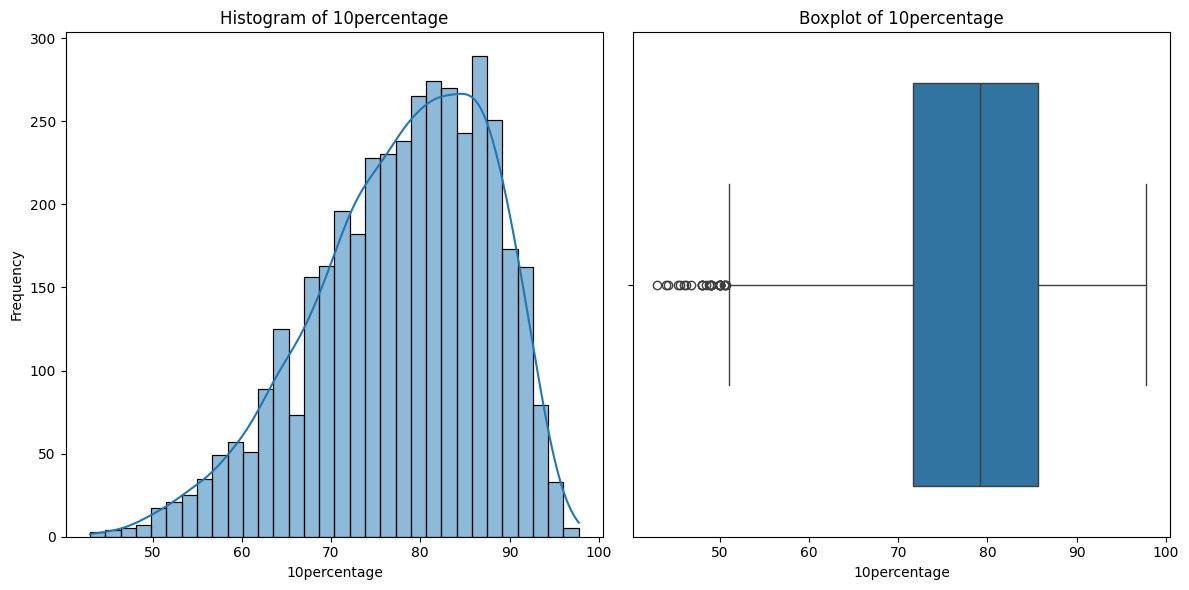

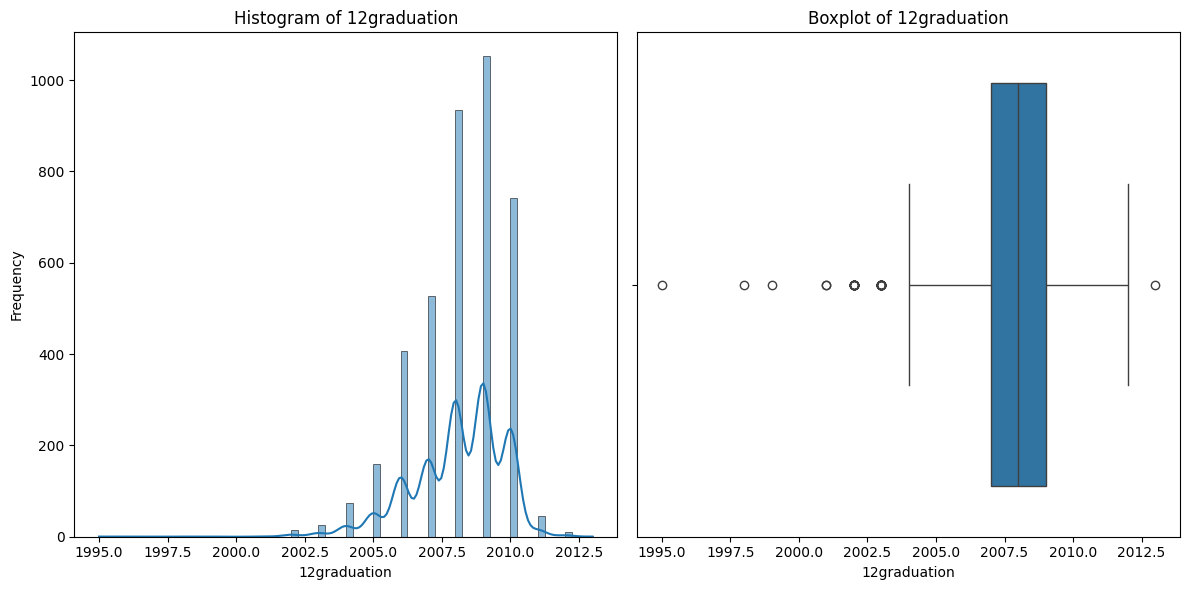

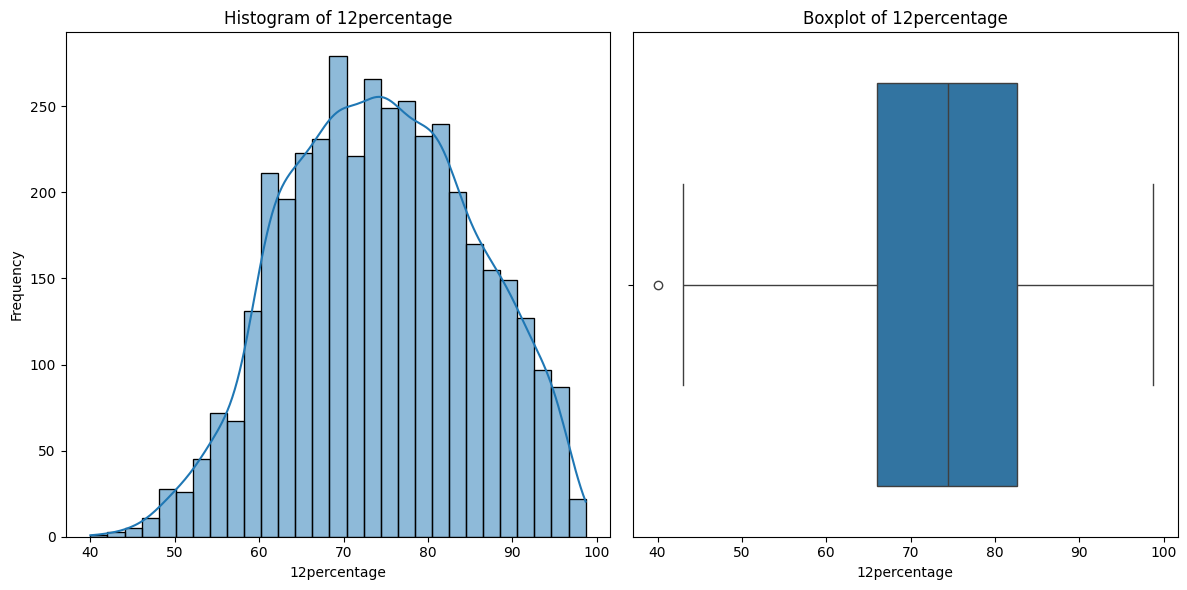

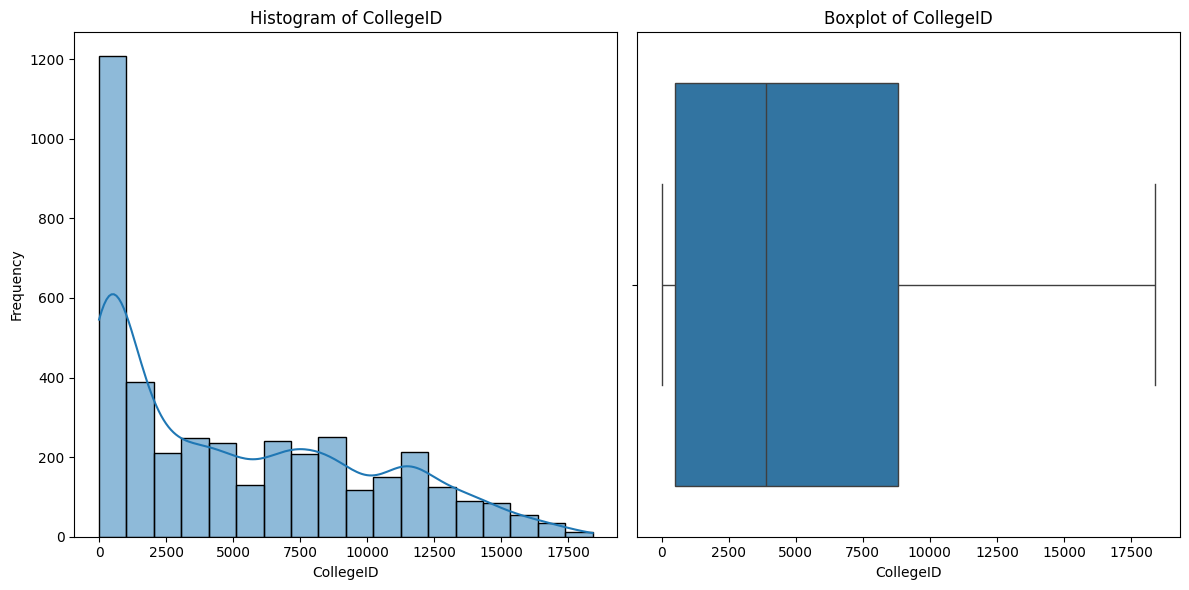

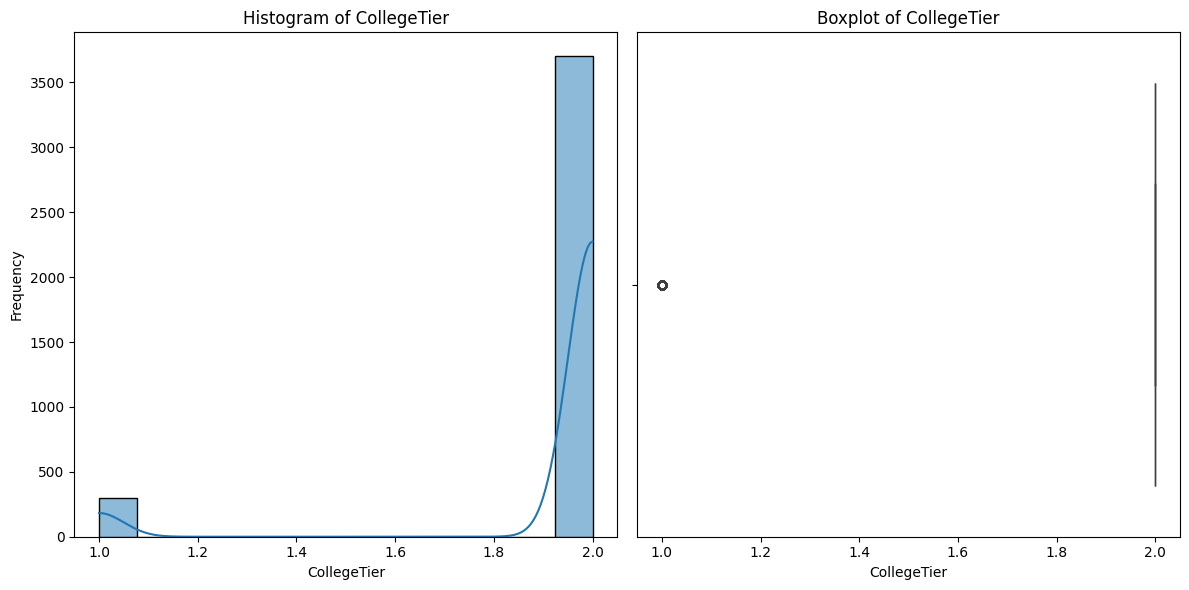

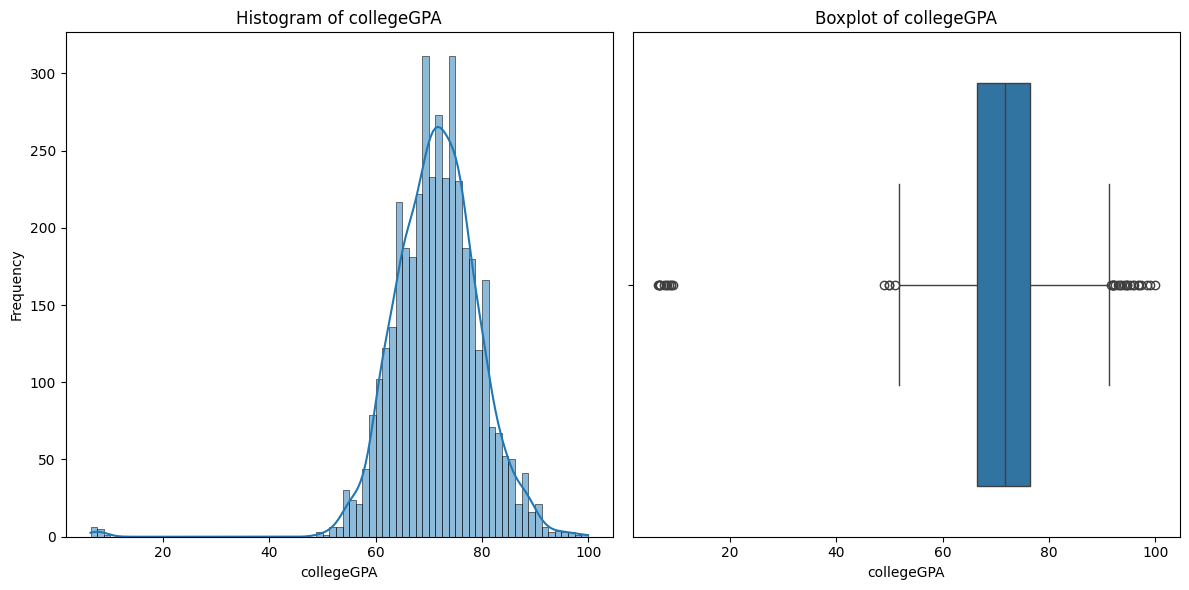

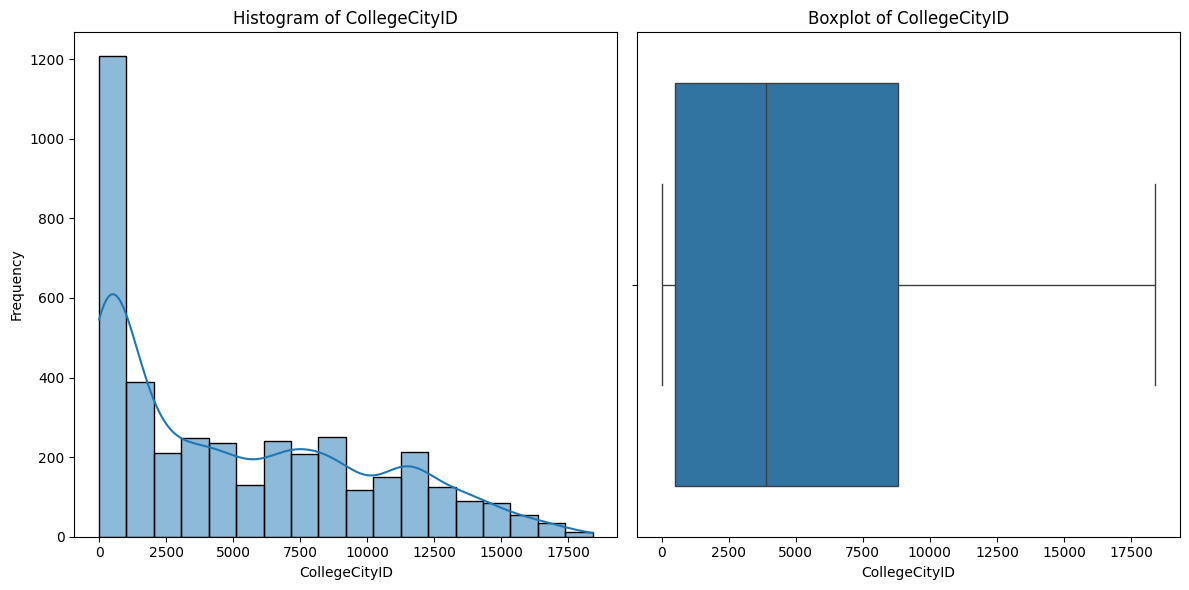

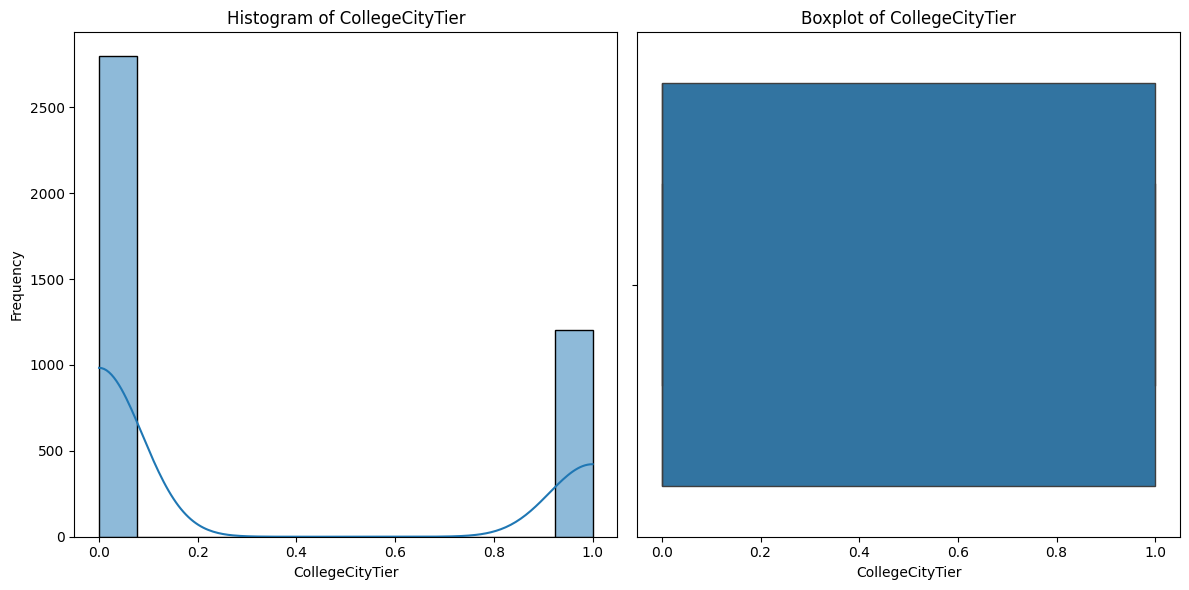

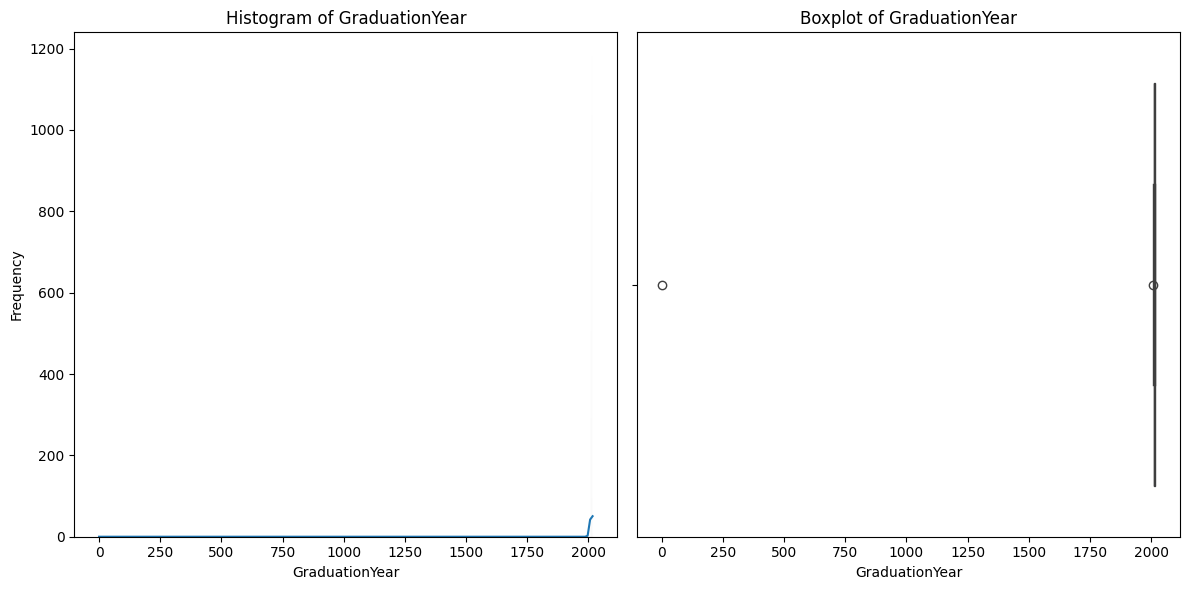

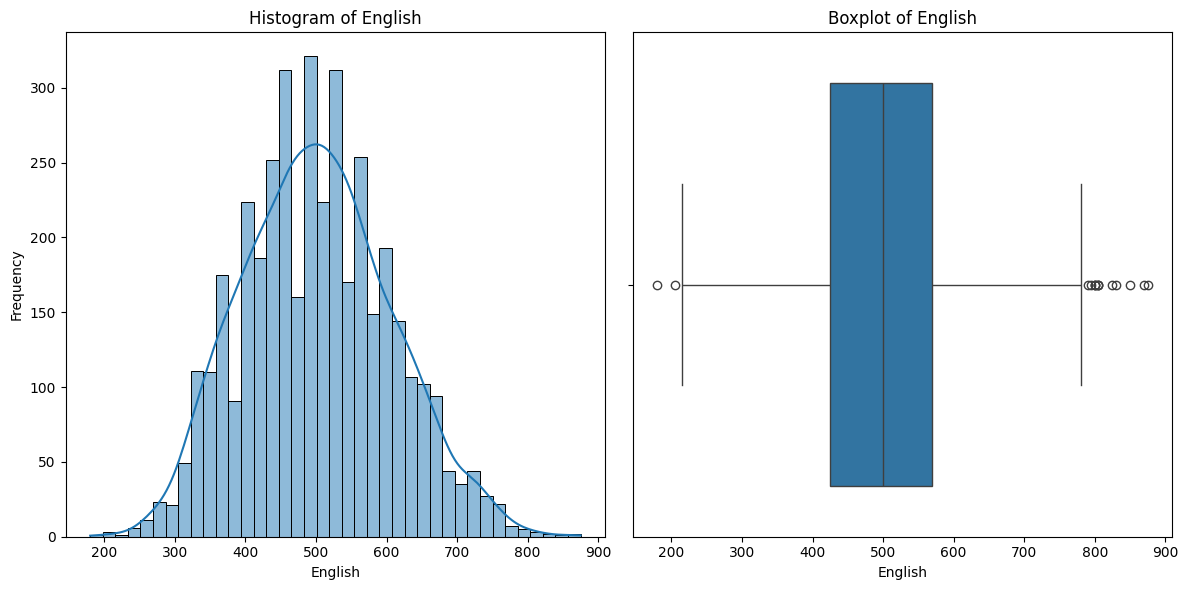

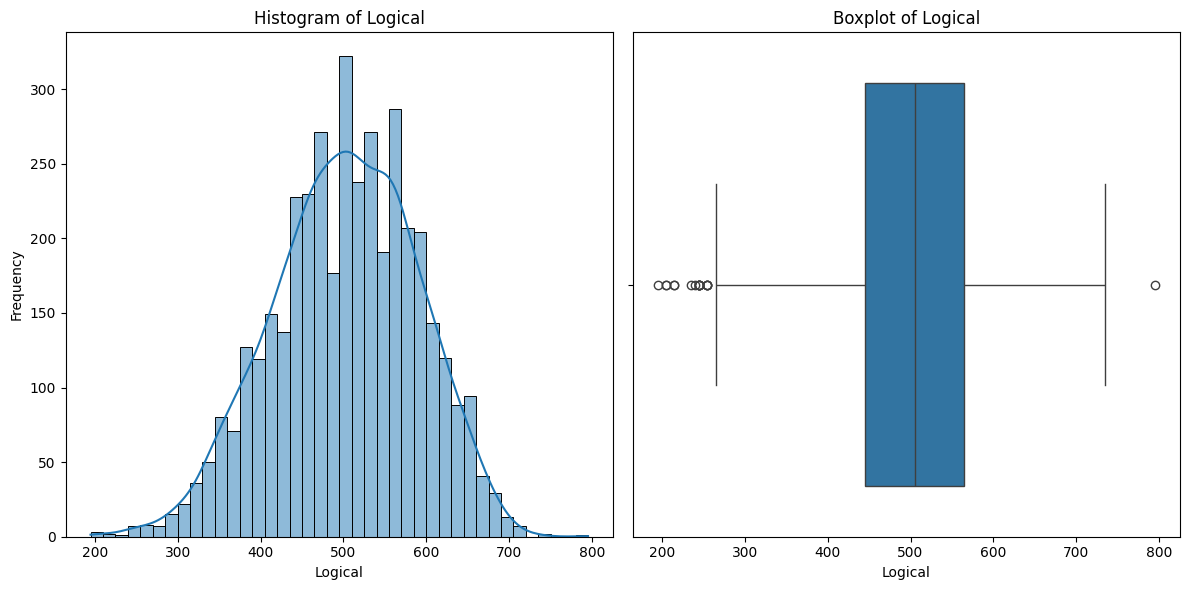

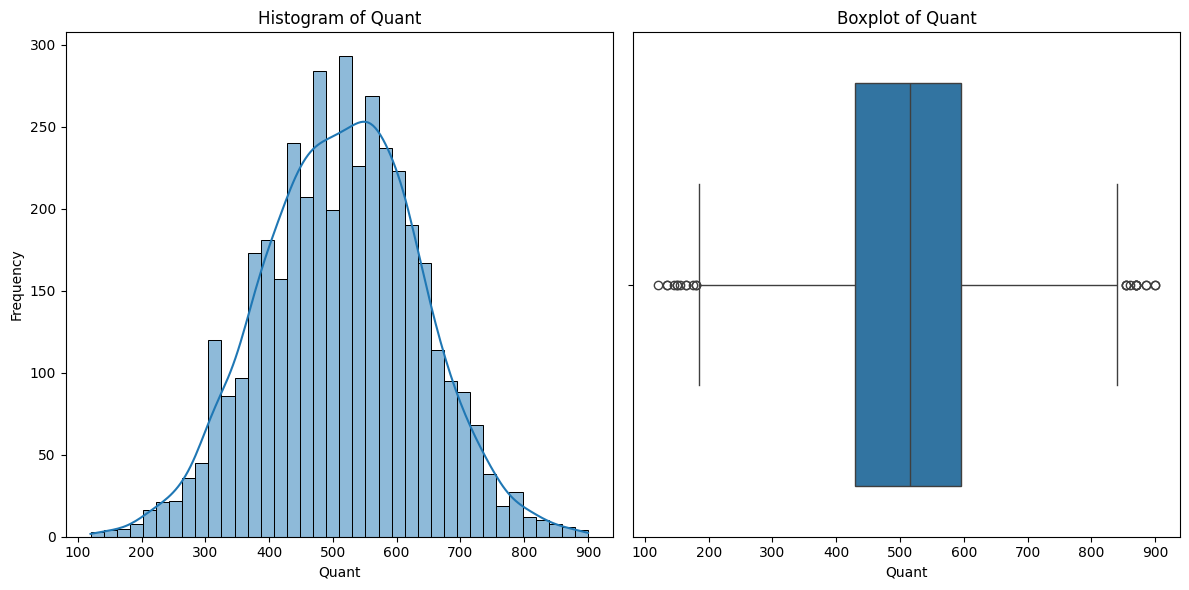

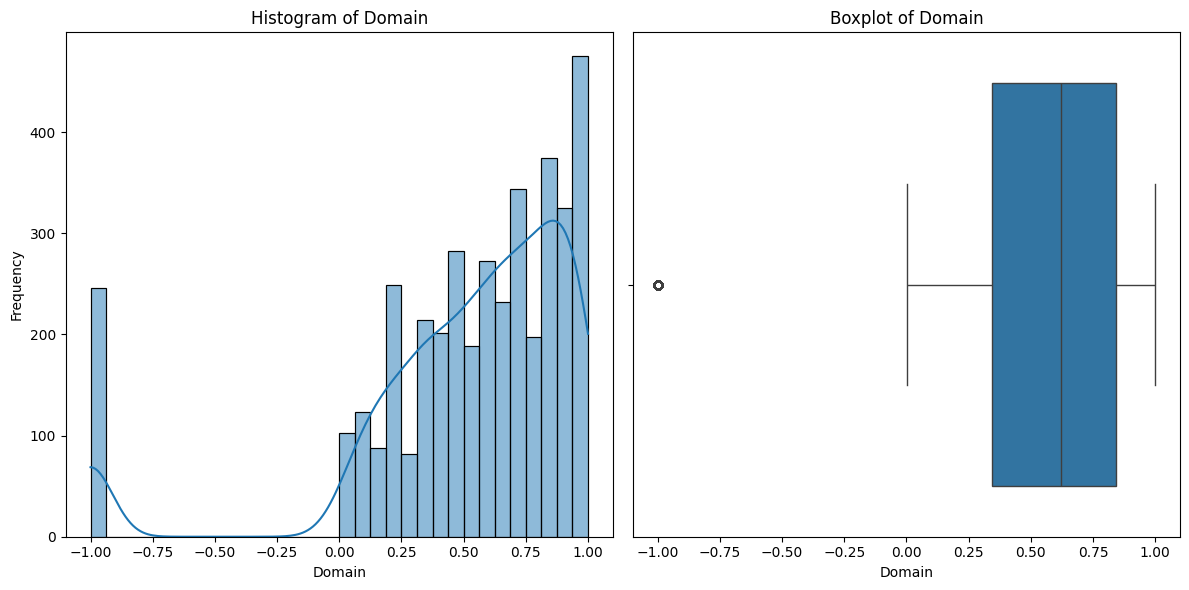

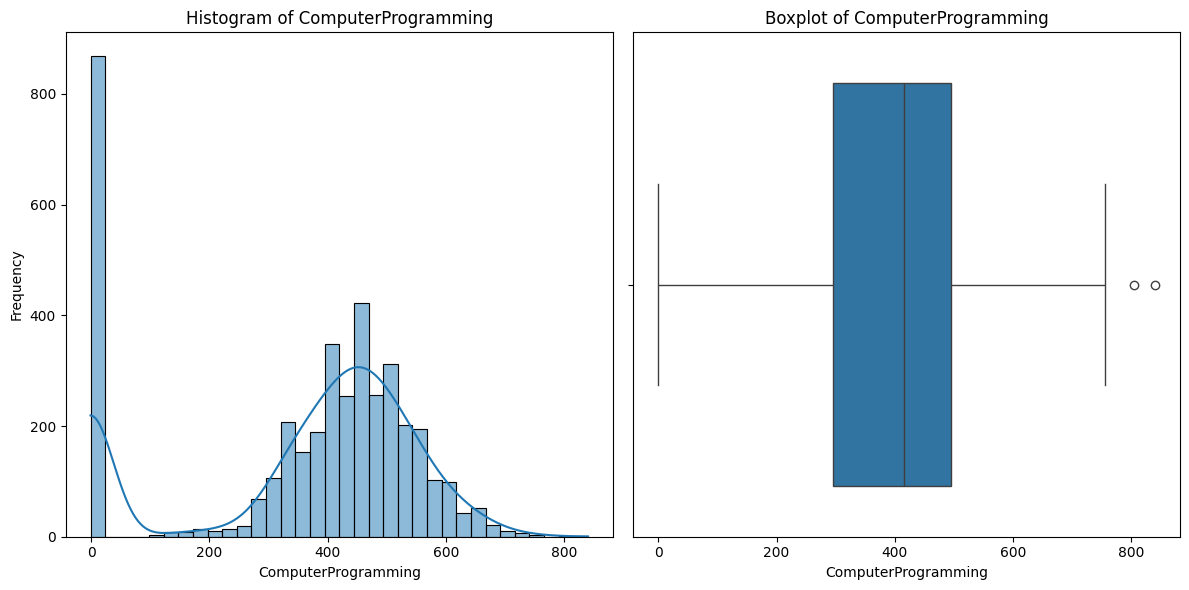

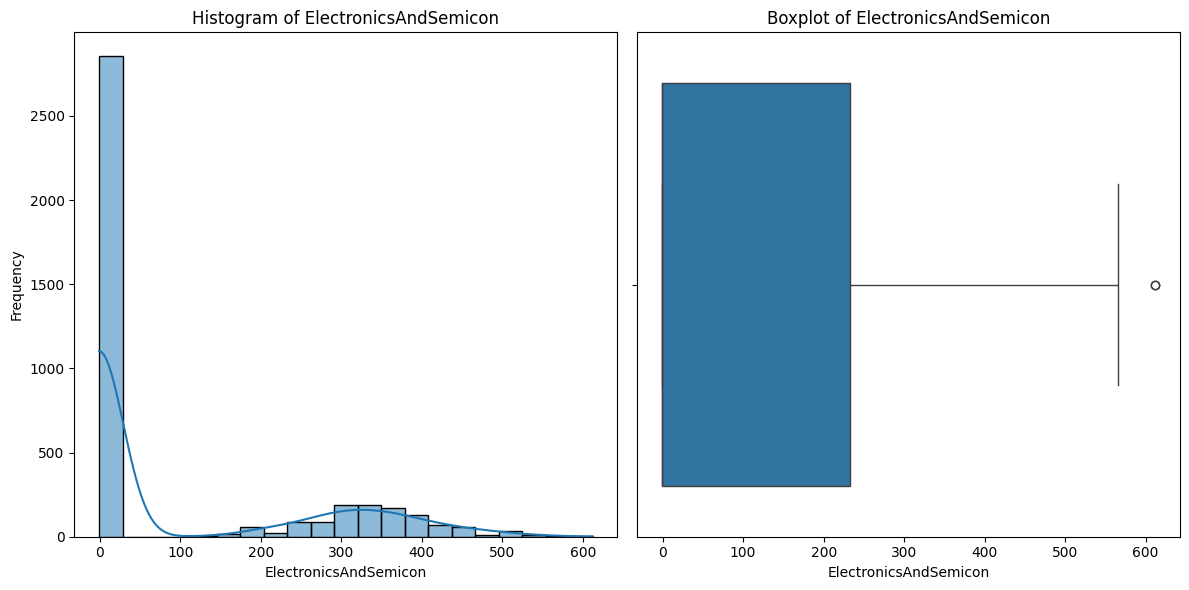

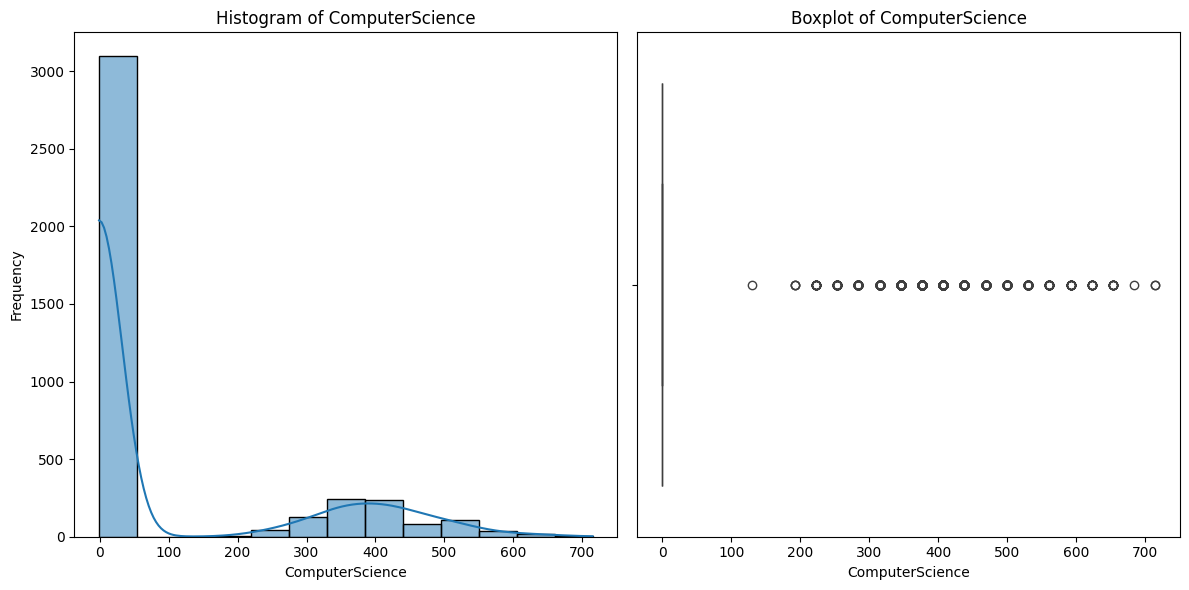

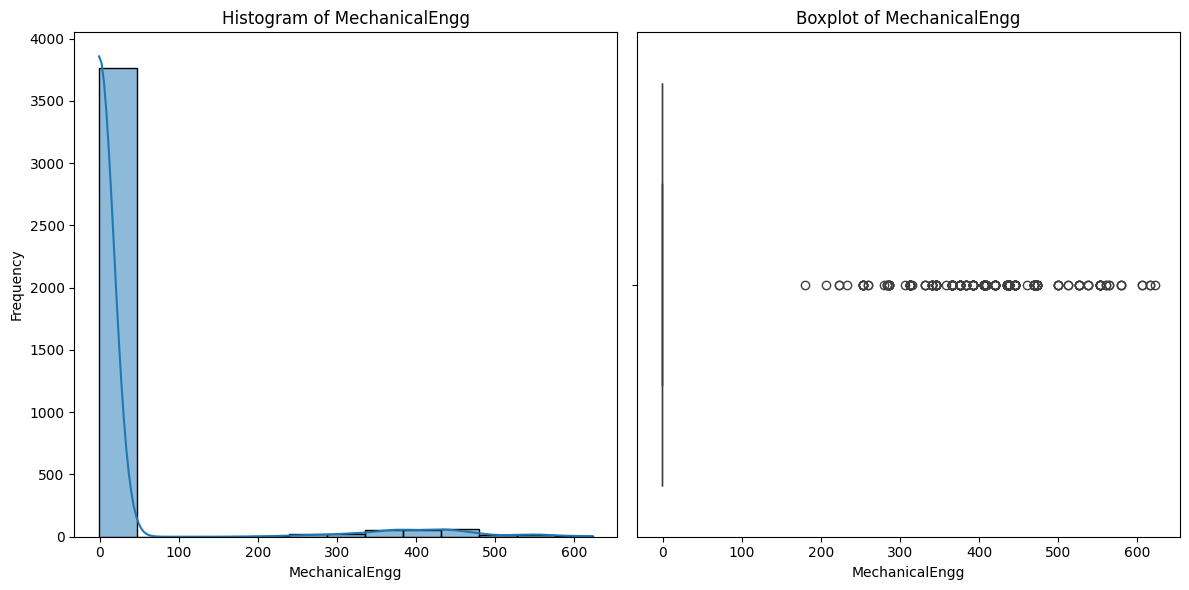

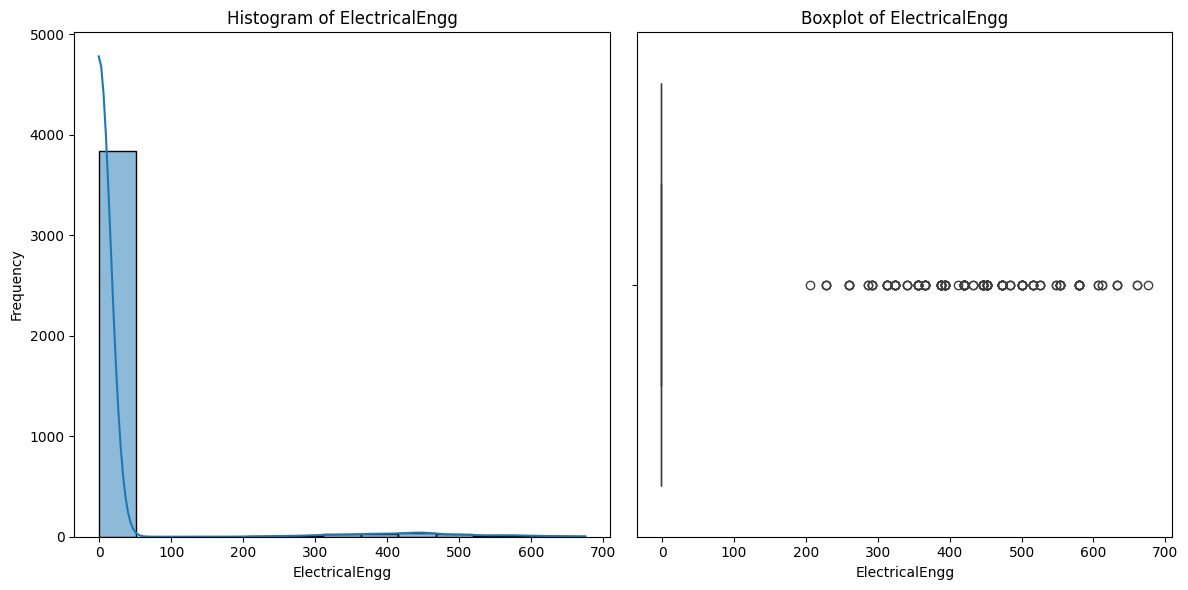

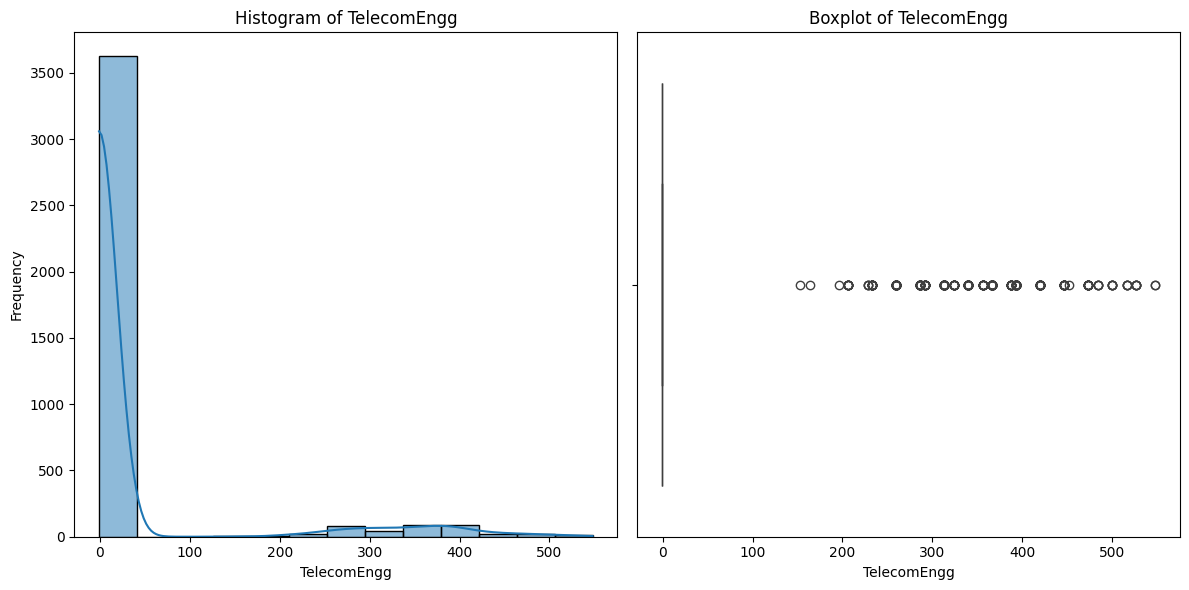

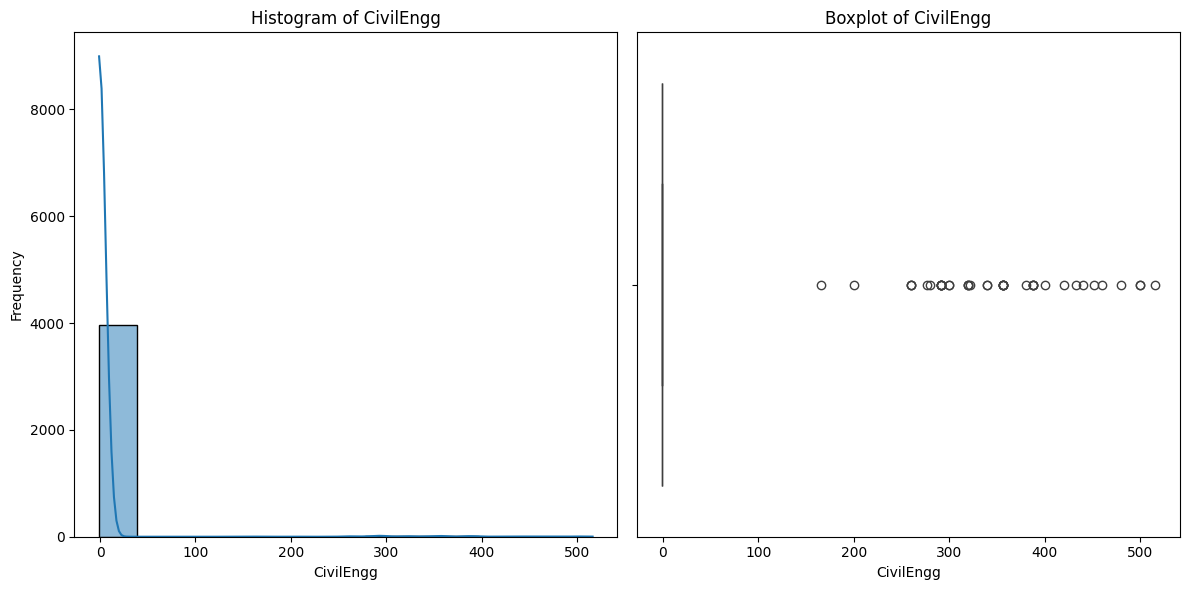

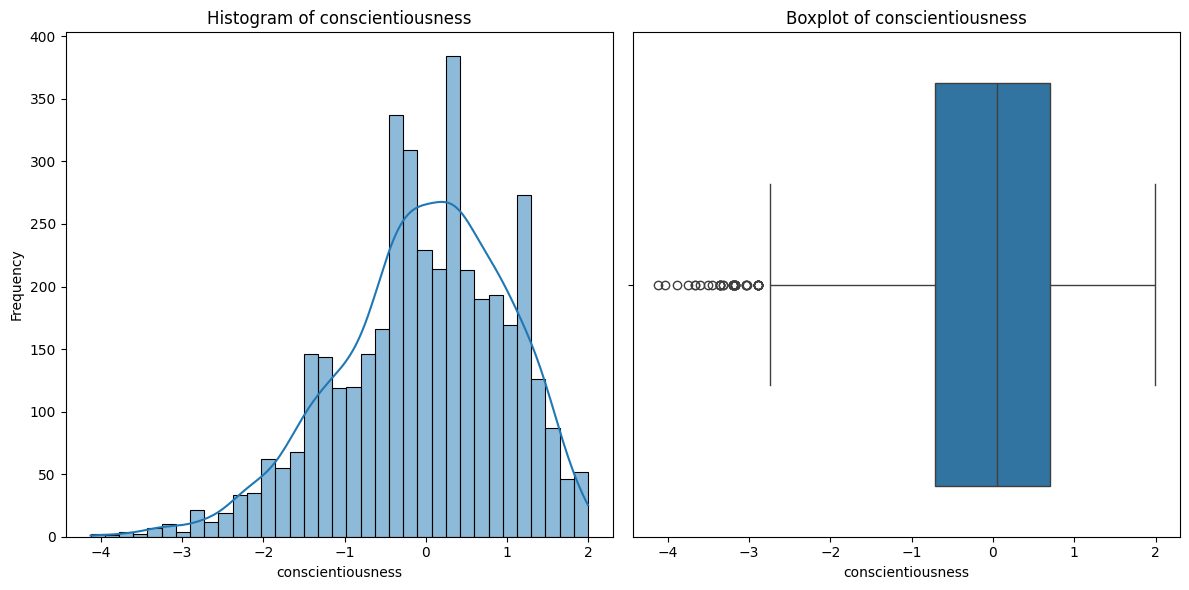

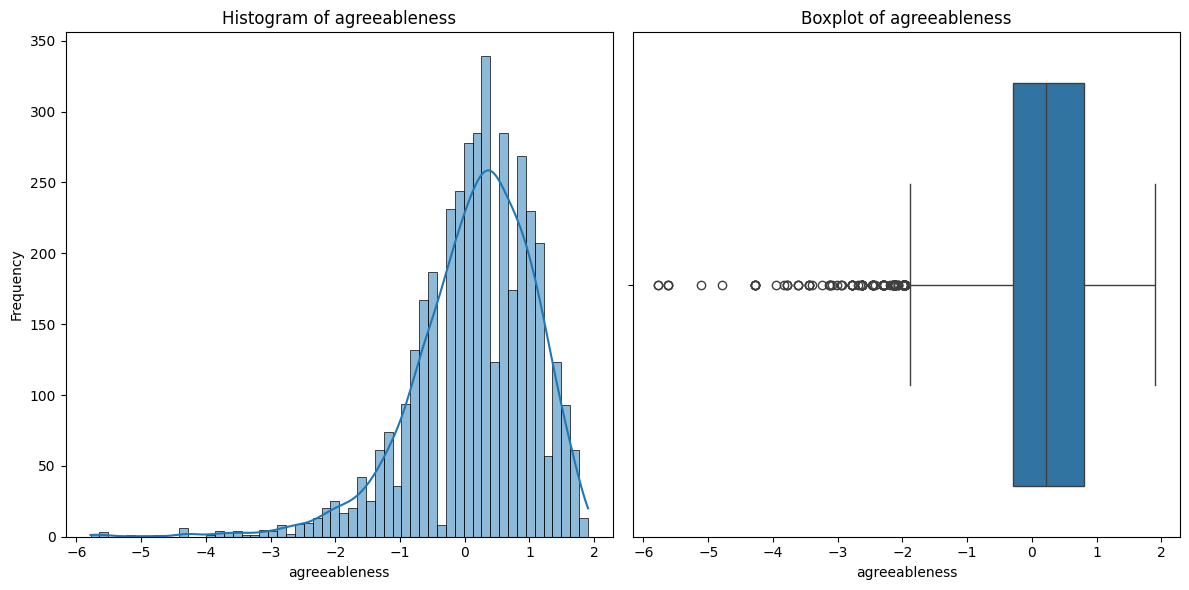

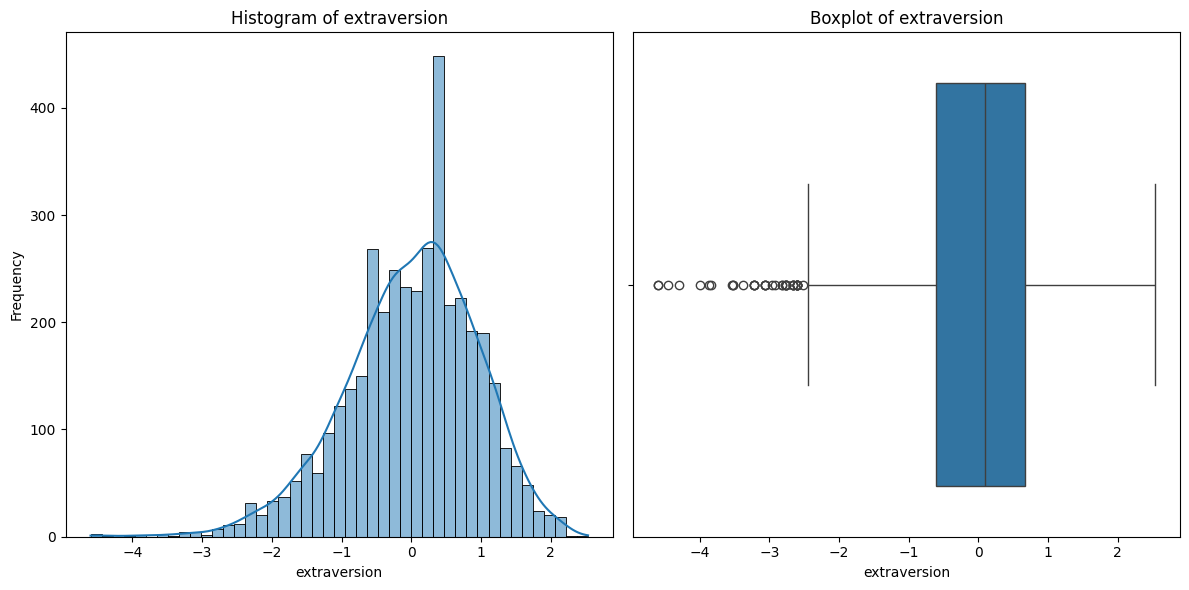

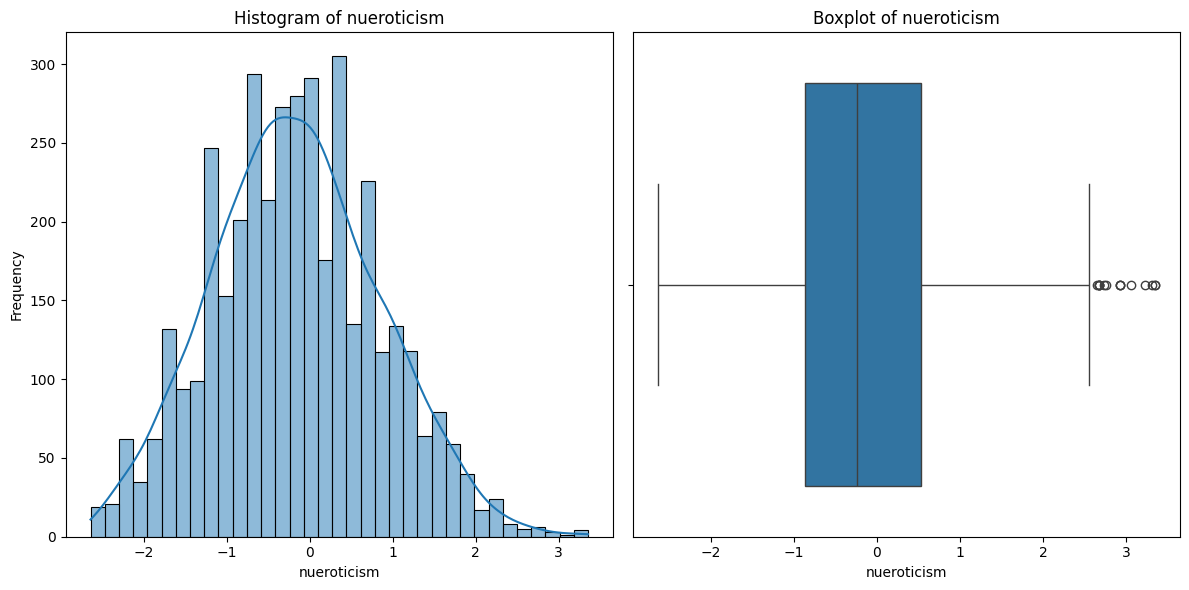

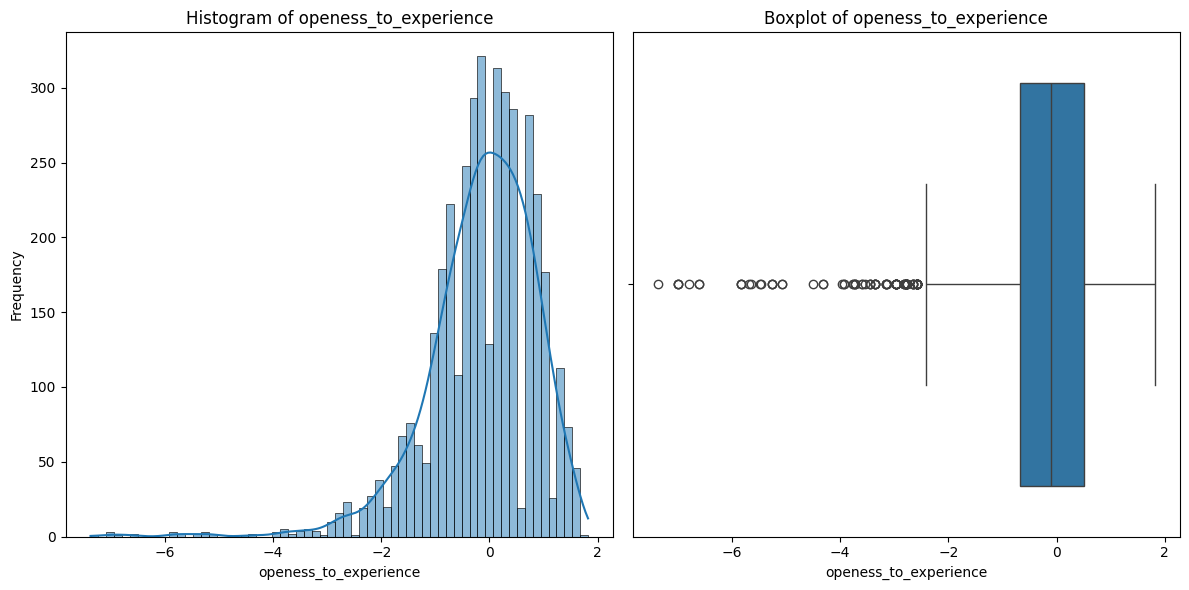

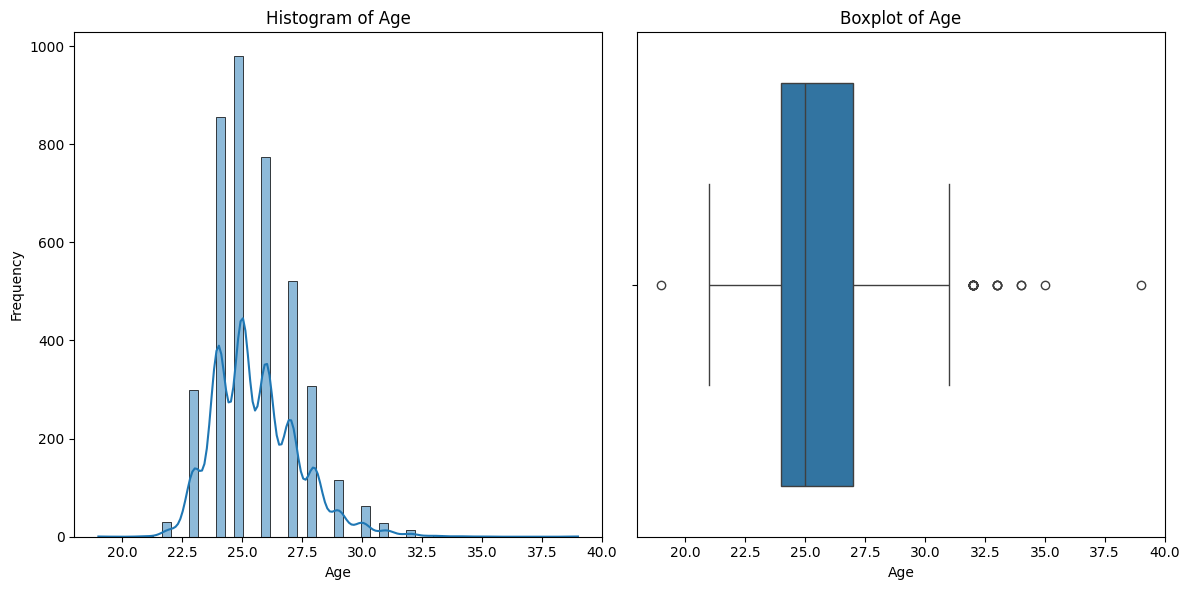

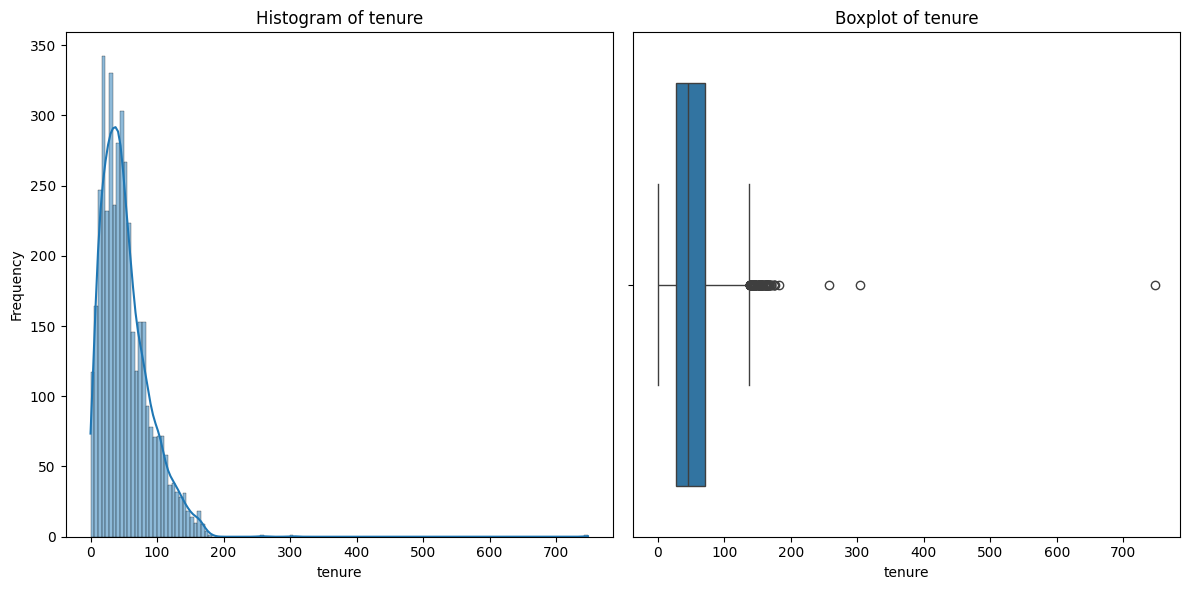

In [91]:
for col in num_columns.columns:
  plt.figure(figsize = (12, 6))

  plt.subplot(1, 2, 1)
  sns.histplot(df[col], kde = True)
  plt.title(f"Histogram of {col}")
  plt.xlabel(col)
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  sns.boxplot(x = df[col])
  plt.title(f"Boxplot of {col}")
  plt.xlabel(col)

  plt.tight_layout()
  plt.show()

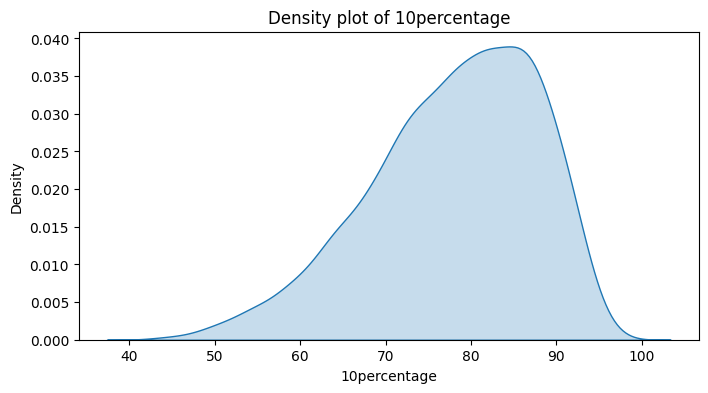

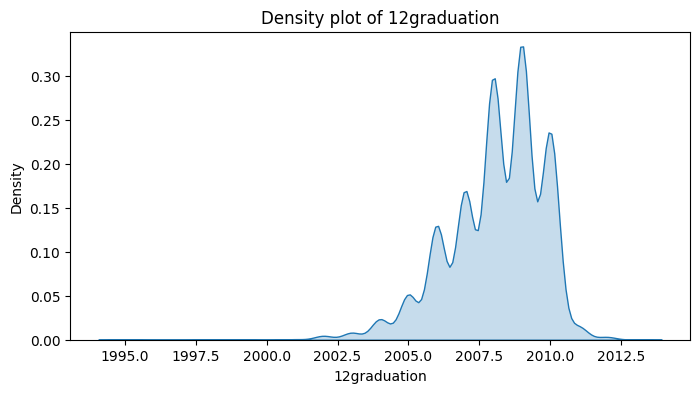

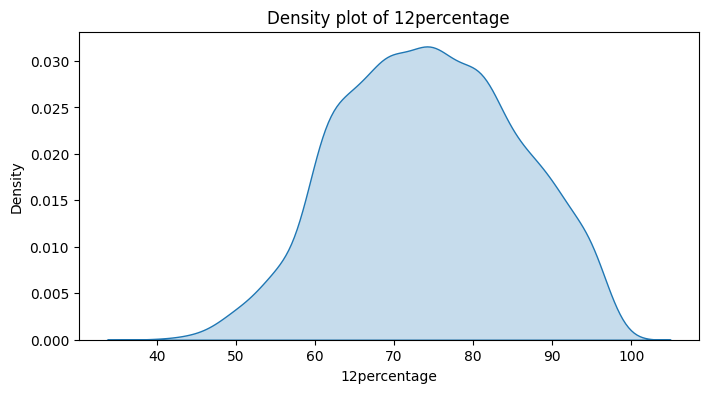

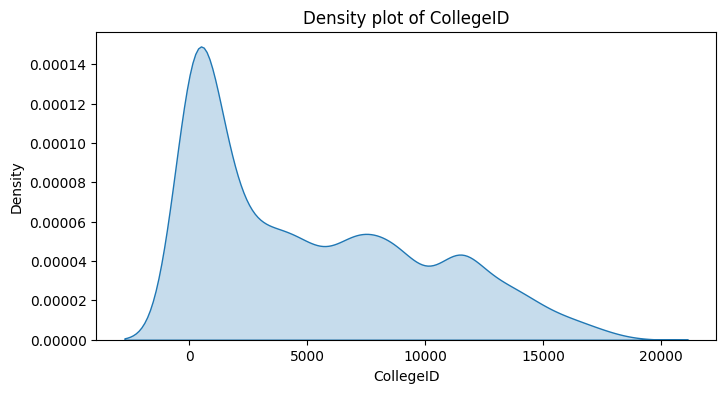

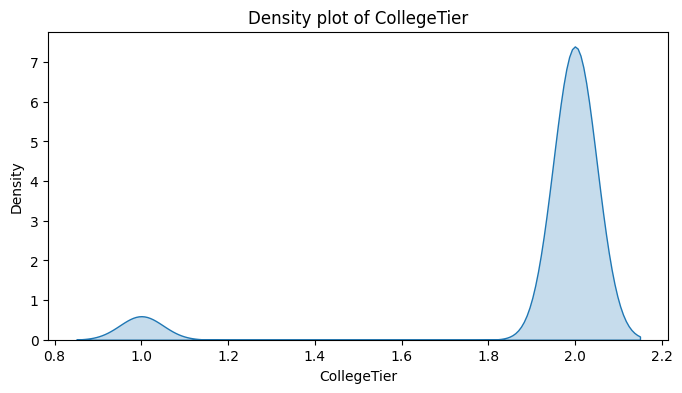

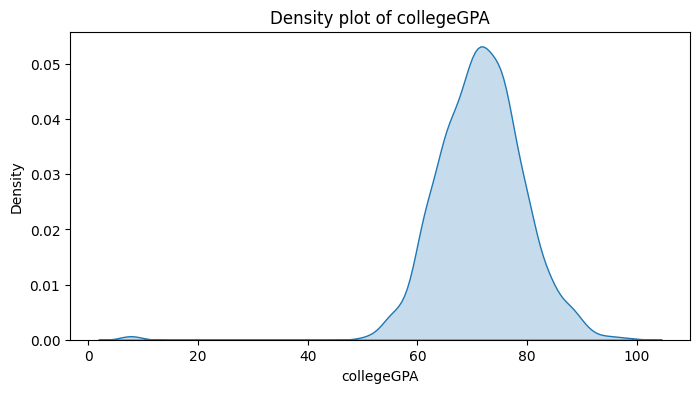

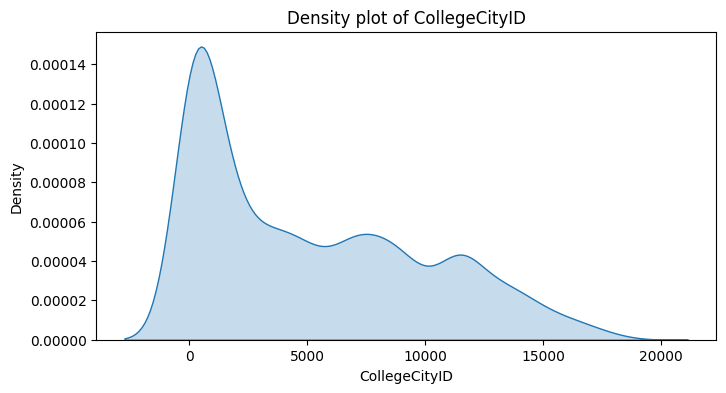

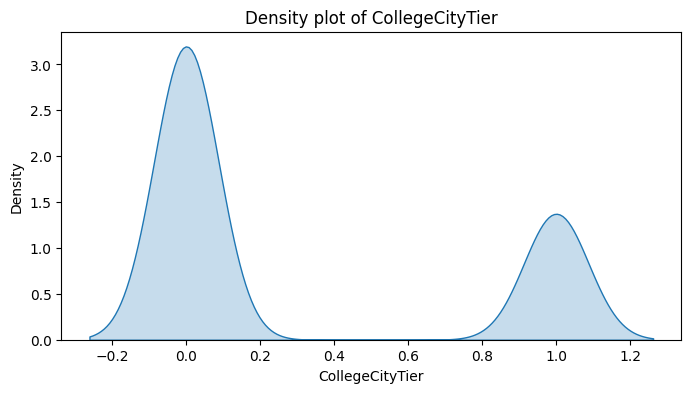

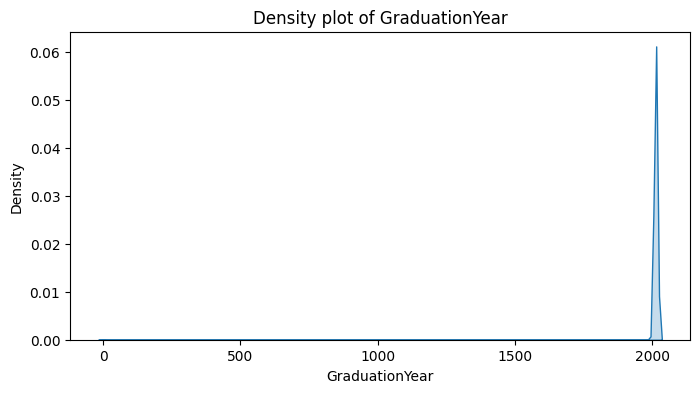

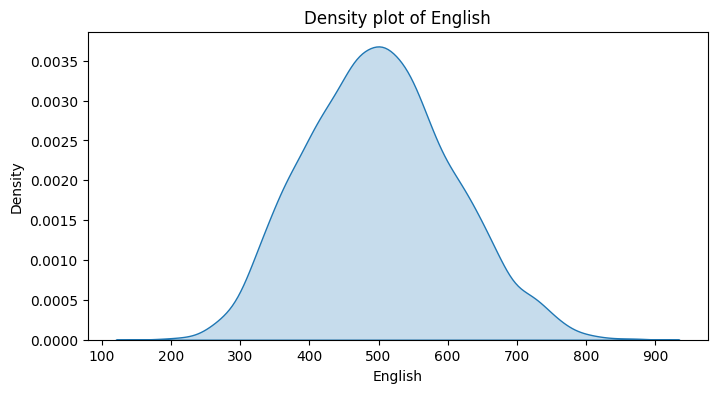

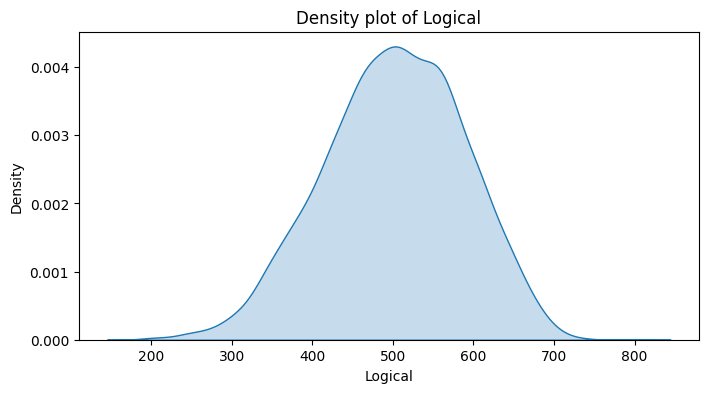

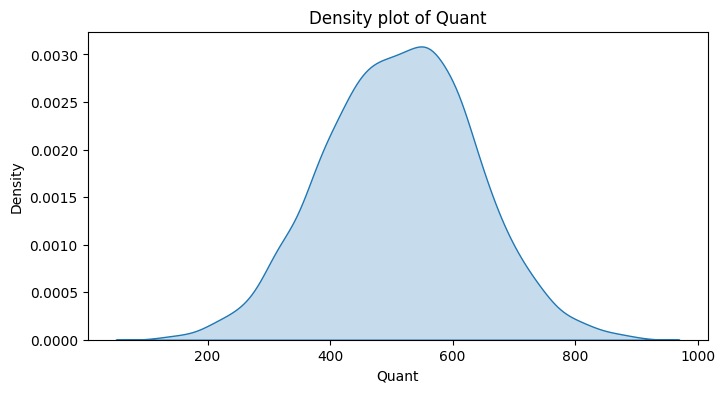

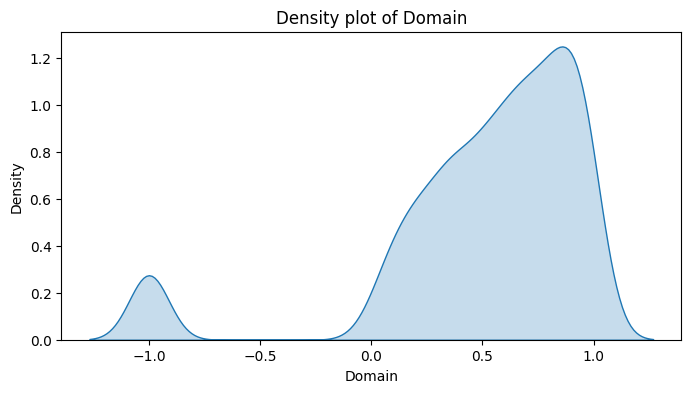

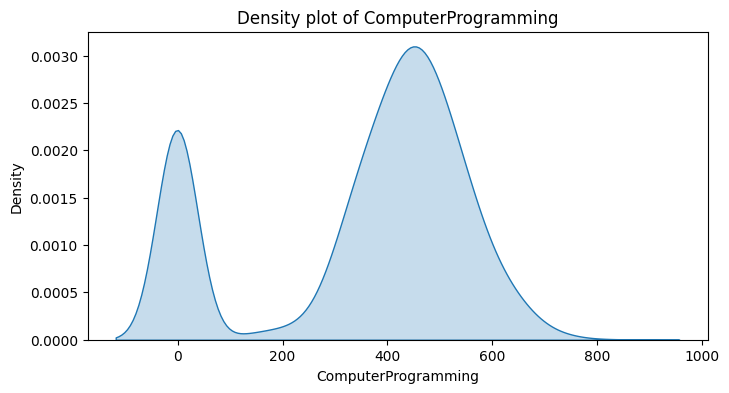

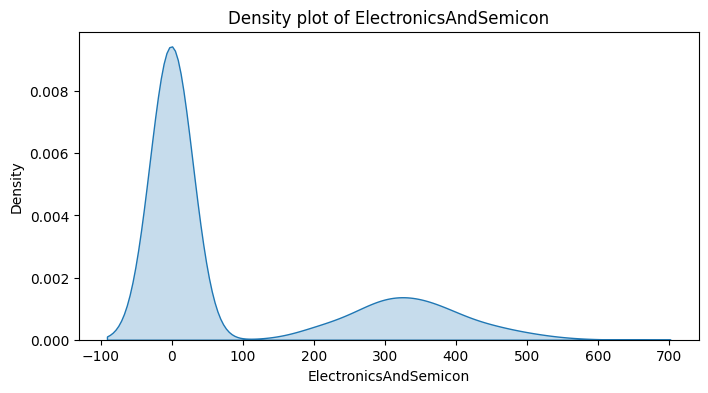

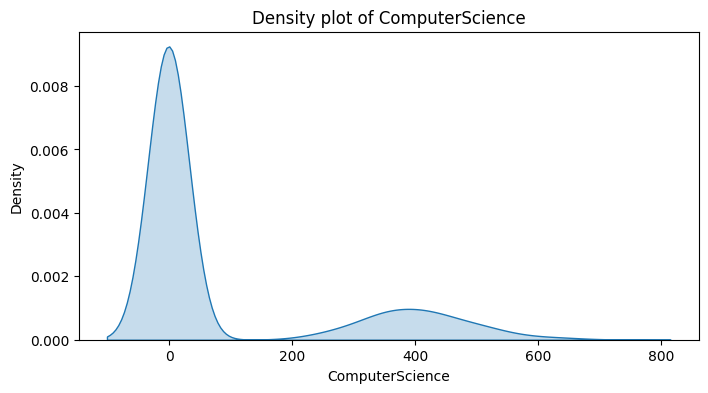

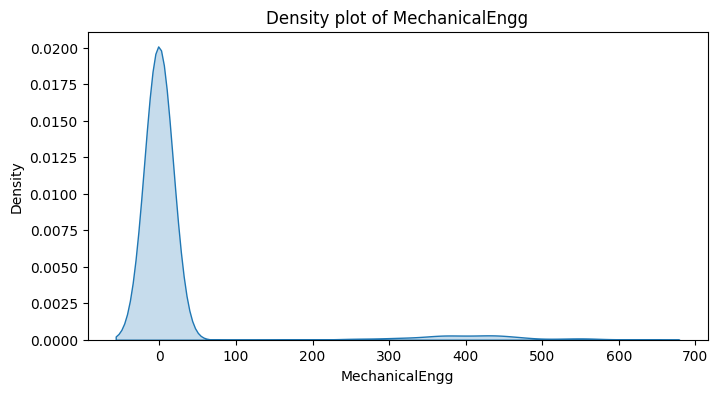

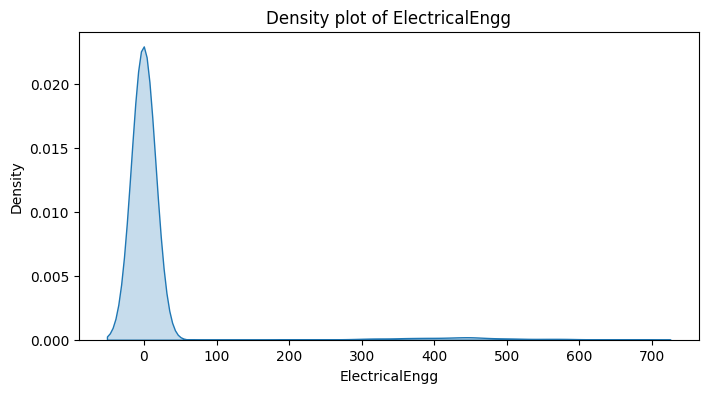

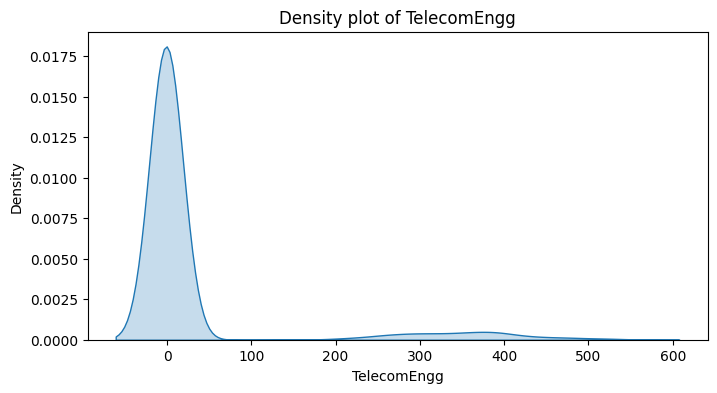

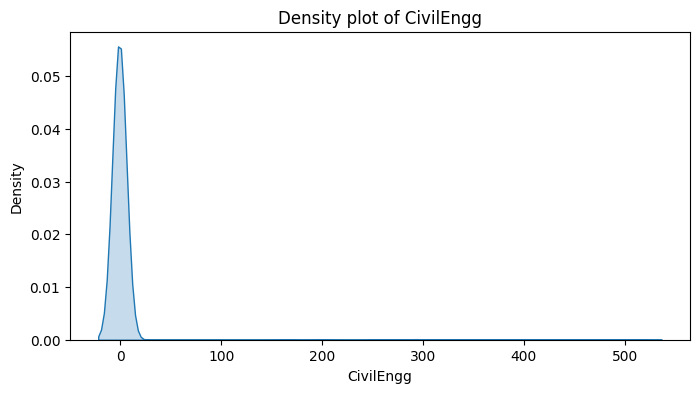

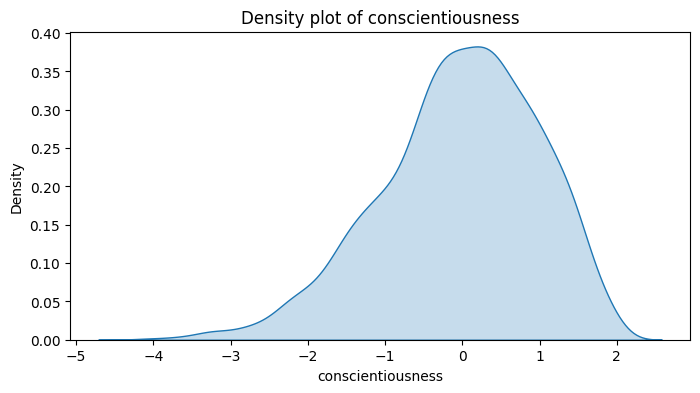

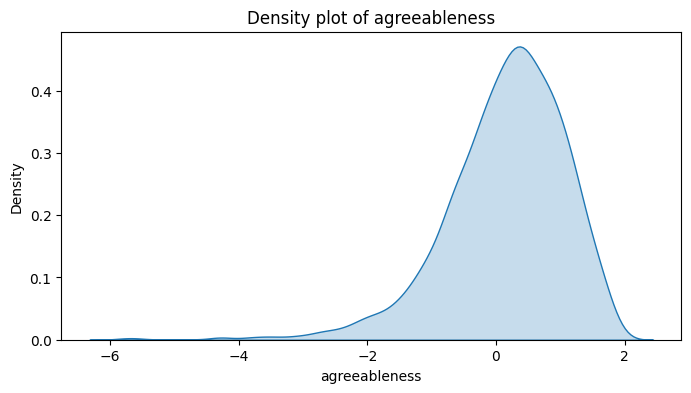

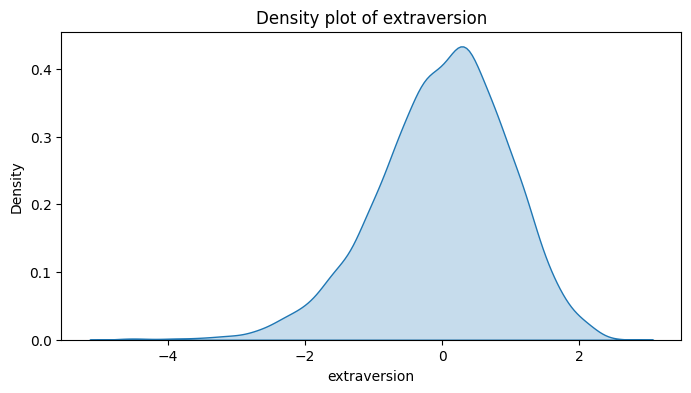

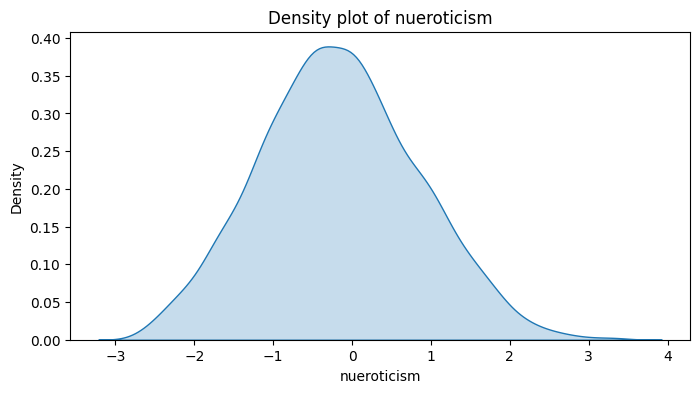

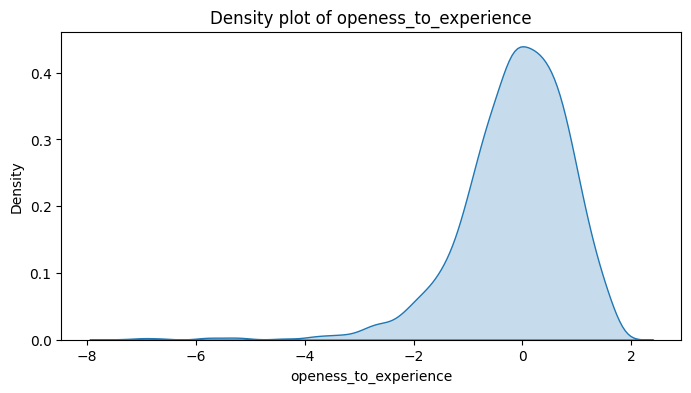

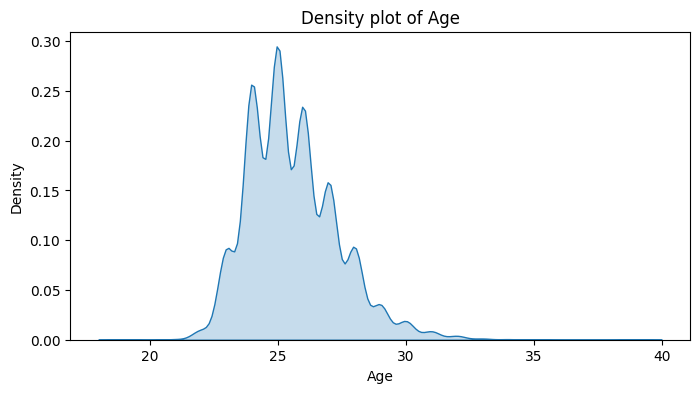

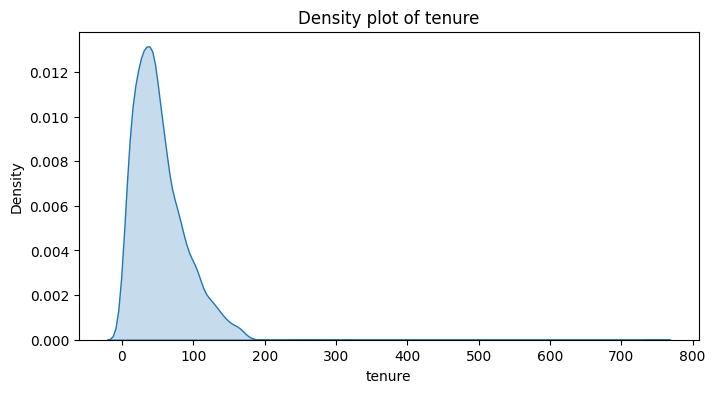

In [92]:
for col in num_columns.columns:
  plt.figure(figsize = (8, 4))
  sns.kdeplot(df[col], fill = True)
  plt.title(f"Density plot of {col}")
  plt.xlabel(col)
  plt.ylabel('Density')

- Most students scored around 85 marks in their 10th-grade exams, with some scoring notably lower.

- The majority of students graduated in 2008, while a smaller group finished their studies earlier.

- For the 12th-grade exams, most students scored around 80, though there were a few who scored either much lower or much higher.

- Most students attended tier 2 colleges, while only a few had the opportunity to study in tier 1 institutions.

- The typical college GPA for students was around 80, with a few individuals having significantly lower or higher scores.

- The majority of students attended colleges located in tier 1 cities.

- In the English section, most students scored around 500 points, with some achieving much lower or higher scores.

- In the Logical section, a similar trend was observed, with most students scoring around 500 and a few outliers scoring much differently.

- The Quant section also saw most students scoring around 500, with a few performing notably better or worse.

- For the Computer Programming section, most scores clustered around 400, with some students scoring much higher or lower.

- In the Electronics and Semiconductor section, most students scored around 100, with a few scoring significantly lower.

- The Computer Science section saw most students scoring around 50, but a few managed to score higher.

- In the Mechanical Engineering section, most students scored around 50, with some achieving notably better results.

- Similar patterns were observed in the Electrical Engineering and Telecom Engineering sections, with most students scoring around 50 and a few standing out with higher scores.

- In the Civil Engineering section, most scores hovered around 50, with some students scoring higher.

- For the personality traits—conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience—most students scored around zero, though some had scores that were significantly higher or lower.

- Most of the candidates were around 25 years old, with a few being considerably older.

- This data suggests that most candidates had a job tenure of approximately 50 months, while some had significantly longer tenures.

In [93]:
cat_columns.head()

Designation    JobCity Gender 10board      12board       Degree  \
0           Engineering  Bangalore      f   Other  State Board  B.Tech/B.E.   
1  Software Development      Other      m    CBSE         CBSE  B.Tech/B.E.   
2           Engineering    Chennai      f    CBSE         CBSE  B.Tech/B.E.   
3           Engineering    Gurgaon      m    CBSE         CBSE  B.Tech/B.E.   
4                 Other      Other      m    CBSE         CBSE  B.Tech/B.E.   

                              Specialization    CollegeState  
0                       computer engineering  Andhra Pradesh  
1  electronics and communication engineering  Madhya Pradesh  
2                     information technology   Uttar Pradesh  
3                       computer engineering           Delhi  
4  electronics and communication engineering   Uttar Pradesh

In [94]:
for col in cat_columns.columns:
  print(df[col].value_counts())
  print('--------------------------------')

Designation
Engineering              2137
Software Development      834
Other                     538
Data Analytics            411
Quality Assurance          44
Support & Maintenance      34
Name: count, dtype: int64
--------------------------------
JobCity
Other        1279
Bangalore     698
Noida         416
Hyderabad     374
Pune          327
Chennai       306
Delhi         226
Gurgaon       223
Mumbai        149
Name: count, dtype: int64
--------------------------------
Gender
m    3041
f     957
Name: count, dtype: int64
--------------------------------
10board
State Board      1497
CBSE             1399
Other             511
ICSE              284
SSC               129
RBSE               79
Matriculation      64
BSEB               27
PSEB                8
Name: count, dtype: int64
--------------------------------
12board
State Board    1758
CBSE           1403
Other           837
Name: count, dtype: int64
--------------------------------
Degree
B.Tech/B.E.      3700
MCA          

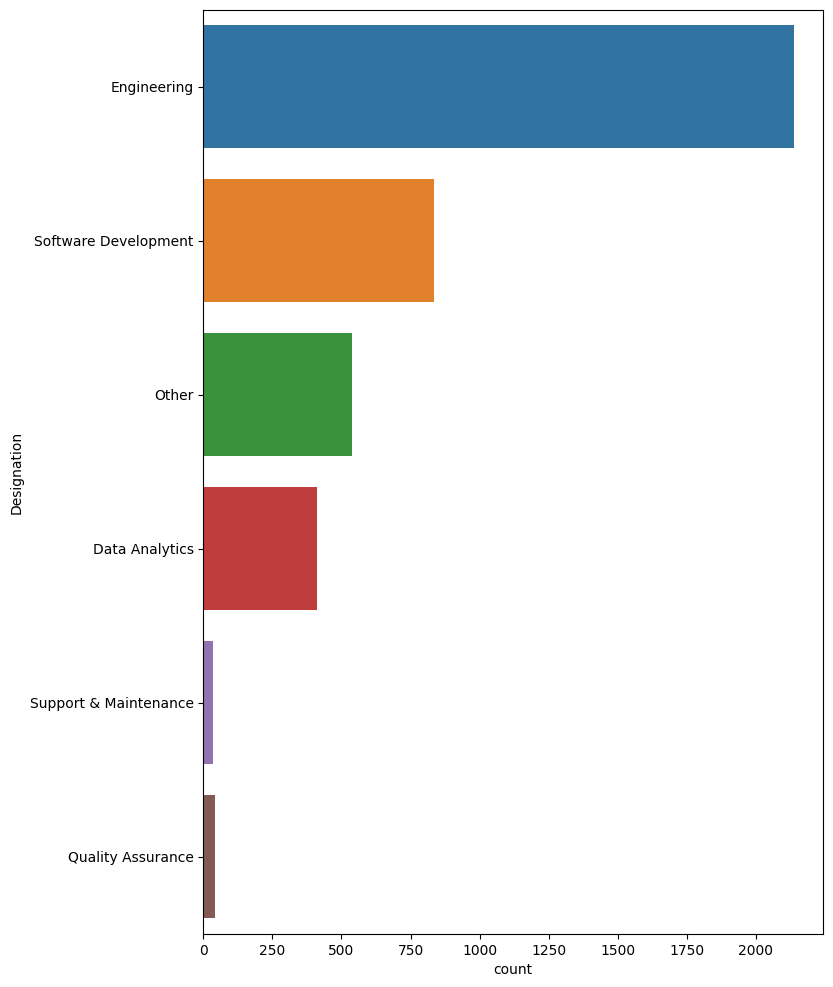

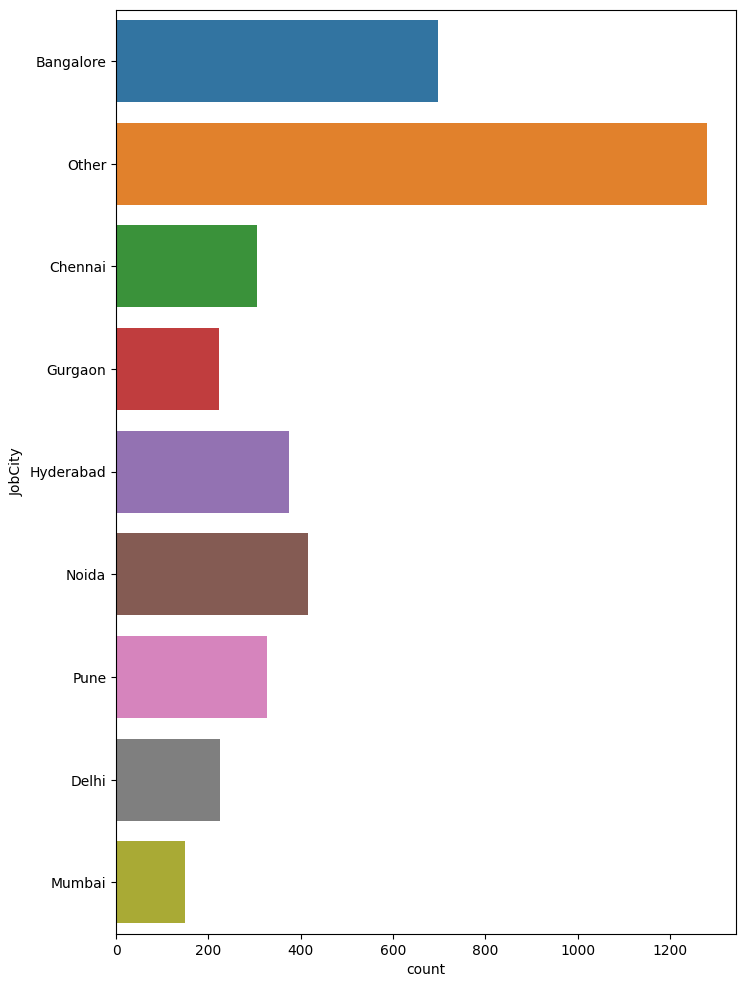

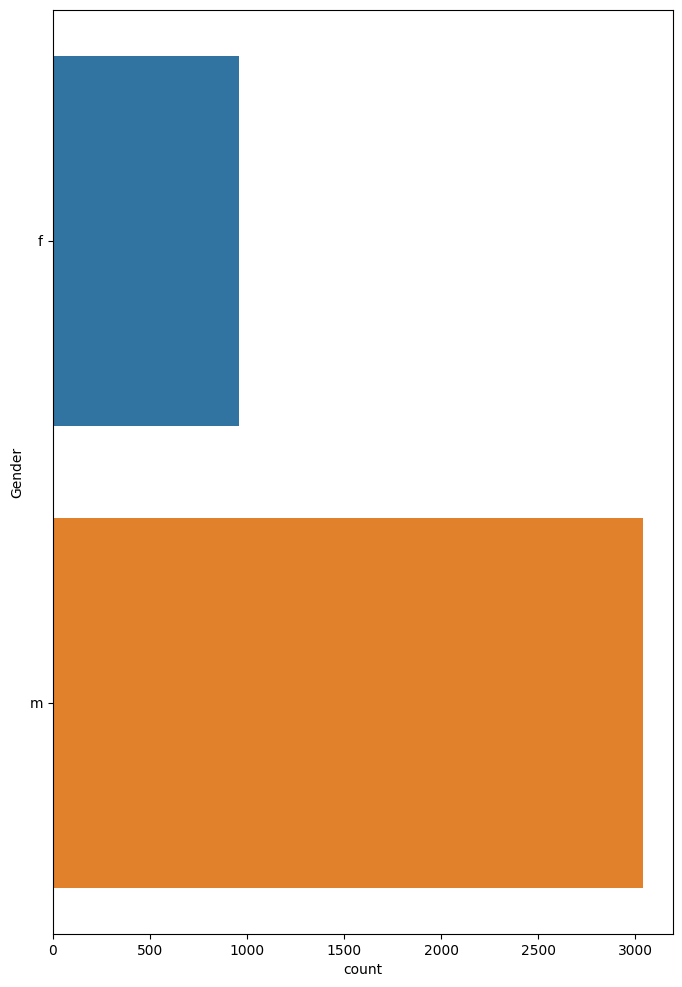

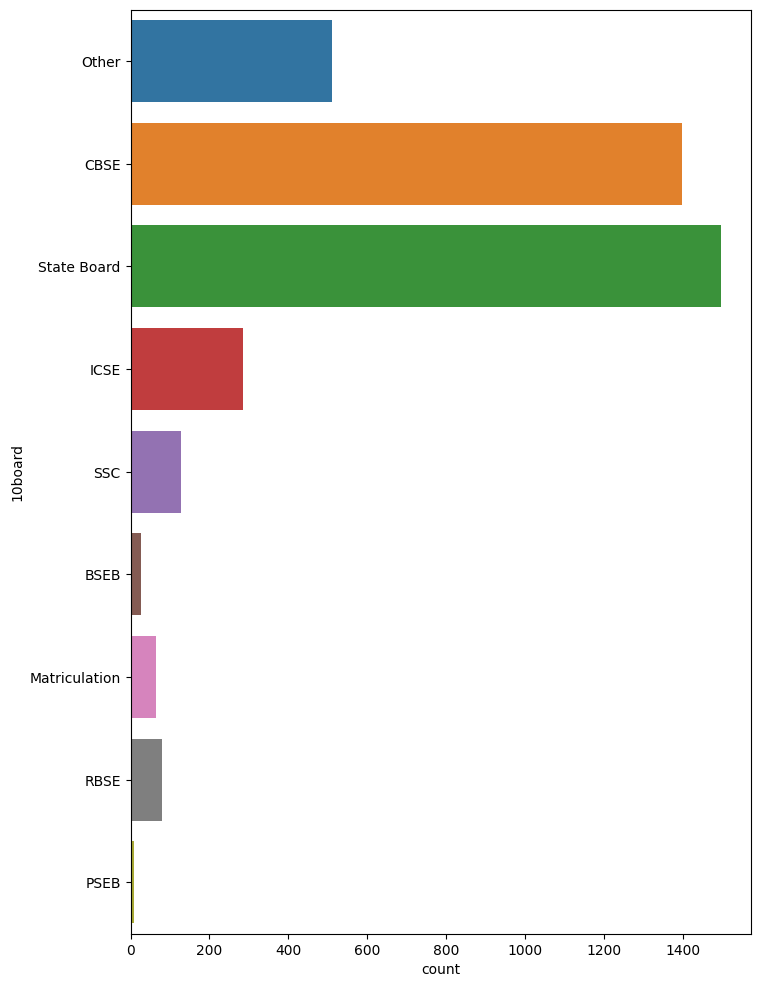

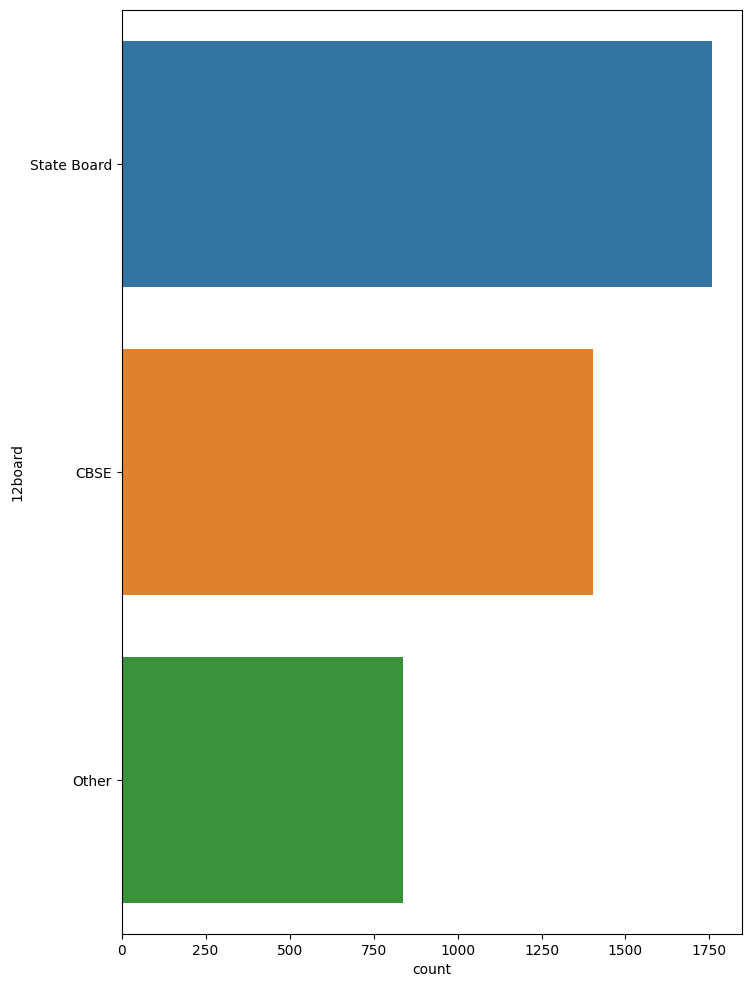

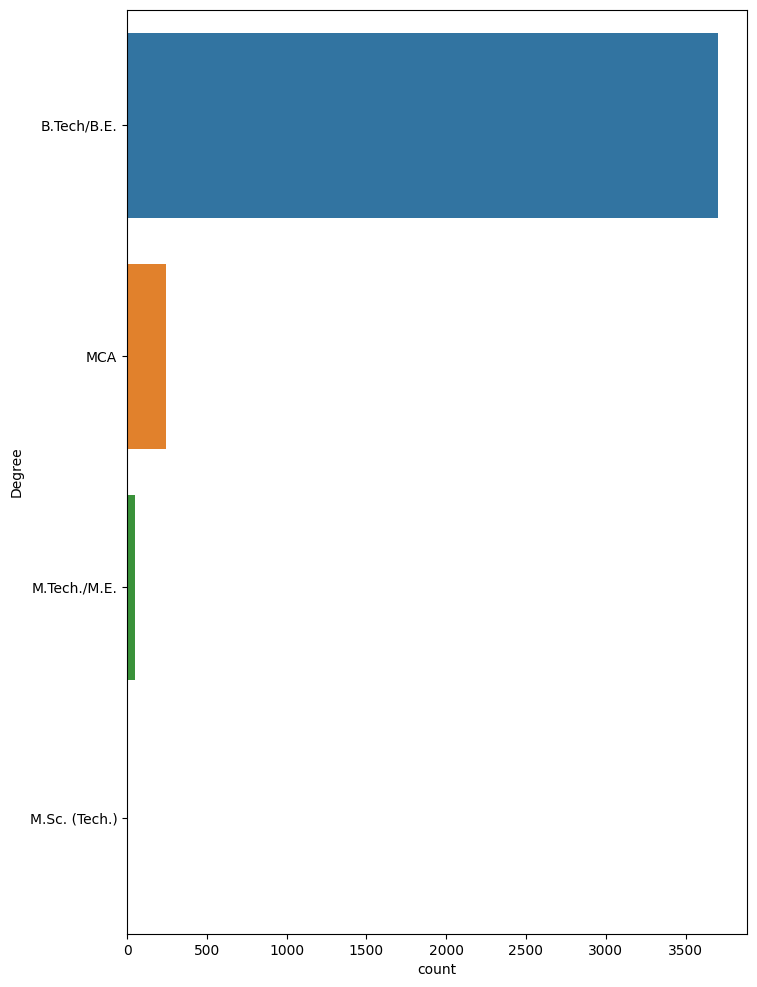

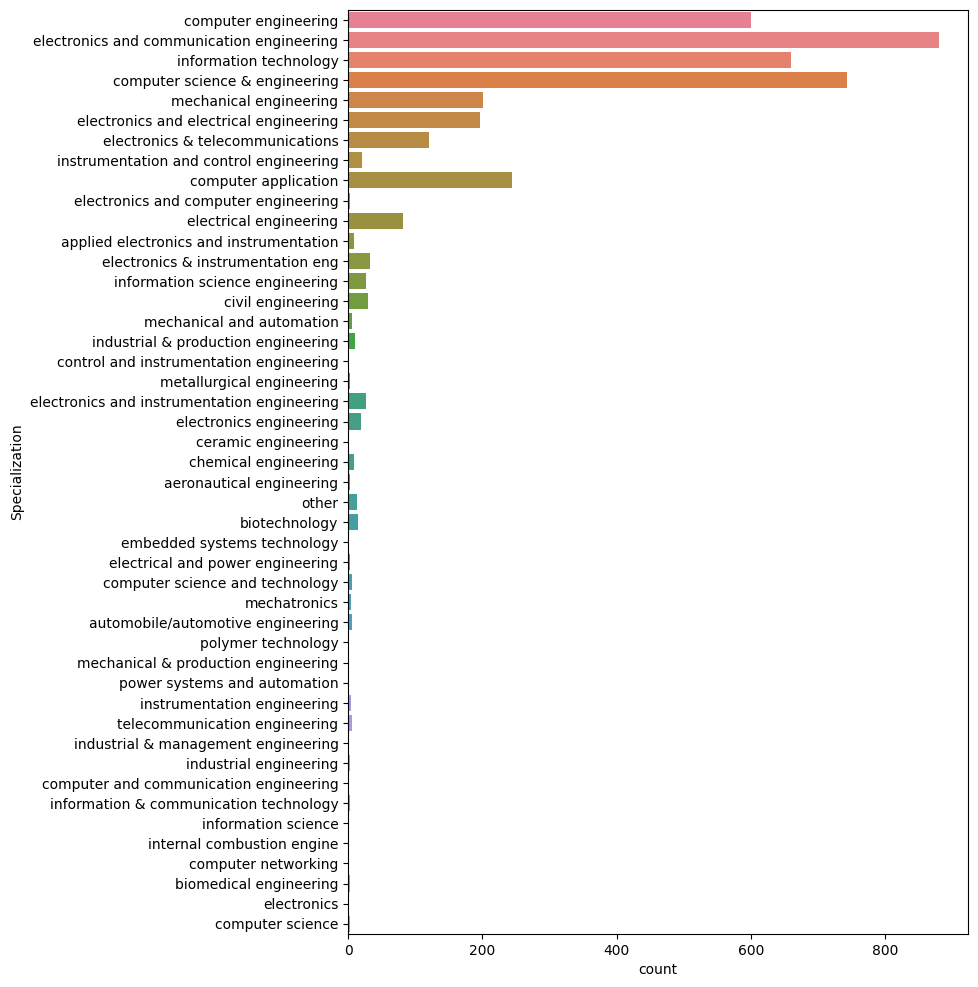

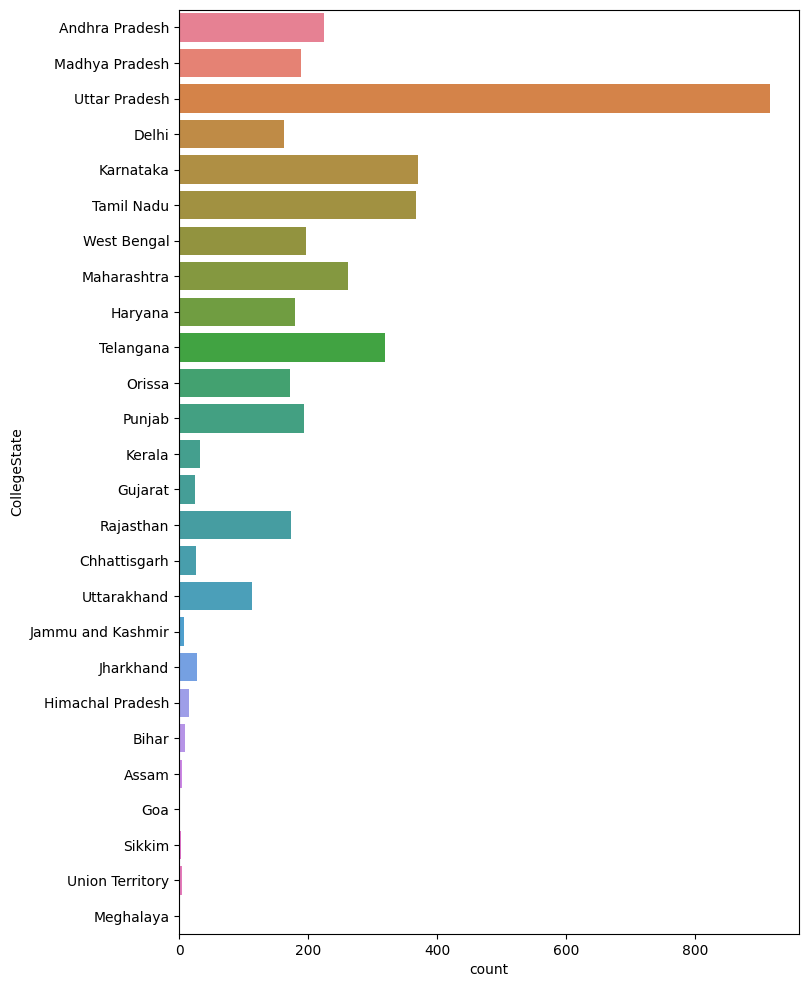

In [95]:
for col in cat_columns.columns:
  plt.figure(figsize = (8, 12))
  sns.countplot(y = col, data = df, hue = col)
  plt.show()

- Most engineering graduates are employed in roles directly related to engineering, with software development being the next most common career path.

- Many of these graduates are working in locations outside of major metropolitan cities, likely in smaller towns or rural areas. However, Bangalore, Chennai, and Gurgaon stand out as key hubs for engineering jobs in India.

- There are more male engineering graduates compared to female graduates.

- Most engineering graduates completed their 10th-grade education following the State Board curriculum, while CBSE is the second most common choice.

- A similar trend is seen for 12th-grade education, with the majority of graduates having followed the State Board curriculum, and CBSE being the second most popular.

- Most graduates pursued a Bachelor of Technology (B.Tech) or Bachelor of Engineering (B.E.) degree, while a smaller group went on to obtain a Master's degree in fields like Computer Applications, Technology, or Engineering.

- Popular specializations among these graduates include "Electronics and Communication Engineering," "Computer Engineering," "Information Technology," "Computer Science and Engineering," and "Mechanical Engineering."

# Bivariate Analysis

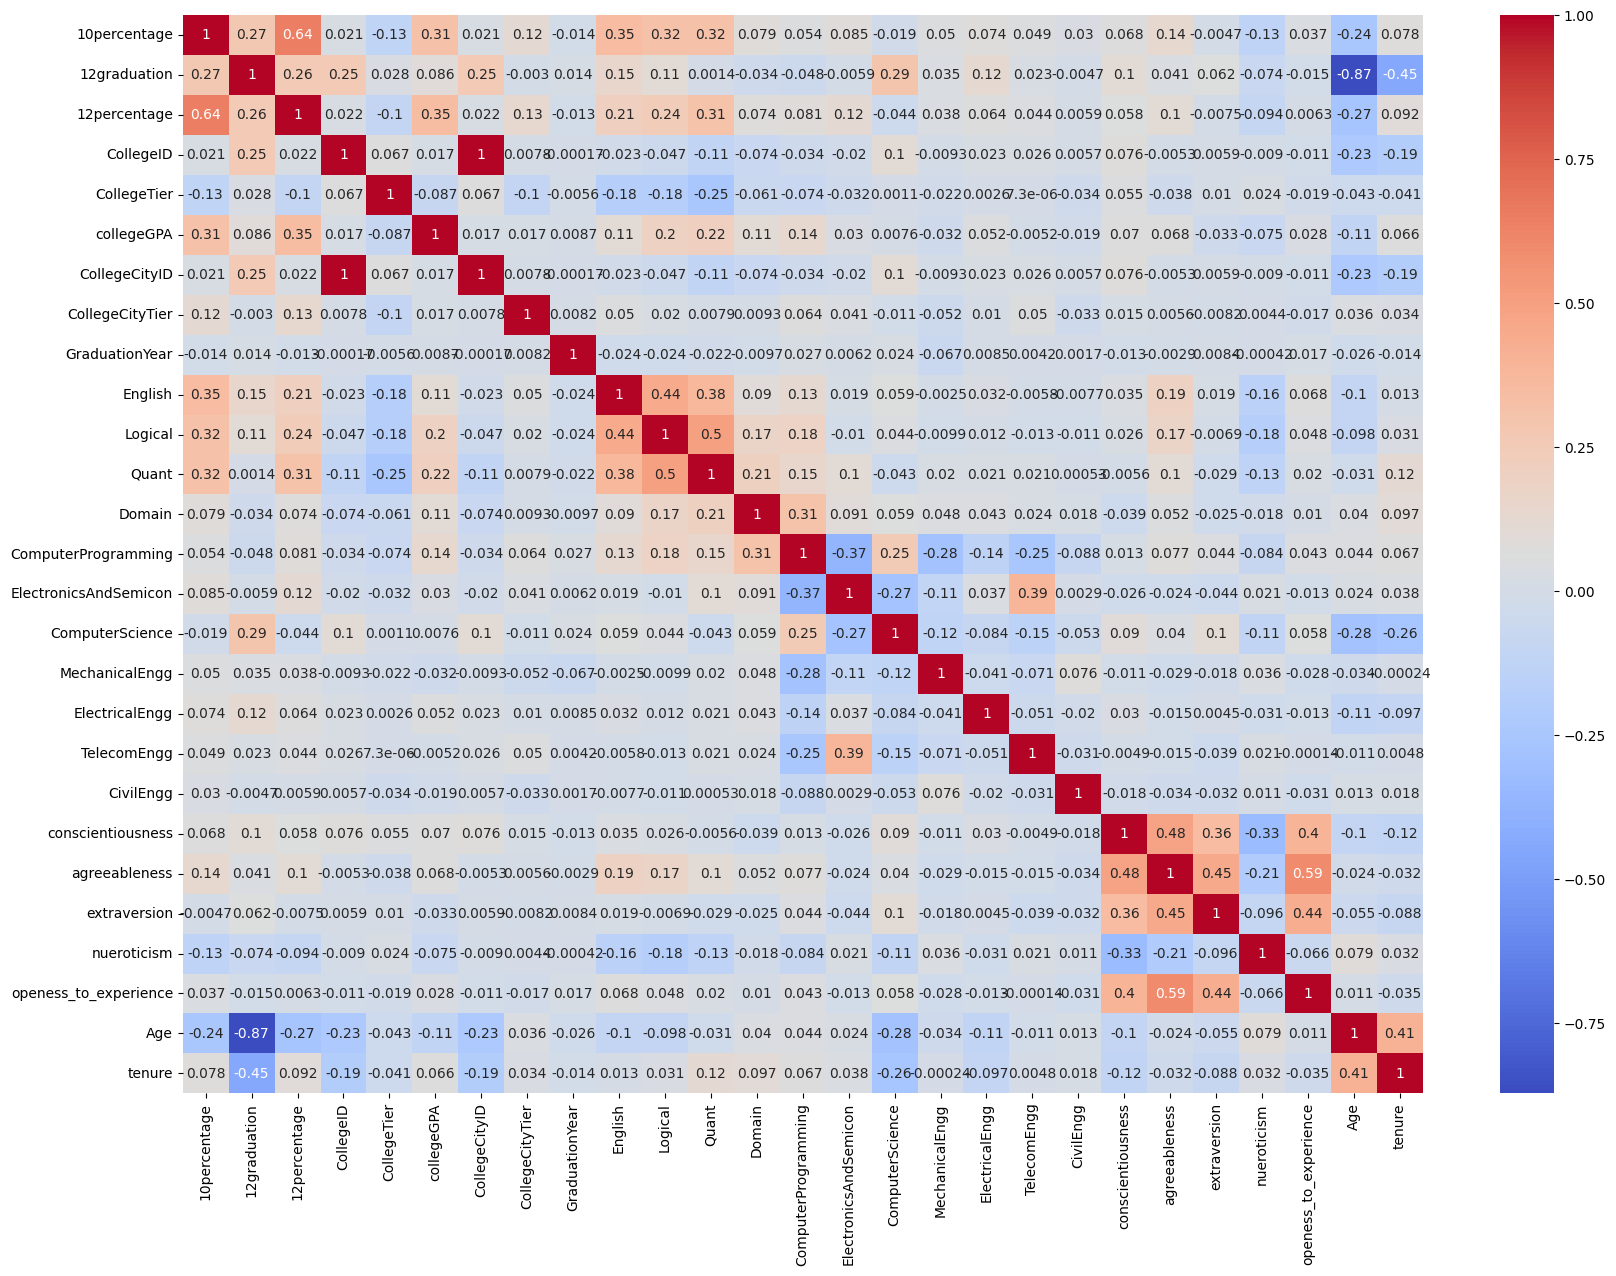

In [96]:
corr_matrix = num_columns.corr()
plt.figure(figsize = (20, 14))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

### High Correlations:
- **10th and 12th Grade Scores**: There’s a strong positive correlation (0.87) between scores in 10th and 12th grades, suggesting that students who do well in 10th grade are likely to maintain good performance in 12th grade.
- **College GPA and 12th Grade Percentage**: With a correlation of 0.35, students who scored well in their 12th grade tend to have higher GPAs in college.
- **Domain and Computer Programming Skills**: A correlation of 0.31 indicates that students who perform well in the Domain module of the AMCAT exam are also likely to score well in the Computer Programming section.
- **Electronics & Semiconductor and Electrical Engineering**: There’s a correlation of 0.37 between these subjects, suggesting that students excelling in Electronics and Semiconductor Engineering tend to perform well in Electrical Engineering too.

### Negative Correlations:
- **College Tier and Salary**: There’s a weak negative correlation (-0.11), indicating that graduates from higher-tier colleges do not necessarily earn higher salaries.
- **10th Grade Board and Salary**: A correlation of -0.13 suggests that the type of school board a student attended in 10th grade (e.g., State Board or CBSE) has little impact on their salary.

### Moderate Correlations:
- **Cognitive Skills (English, Logical, Quant) and Salary**: These skills show moderate positive correlations with salary, implying that students with stronger cognitive abilities tend to earn more.
- **Technical Skills and Salary**: Skills like Domain knowledge, Computer Programming, Electronics and Semiconductors, Computer Science, Mechanical Engineering, Electrical Engineering, Telecom Engineering, and Civil Engineering have a moderate positive relationship with salary, suggesting that technical proficiency can contribute to higher earnings.
- **Personality Traits and Salary**: Traits such as conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience show moderate positive correlations with salary, suggesting that these personality traits can be linked to better earning potential.

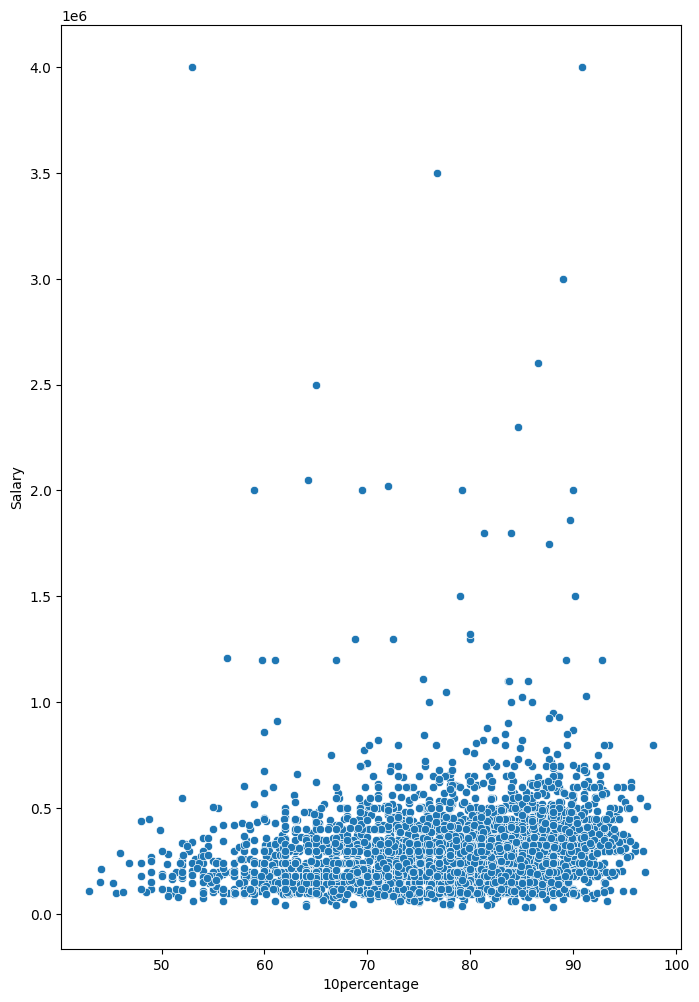

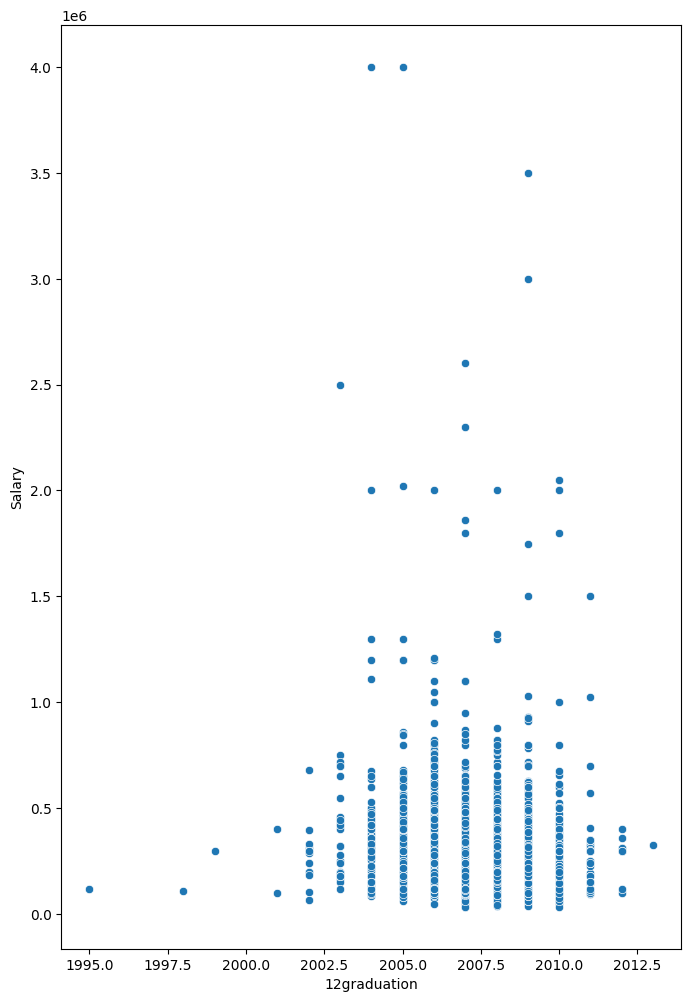

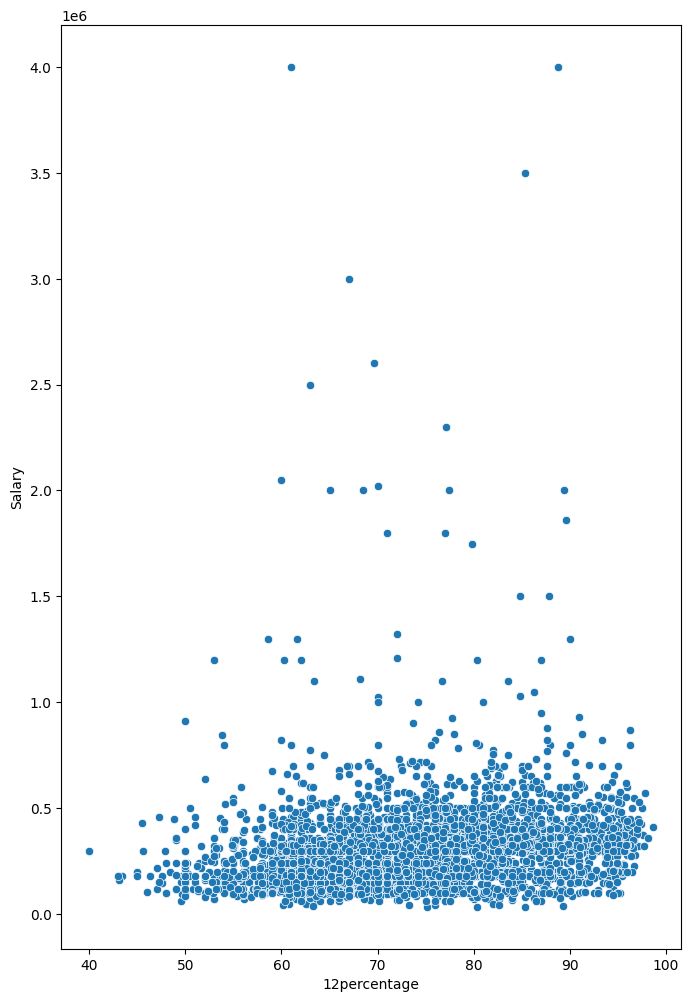

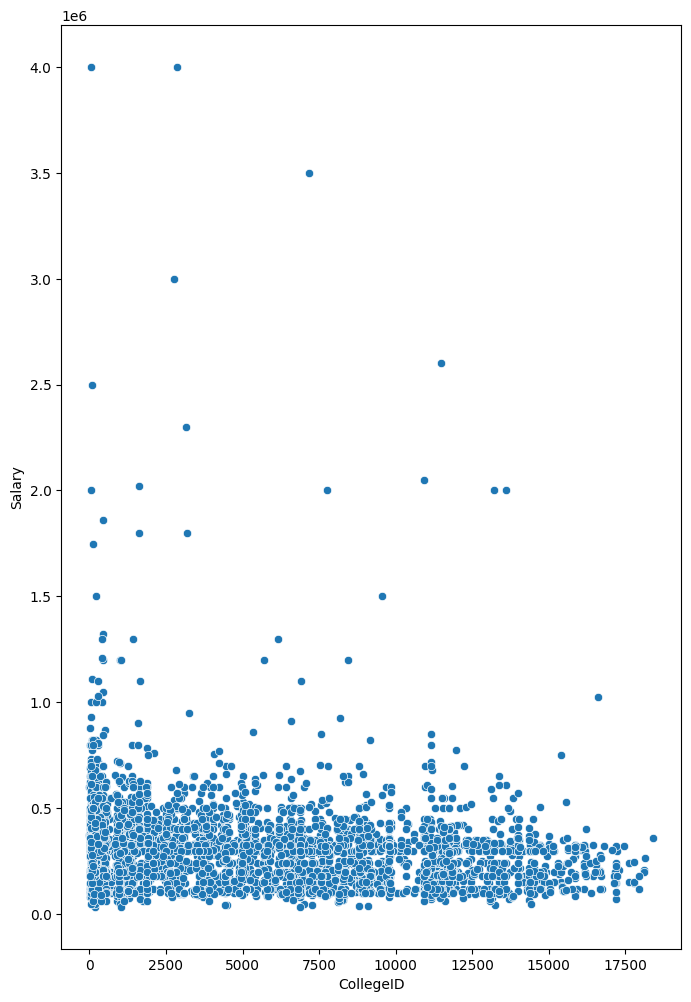

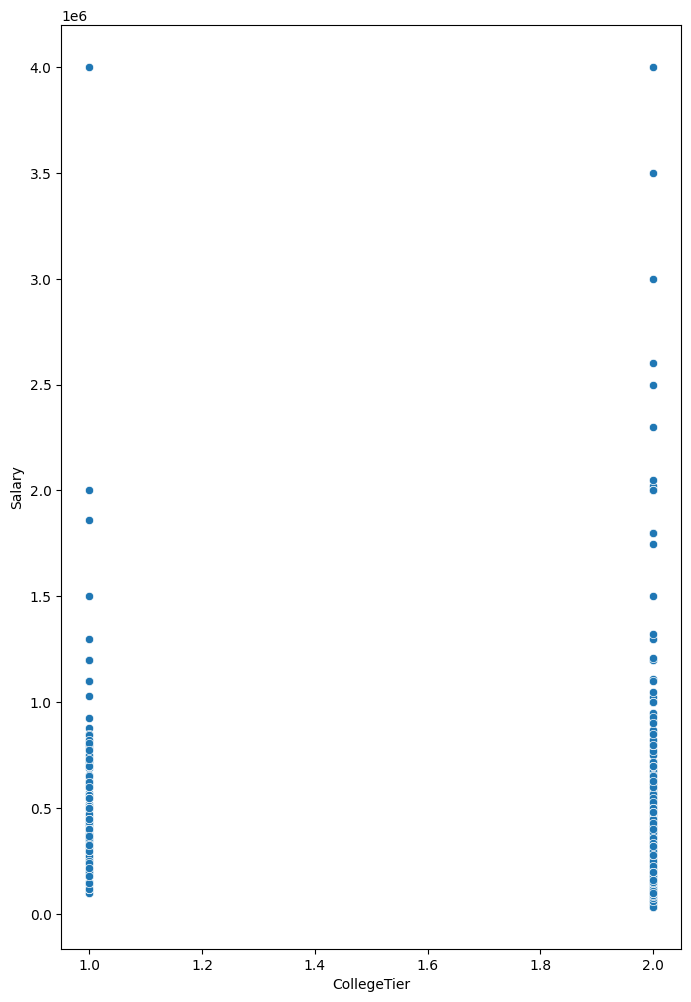

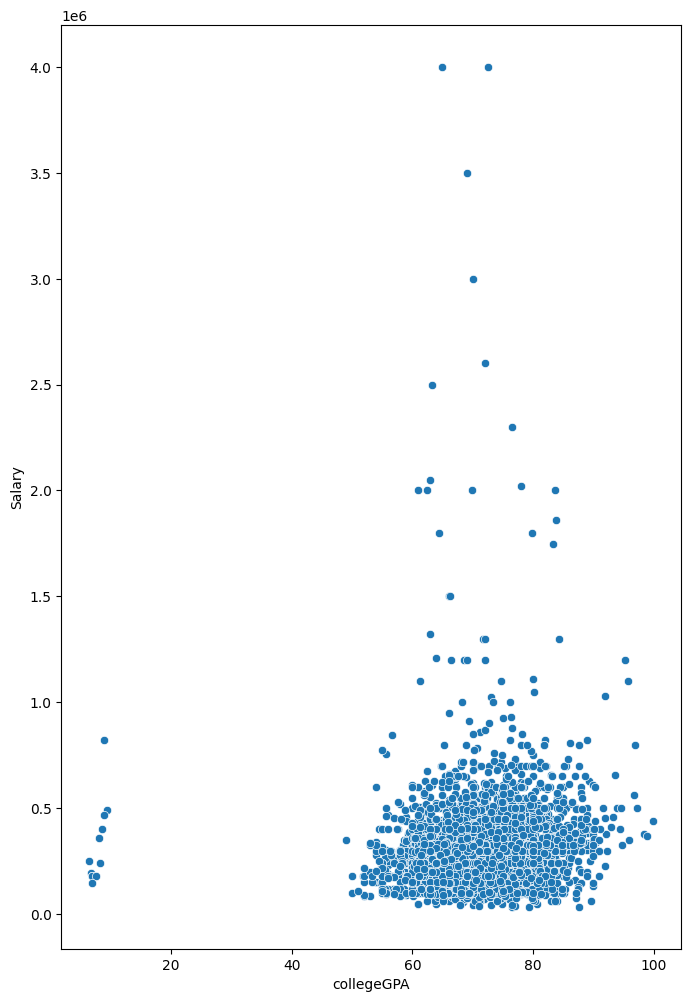

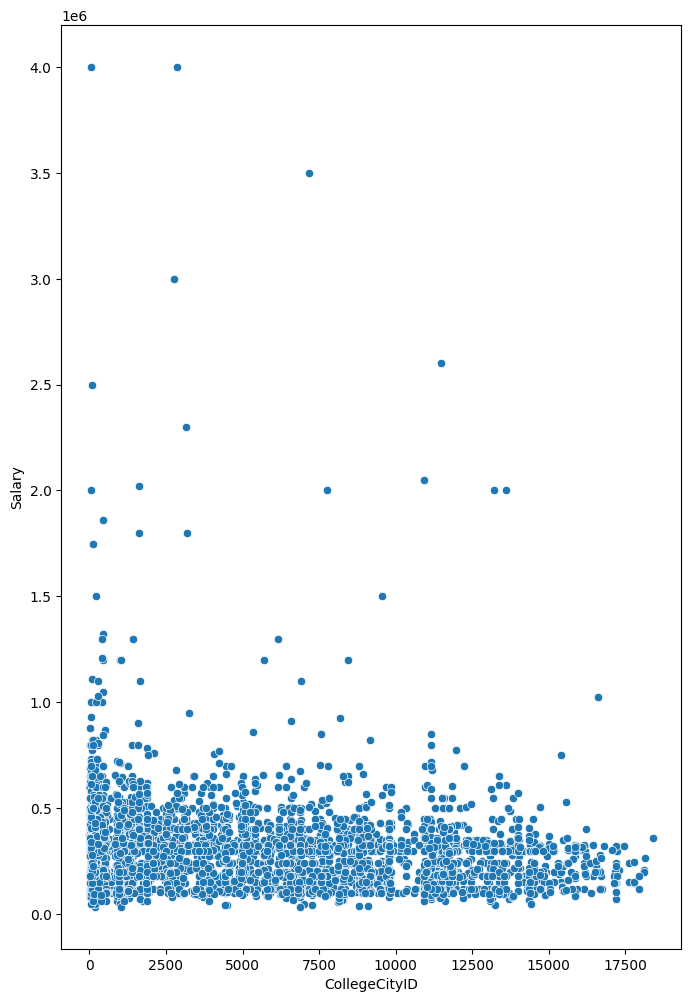

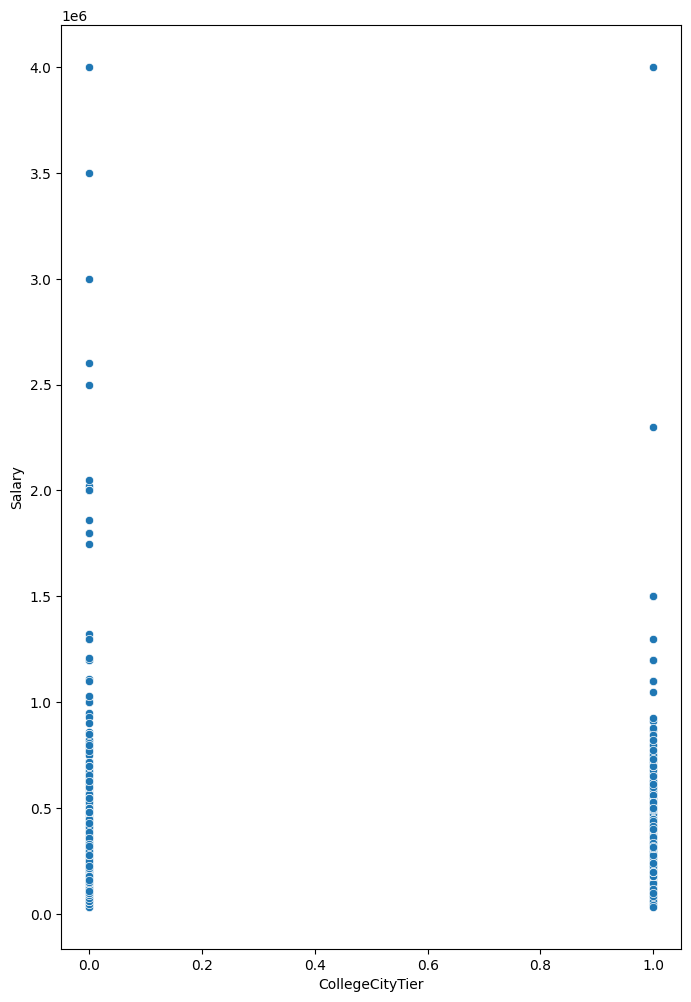

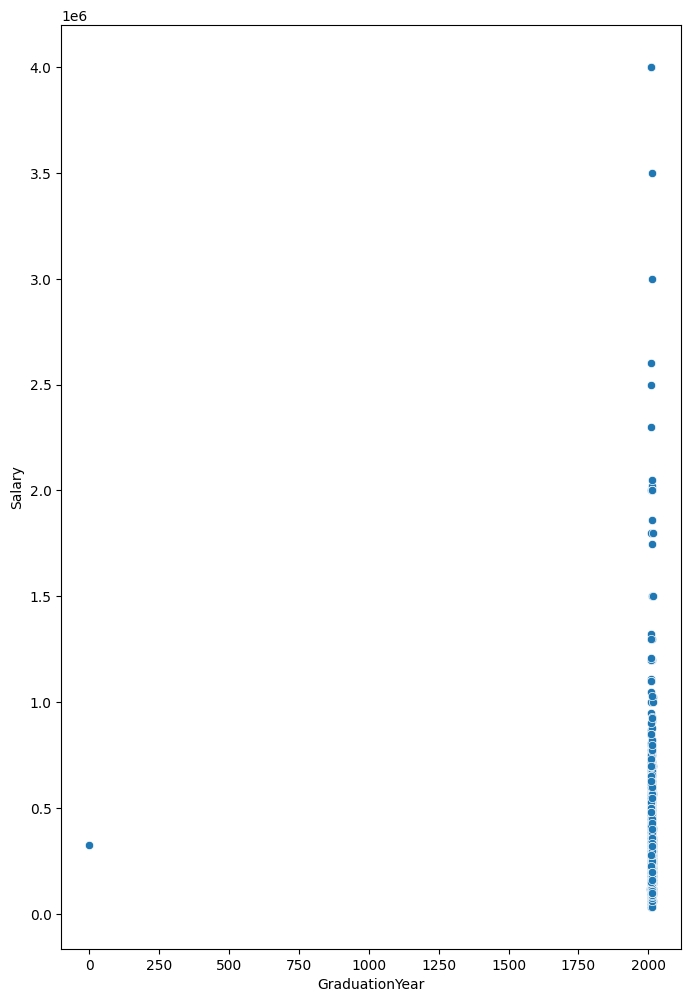

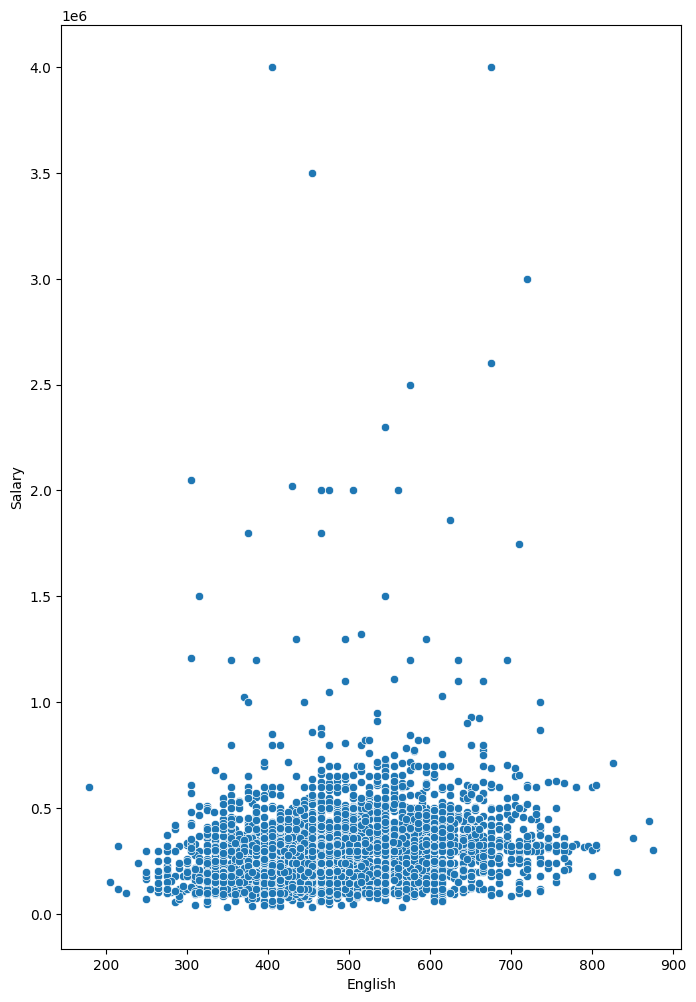

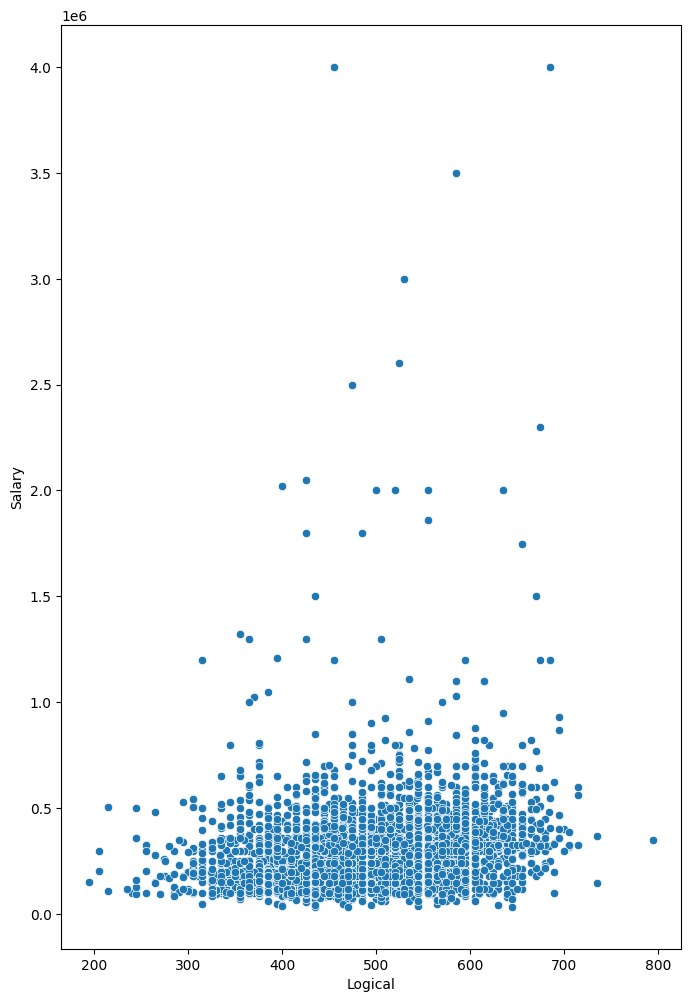

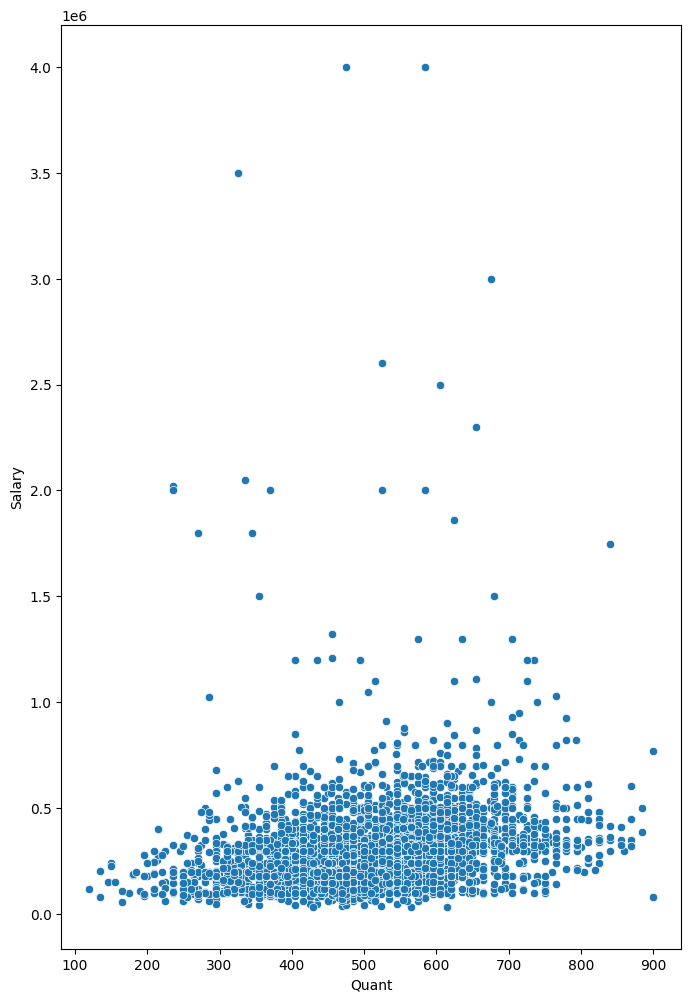

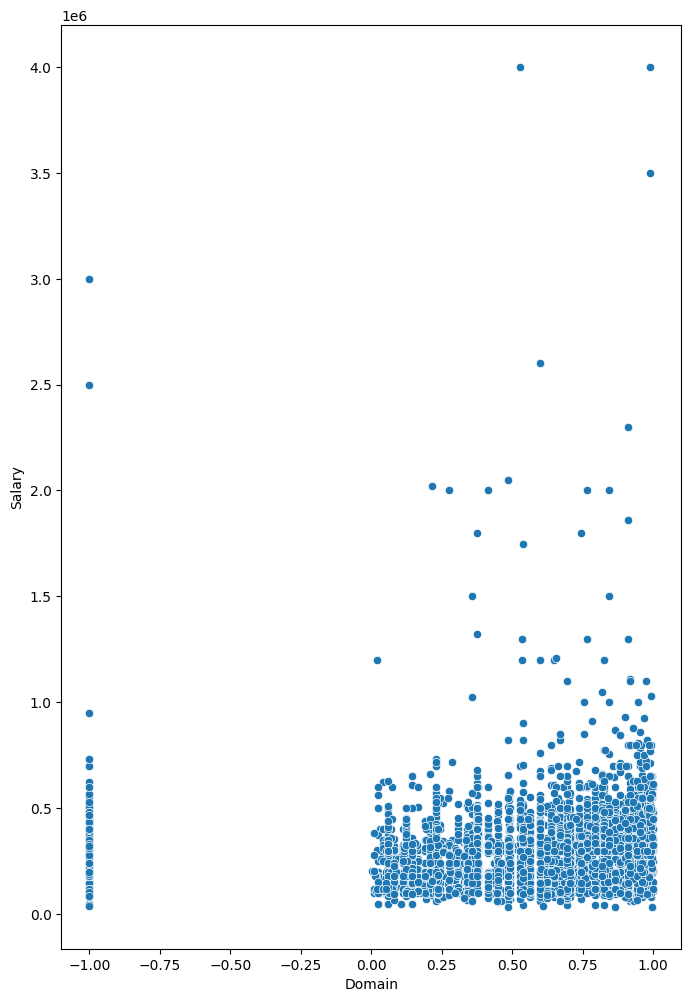

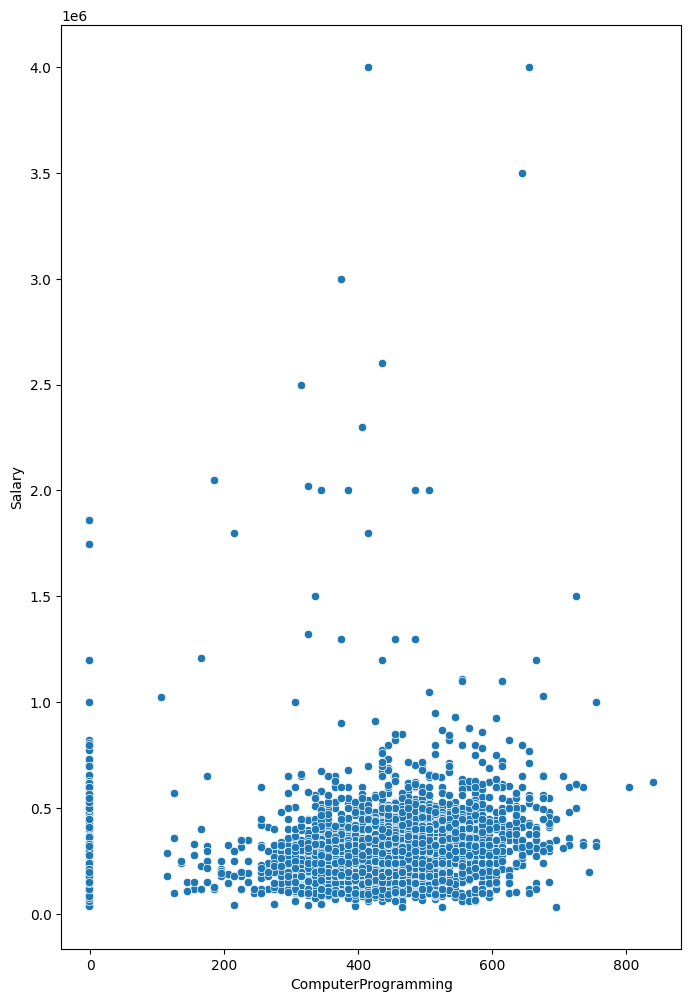

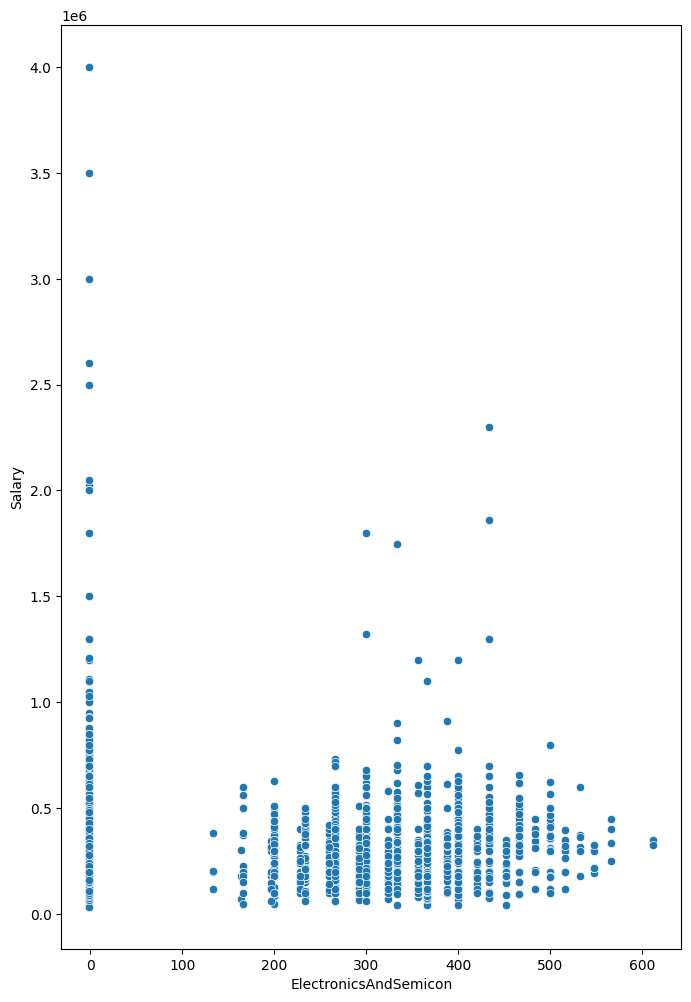

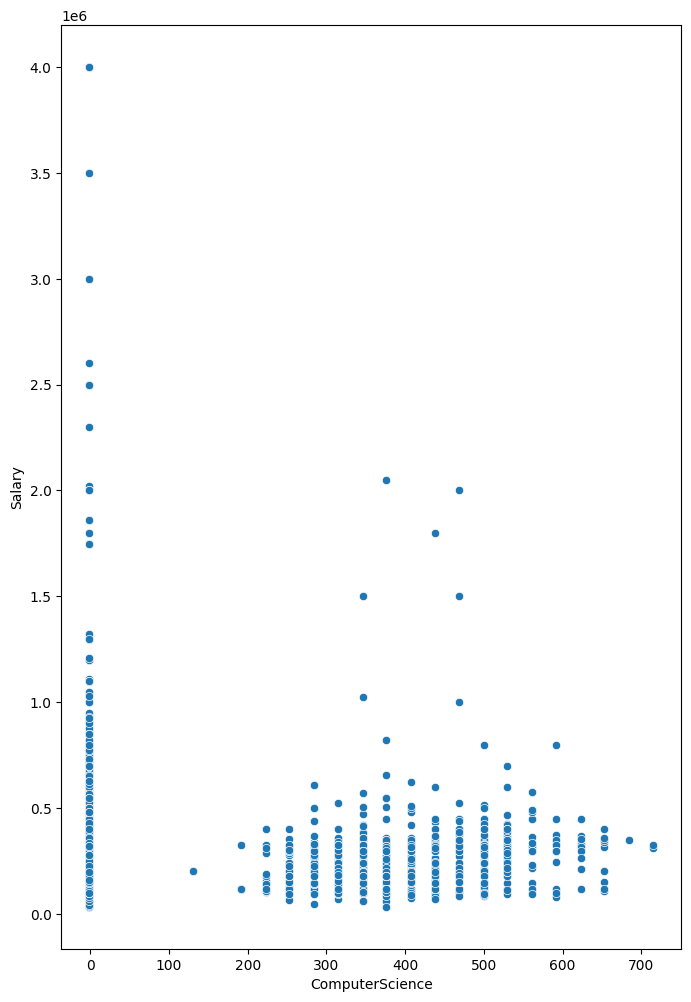

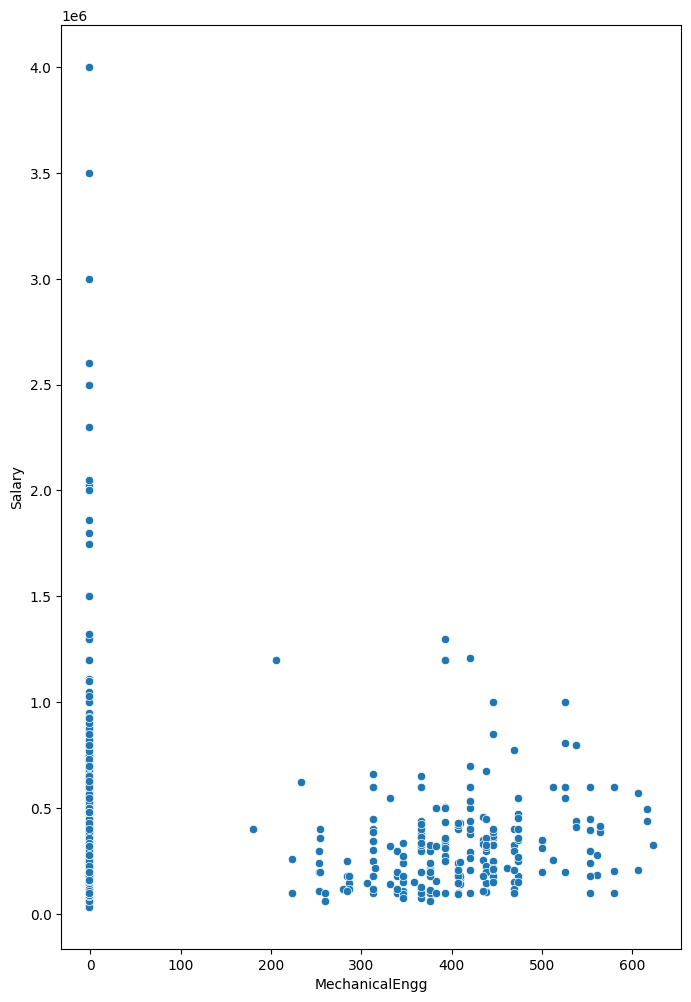

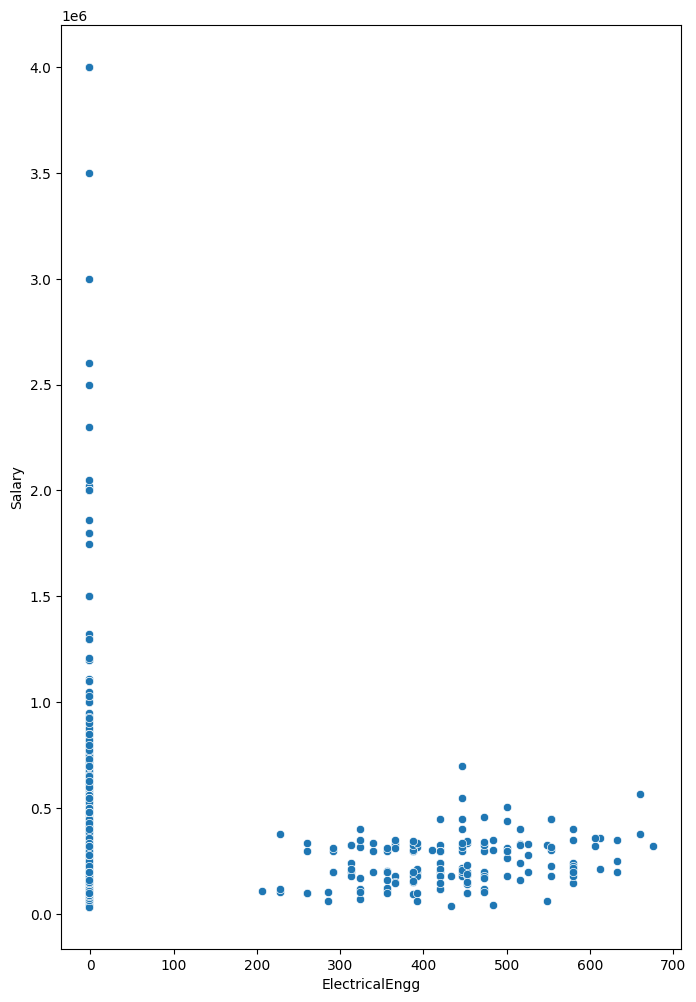

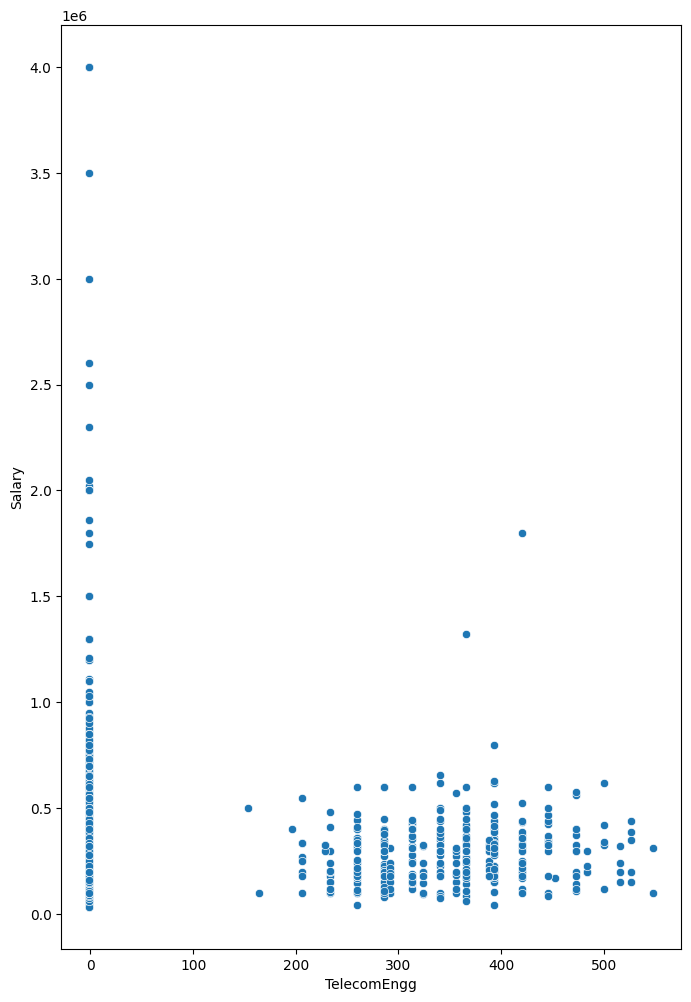

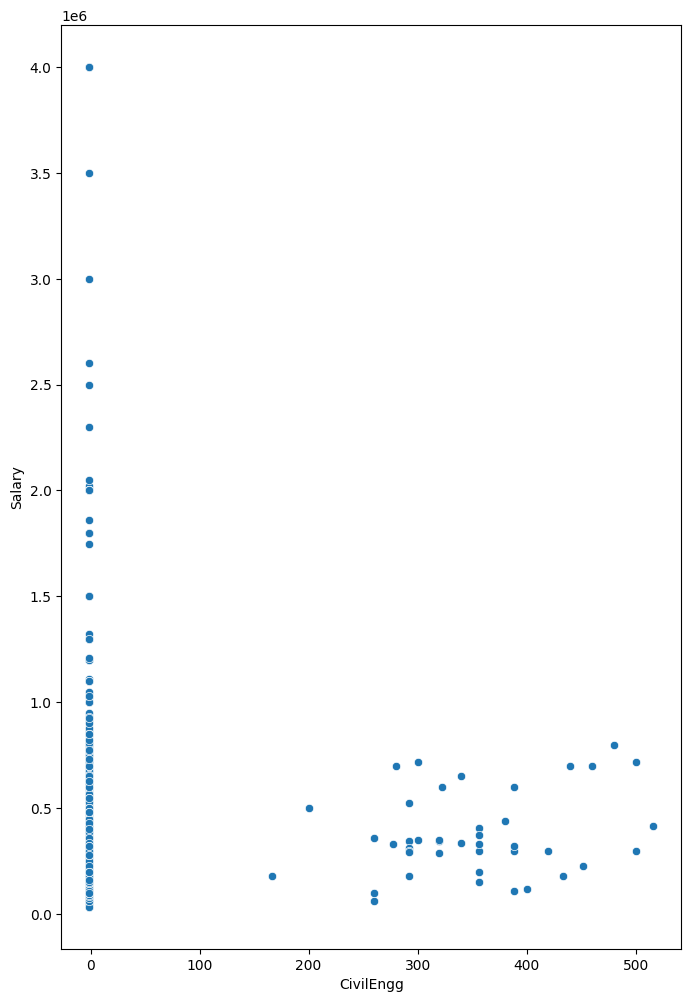

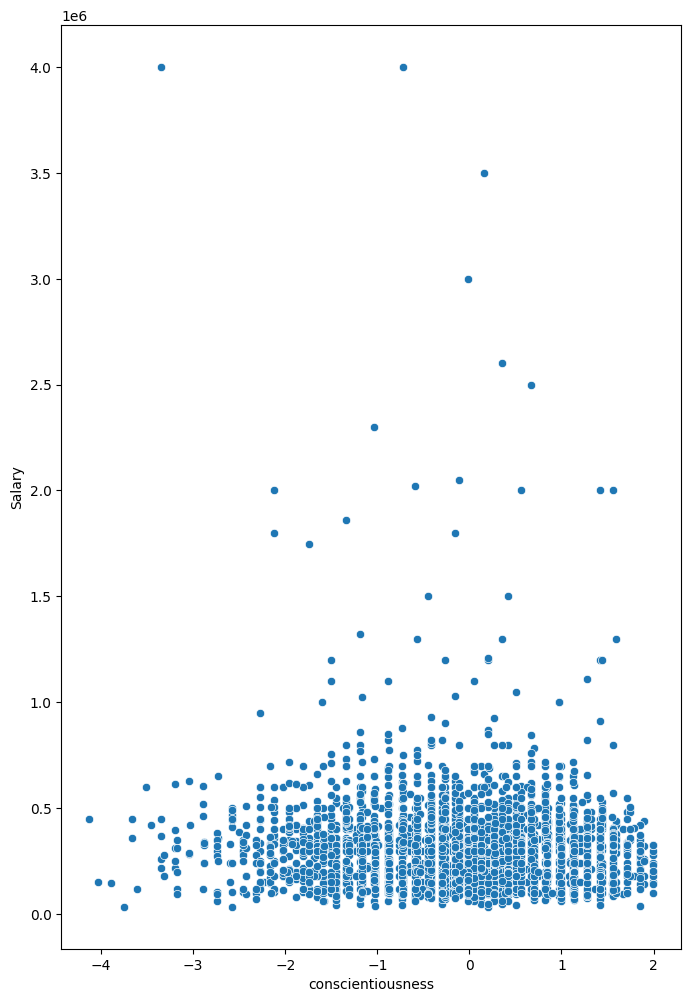

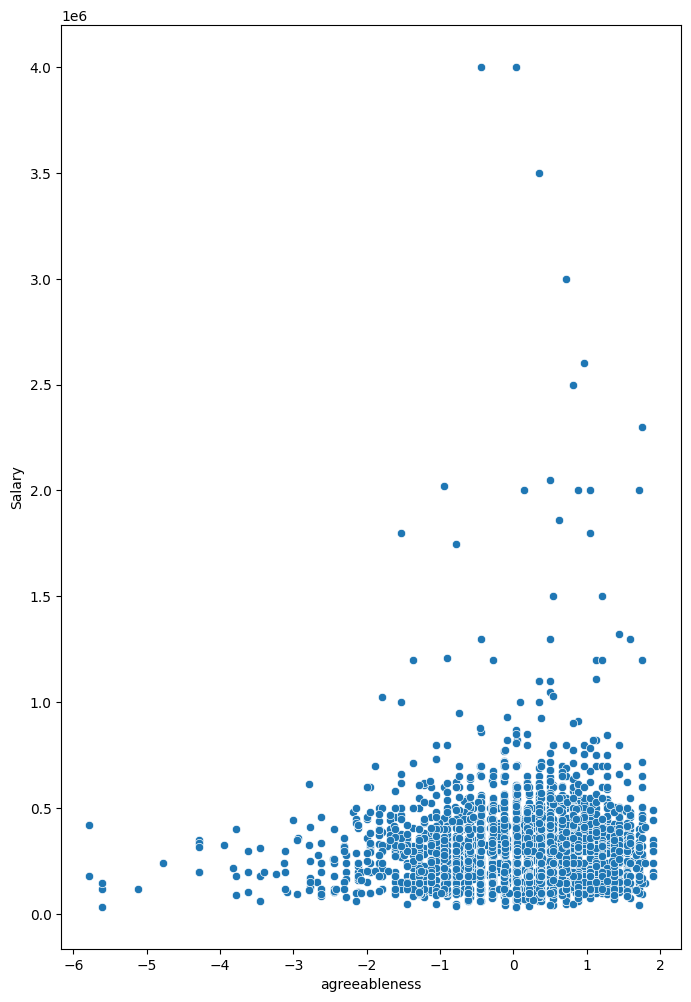

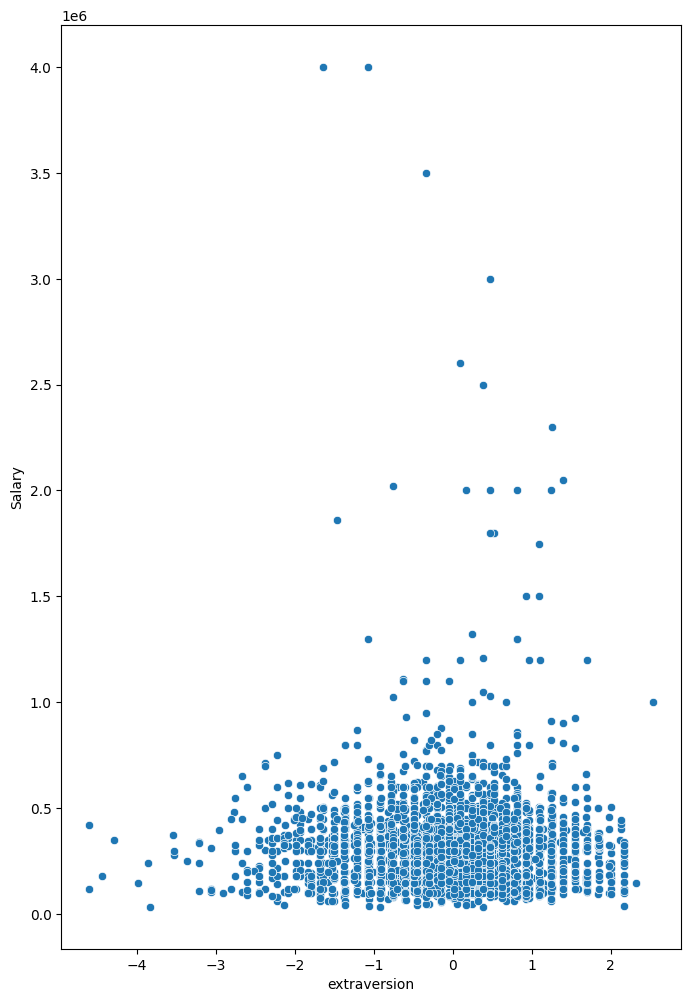

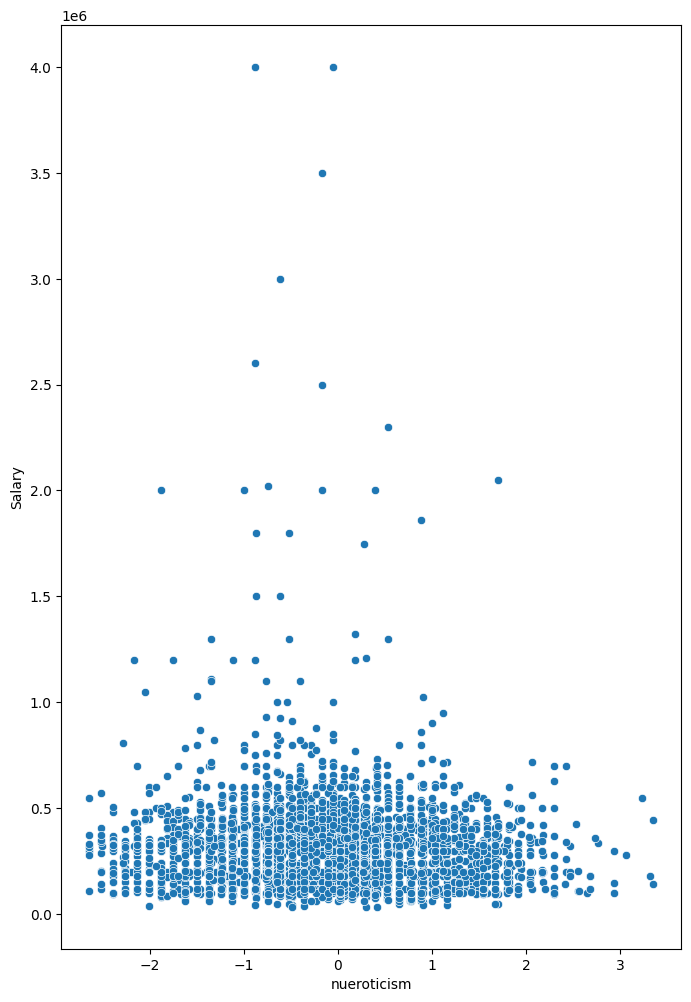

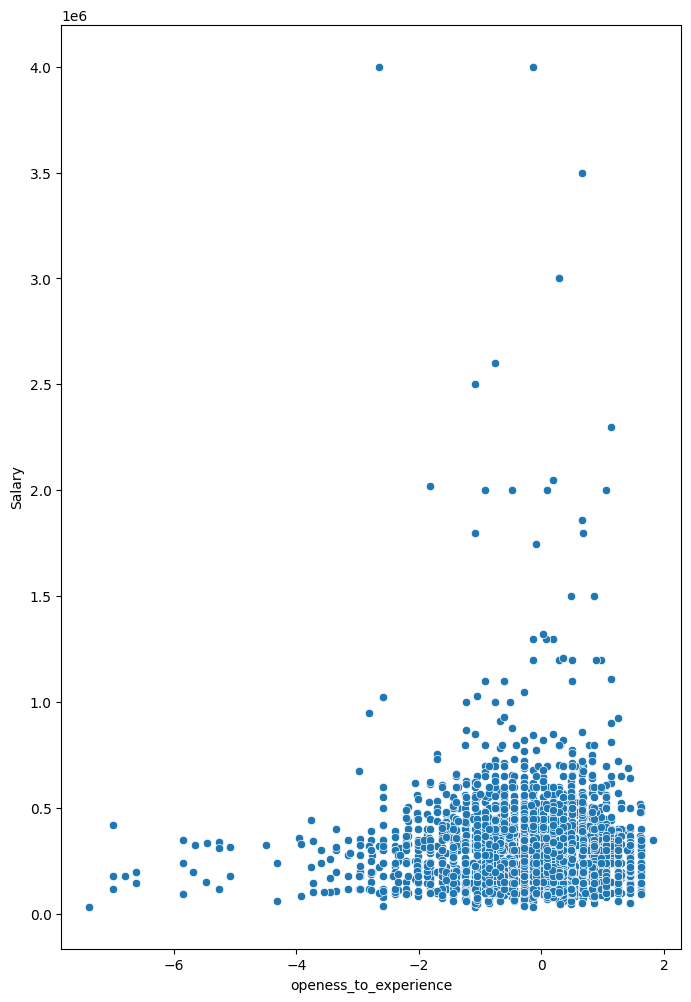

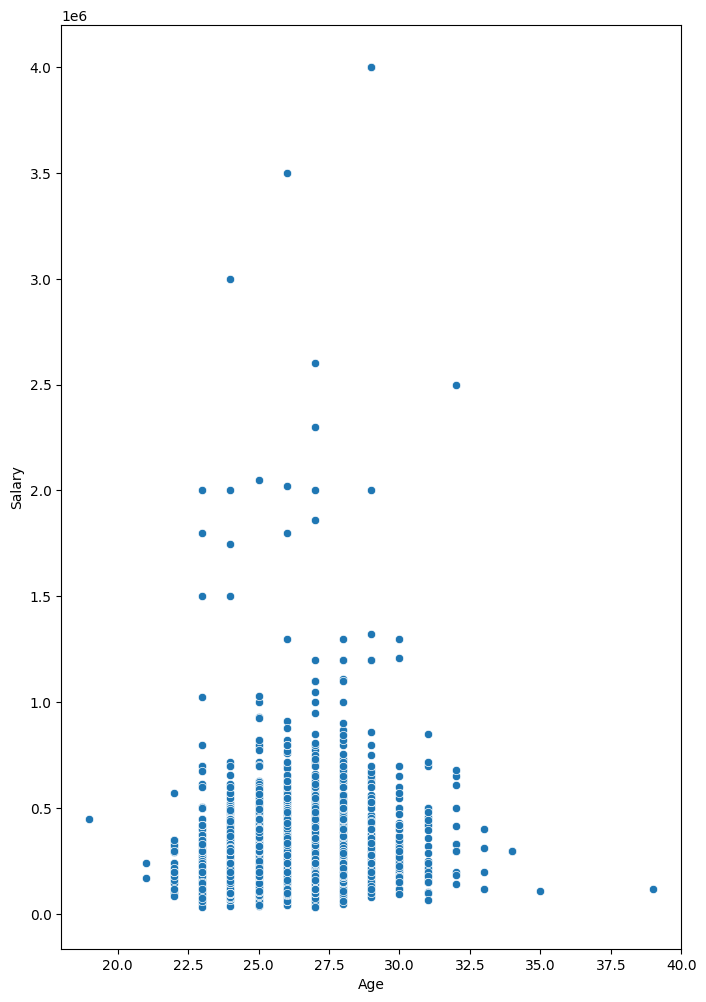

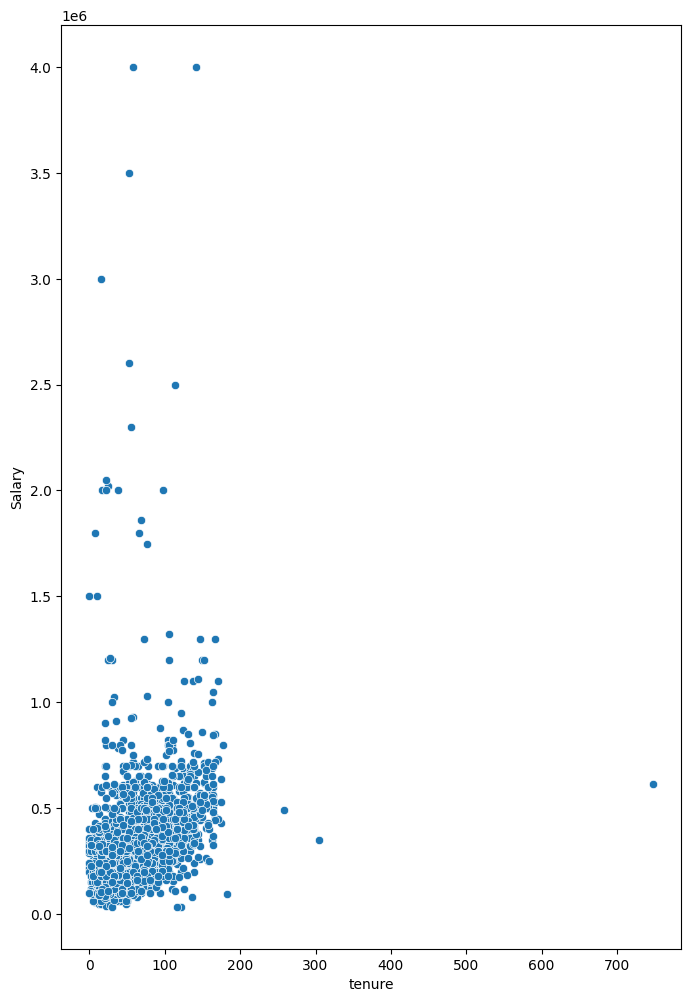

In [97]:
for col in num_columns.columns:
  plt.figure(figsize = (8, 12))
  sns.scatterplot(x = col, y = 'Salary', data = df)
  plt.show()

- **10th Grade Scores and Salary**: There is a slight positive relationship between 10th-grade scores and salary, meaning that students who scored higher in 10th grade tend to earn a bit more, though the link isn’t very strong.
  
- **Year of 12th Grade Graduation and Salary**: Students who graduated more recently from 12th grade tend to earn slightly higher salaries, but this trend is not particularly strong.

- **12th Grade Scores and Salary**: Students with higher scores in their 12th grade tend to have somewhat higher salaries, but this relationship is quite weak.

- **College GPA and Salary**: There’s a weak positive link between college GPA and salary, suggesting that students with better GPAs in college tend to earn a bit more.

- **English Scores and Salary**: Higher scores in the English section are associated with slightly higher salaries, although the connection is not very significant.

- **Logical Reasoning Scores and Salary**: Students who perform better in the Logical section tend to earn a little more, but the relationship is not strong.

- **Quantitative Skills and Salary**: A weak positive relationship exists between scores in the Quant section and salary, indicating that those who score higher may earn slightly better salaries.

- **Domain Knowledge and Salary**: Students with higher scores in the Domain section tend to earn a bit more, though the relationship is not very strong.

- **Computer Programming Scores and Salary**: Those who perform better in the Computer Programming section tend to have slightly higher salaries, but the connection is weak.

- **Computer Science Skills and Salary**: There is a weak positive link between Computer Science scores and salary, suggesting that those with better scores might earn a bit more.

- **Mechanical Engineering Skills and Salary**: Students who perform well in Mechanical Engineering tend to earn slightly higher salaries, though the link is not very strong.

- **Electrical Engineering Skills and Salary**: A weak positive relationship exists between Electrical Engineering scores and salary, with higher scores being associated with slightly better salaries.

- **Telecommunication Engineering Skills and Salary**: Those who score higher in the Telecommunication Engineering section tend to have marginally higher salaries, but the relationship remains weak.

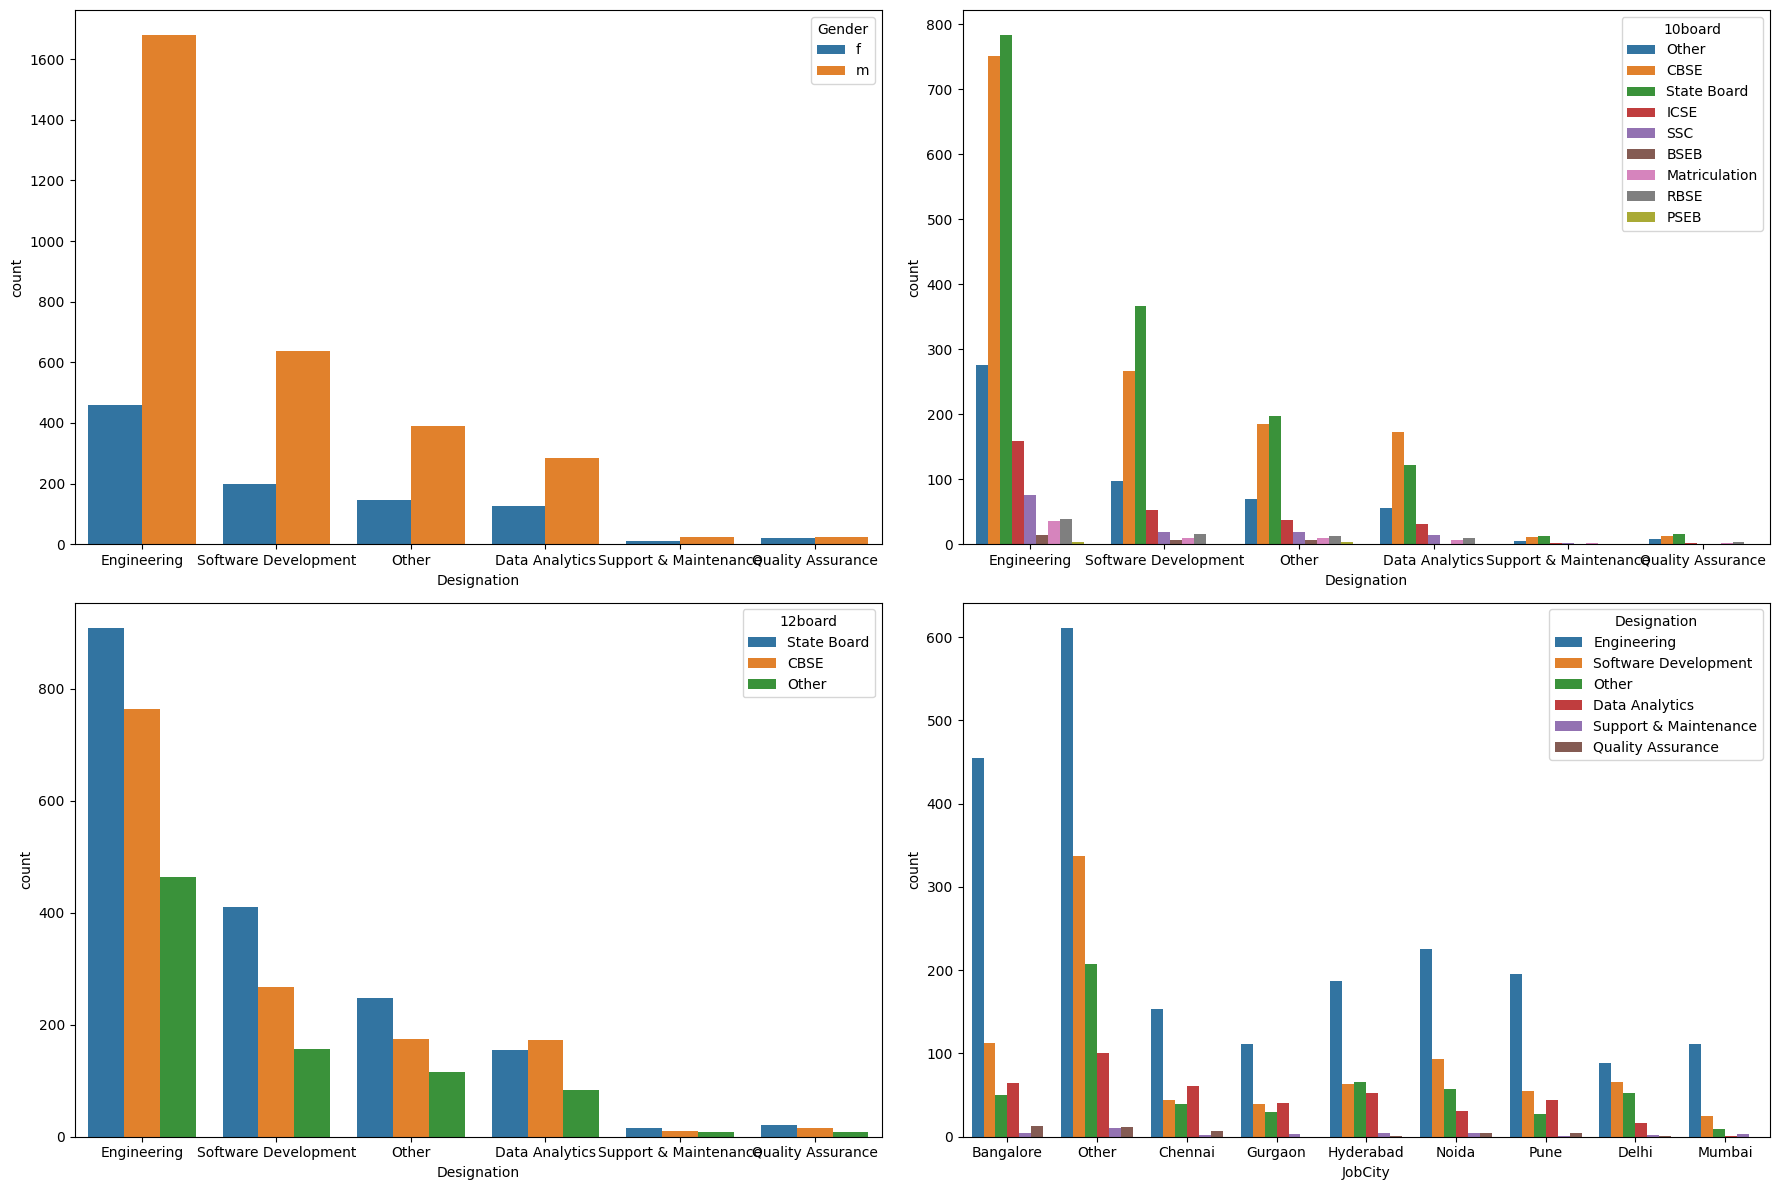

In [98]:
fig, axes = plt.subplots(2, 2, figsize = (18, 12))

sns.countplot(x = 'Designation', data = df, hue = 'Gender', ax = axes[0, 0])
sns.countplot(x = 'Designation', data = df, hue = '10board', ax = axes[0, 1])
sns.countplot(x = 'Designation', data = df, hue = '12board', ax = axes[1, 0])
sns.countplot(x = 'JobCity', data = df, hue = 'Designation', ax = axes[1, 1])

plt.tight_layout()
plt.show()

- **Gender Differences in Job Roles**: More male graduates tend to work in engineering roles, while female graduates are more likely to be employed in other types of positions.

- **10th Grade Curriculum and Engineering Roles**: Most graduates who studied under the State Board or CBSE for their 10th grade are now working in engineering jobs.

- **12th Grade Curriculum and Engineering Roles**: Similarly, a large number of graduates who followed the State Board or CBSE curriculum in their 12th grade have found employment in engineering roles.

- **Job Locations for Graduates**: Many engineering graduates have jobs in Bangalore, but there is also a significant number working in various other cities.

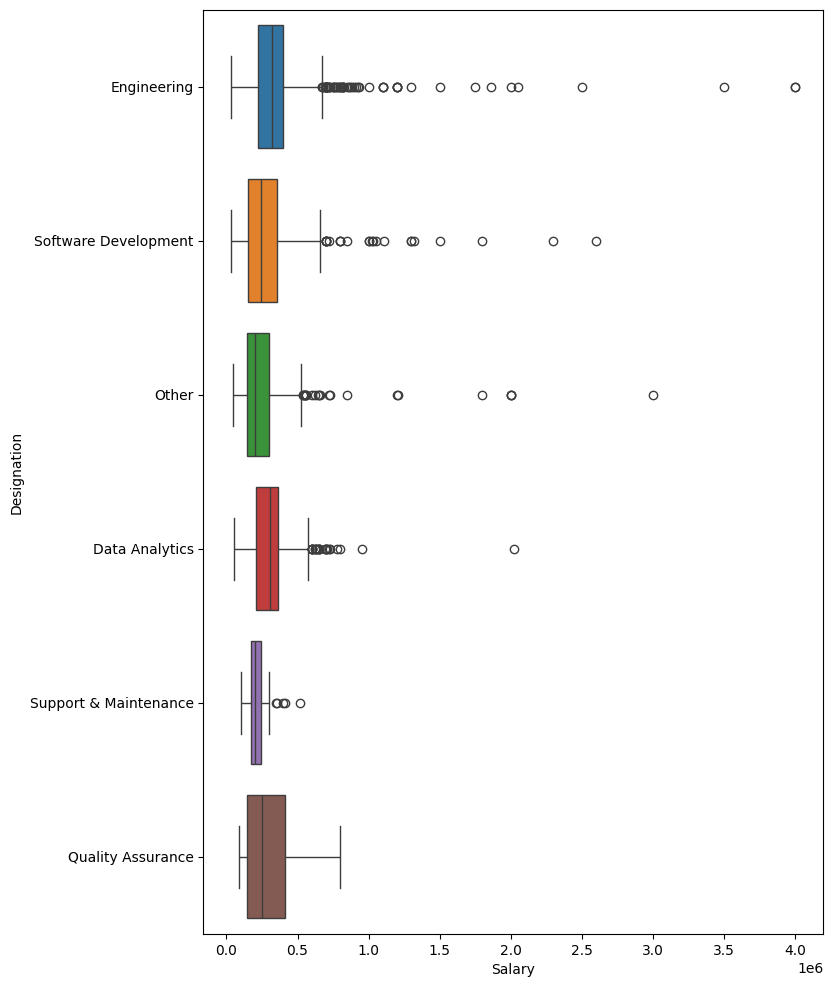

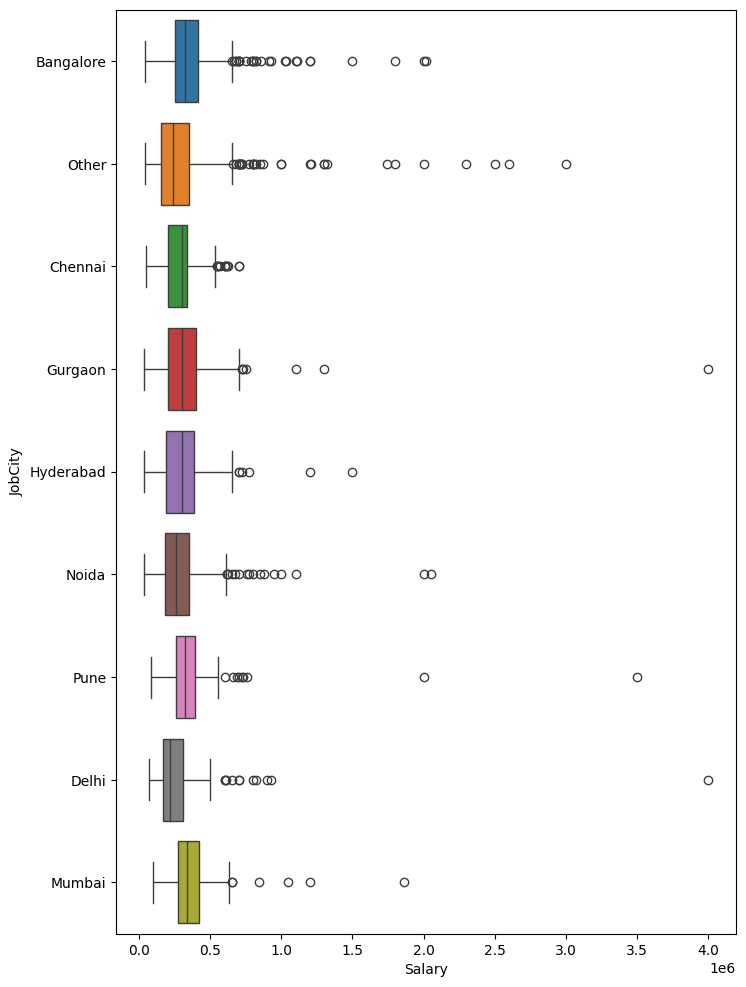

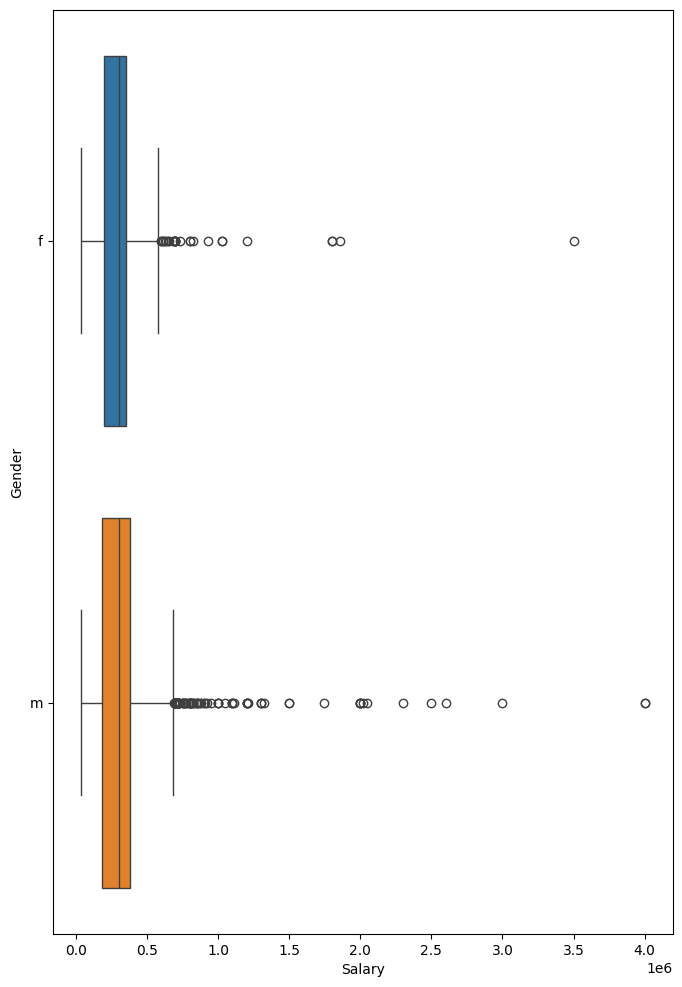

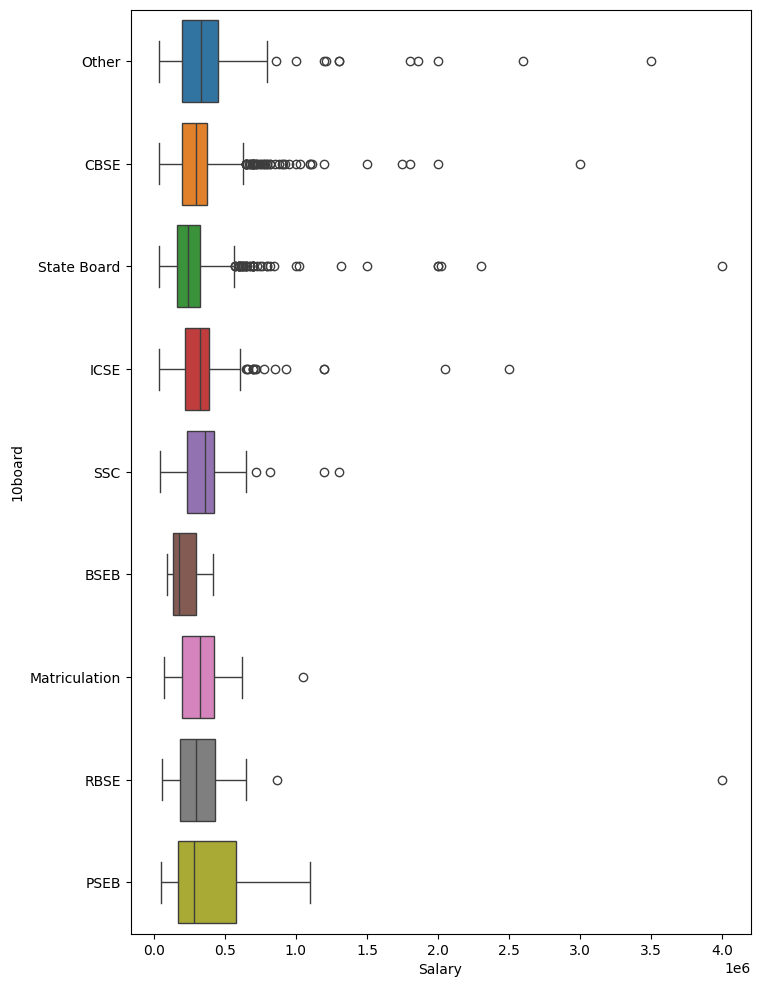

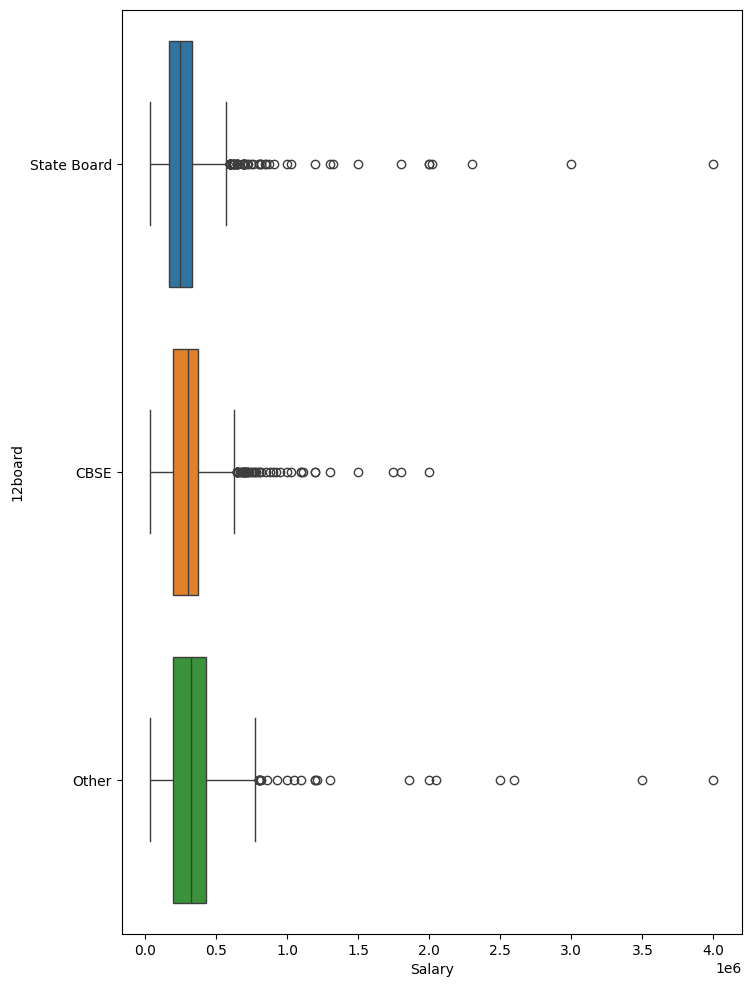

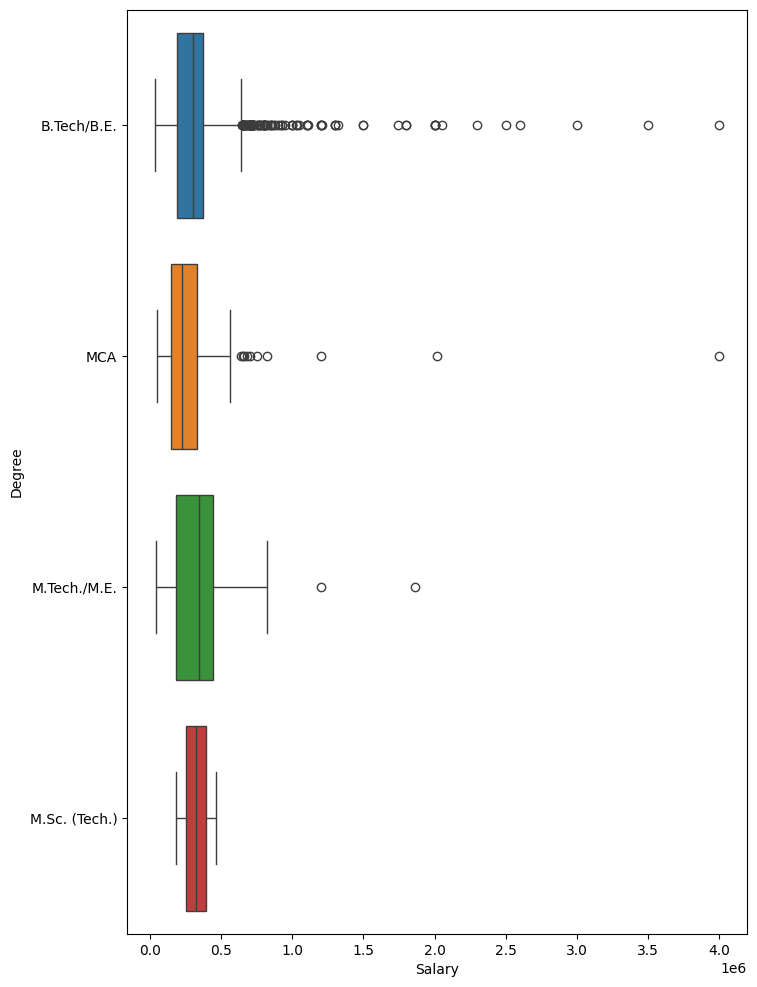

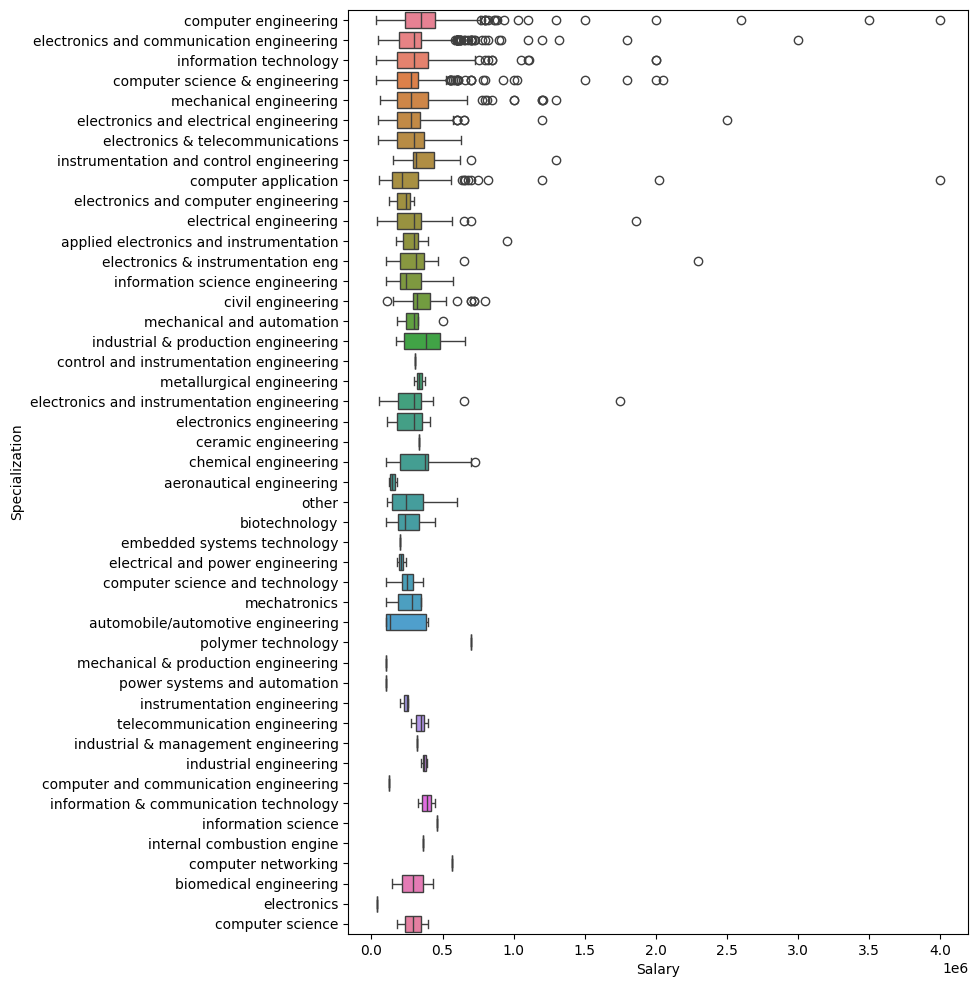

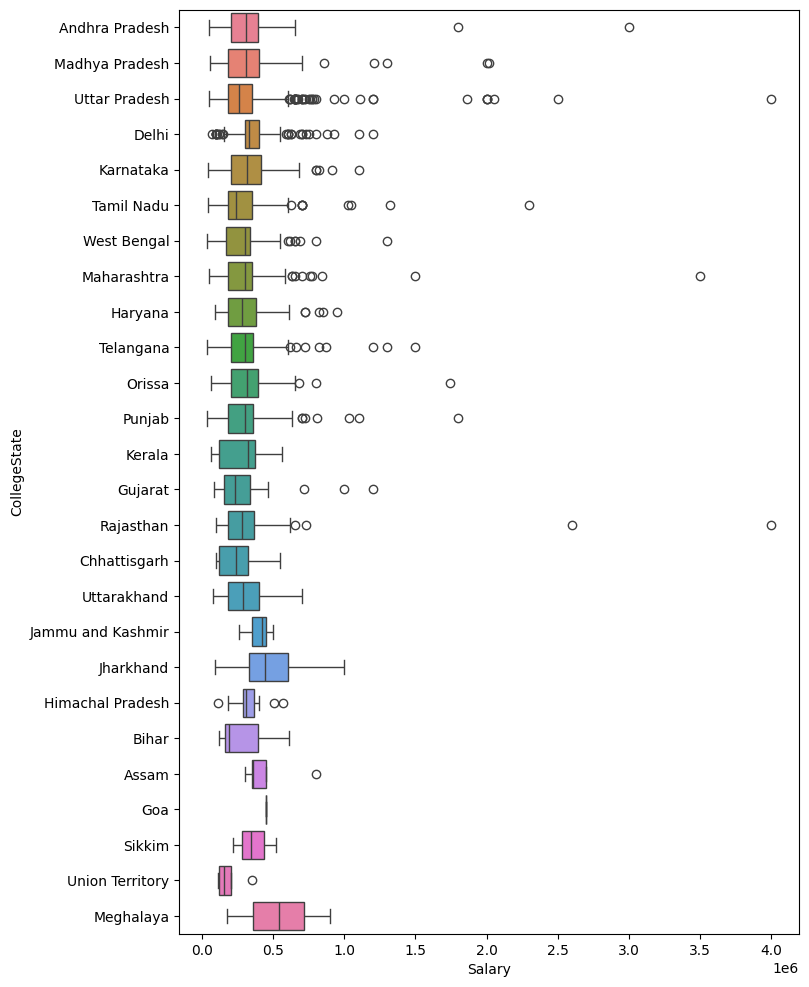

In [99]:
for col in cat_columns.columns:
  plt.figure(figsize = (8, 12))
  sns.boxplot(y = col, x = 'Salary', data = df, hue = col)
  plt.show()

- **Salary Variation Across Designations**: There's a noticeable variation in salaries for each job designation, with some roles offering a broader salary range than others.

- **Salary Differences by Location**: Salaries vary significantly depending on the job location, with Bangalore offering the highest median salary among all cities.

- **Gender and Salary**: Male graduates tend to have a slightly higher median salary compared to female graduates.

- **Degree and Salary**: Graduates with a "B.Tech/B.E" degree have the highest median salary, making it the most lucrative degree in this group.

# Research Questions

In [100]:
from scipy.stats import ttest_1samp

roles_of_interest = ['Engineering', 'Software Development', 'Data Analytics']
filtered_data = df[df['Designation'].isin(roles_of_interest)]


salaries = filtered_data['Salary']

claimed_mean = 2.75

t_stat, p_value = ttest_1samp(salaries, claimed_mean)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The average salary is significantly different from 2.75 lakhs.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference from 2.75 lakhs.")


Reject the null hypothesis. The average salary is significantly different from 2.75 lakhs.


In [101]:
import pandas as pd
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df['Gender'], df['Specialization'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between gender and specialization.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between gender and specialization.")


Reject the null hypothesis. There is a significant relationship between gender and specialization.


1. relationship between gender and job type.

2. influence of location on salary.

3. the impact of gender on salary.



In [102]:
contingency_table = pd.crosstab(df['Gender'], df['Designation'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between gender and designation.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between gender and designation.")

Reject the null hypothesis. There is a significant relationship between gender and designation.


In [103]:
from scipy.stats import f_oneway

salary_groups = [df['Salary'][df['JobCity'] == city] for city in df['JobCity'].unique()]

f_stat, p_values = f_oneway(*salary_groups)

if p_value < 0.05:
    print("There is a significant difference in mean salaries across different JobCity categories.")
else:
    print("There is no significant difference in mean salaries across different JobCity categories.")

There is a significant difference in mean salaries across different JobCity categories.


In [104]:
from scipy.stats import ttest_ind

male_salaries = df[df['Gender'] == 'm']['Salary']
female_salaries = df[df['Gender'] == 'f']['Salary']

t_stat, p_value = ttest_ind(male_salaries, female_salaries)

if p_value < 0.05:
    print("There is a significant difference in mean salaries between male and female employees.")
else:
    print("There is no significant difference in mean salaries between male and female employees.")

There is a significant difference in mean salaries between male and female employees.
